# Gaussian fitting loop for S I Lines
With the new and revised version on fitting the COS data, we can create a loop that will semi-automatically return the parameters and brightness for the given wavelength.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.table import Table
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
line = 1250.8140
hdulist = fits.open('../data/composite_Io_eclipsed.fits')
evt_data = Table(hdulist[1].data)
image_data = hdulist[1].data
df = pd.read_csv('../data/Io_Master_Line_List (1).csv') #spaces in csv file will make df object type and not float64
line = "S I"
target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
df = df[target_mask]
df_wavelength = df['Wavelength']
df_species = df['Species']

In [3]:
df_results = pd.DataFrame()
problem_files = {}

In [4]:
wavelength_list = df_wavelength.values.tolist()

In [5]:
def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((wl_array-cen1)/sigma1)**2)))

  0%|          | 0/52 [00:00<?, ?it/s]

amplitude = 0.00 (+/-) 0.00
mu = 1209.04 (+/-) 0.12
sigma = 0.64 (+/-) 0.13
The brightness of S I at 1208.85 Angstrom is 1.9556900906096852e-16.
amplitude = 0.00 (+/-) 0.00
mu = 1211.76 (+/-) 0.36
sigma = 0.98 (+/-) 0.40
The brightness of S I at 1211.212 Angstrom is 4.3122092013211987e-16.
Fail: 1211.38
Fail: 1212.795
amplitude = 0.00 (+/-) 0.00
mu = 1217.08 (+/-) 0.59
sigma = 1.18 (+/-) 0.31
The brightness of S I at 1218.595 Angstrom is 3.0252708674819156e-15.
amplitude = 0.00 (+/-) 0.00
mu = 1224.49 (+/-) 0.03
sigma = 0.24 (+/-) 0.03
The brightness of S I at 1224.424 Angstrom is 5.554807978623597e-17.
amplitude = 0.00 (+/-) 0.00
mu = 1224.49 (+/-) 0.03
sigma = 0.24 (+/-) 0.03
The brightness of S I at 1224.479 Angstrom is 5.554476990902612e-17.
amplitude = 0.00 (+/-) 0.00
mu = 1224.49 (+/-) 0.03
sigma = 0.24 (+/-) 0.03
The brightness of S I at 1224.544 Angstrom is 5.554498683992951e-17.
amplitude = 0.00 (+/-) 0.00
mu = 1227.02 (+/-) 0.06
sigma = 0.54 (+/-) 0.06
The brightness of S I a

C:\Users\jojoa\.conda\envs\io_env\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


The brightness of S I at 1296.174 Angstrom is 1.0579051421082378e-15.
amplitude = 0.00 (+/-) 0.00
mu = 1302.24 (+/-) 0.00
sigma = 0.28 (+/-) 0.00
The brightness of S I at 1302.337 Angstrom is 5.224993271770355e-15.
amplitude = 0.00 (+/-) 0.00
mu = 1302.24 (+/-) 0.00
sigma = 0.28 (+/-) 0.00
The brightness of S I at 1302.863 Angstrom is 5.220190433901195e-15.
amplitude = 0.00 (+/-) 0.00
mu = 1302.24 (+/-) 0.00
sigma = 0.28 (+/-) 0.01
The brightness of S I at 1303.111 Angstrom is 5.379047933226005e-15.
amplitude = 0.00 (+/-) 0.00
mu = 1301.87 (+/-) 0.16
sigma = 0.49 (+/-) 0.07
The brightness of S I at 1303.4295 Angstrom is 2.2382706823888125e-14.
amplitude = 0.00 (+/-) 0.00
mu = 1303.40 (+/-) 0.92
sigma = 1.48 (+/-) 0.34
The brightness of S I at 1305.883 Angstrom is 1.406258988798597e-13.
amplitude = 0.00 (+/-) 0.00
mu = 1310.25 (+/-) 0.03
sigma = 0.24 (+/-) 0.03
The brightness of S I at 1310.194 Angstrom is 5.975048204989628e-17.
amplitude = 0.00 (+/-) 0.00
mu = 1313.15 (+/-) 0.05
sigma 

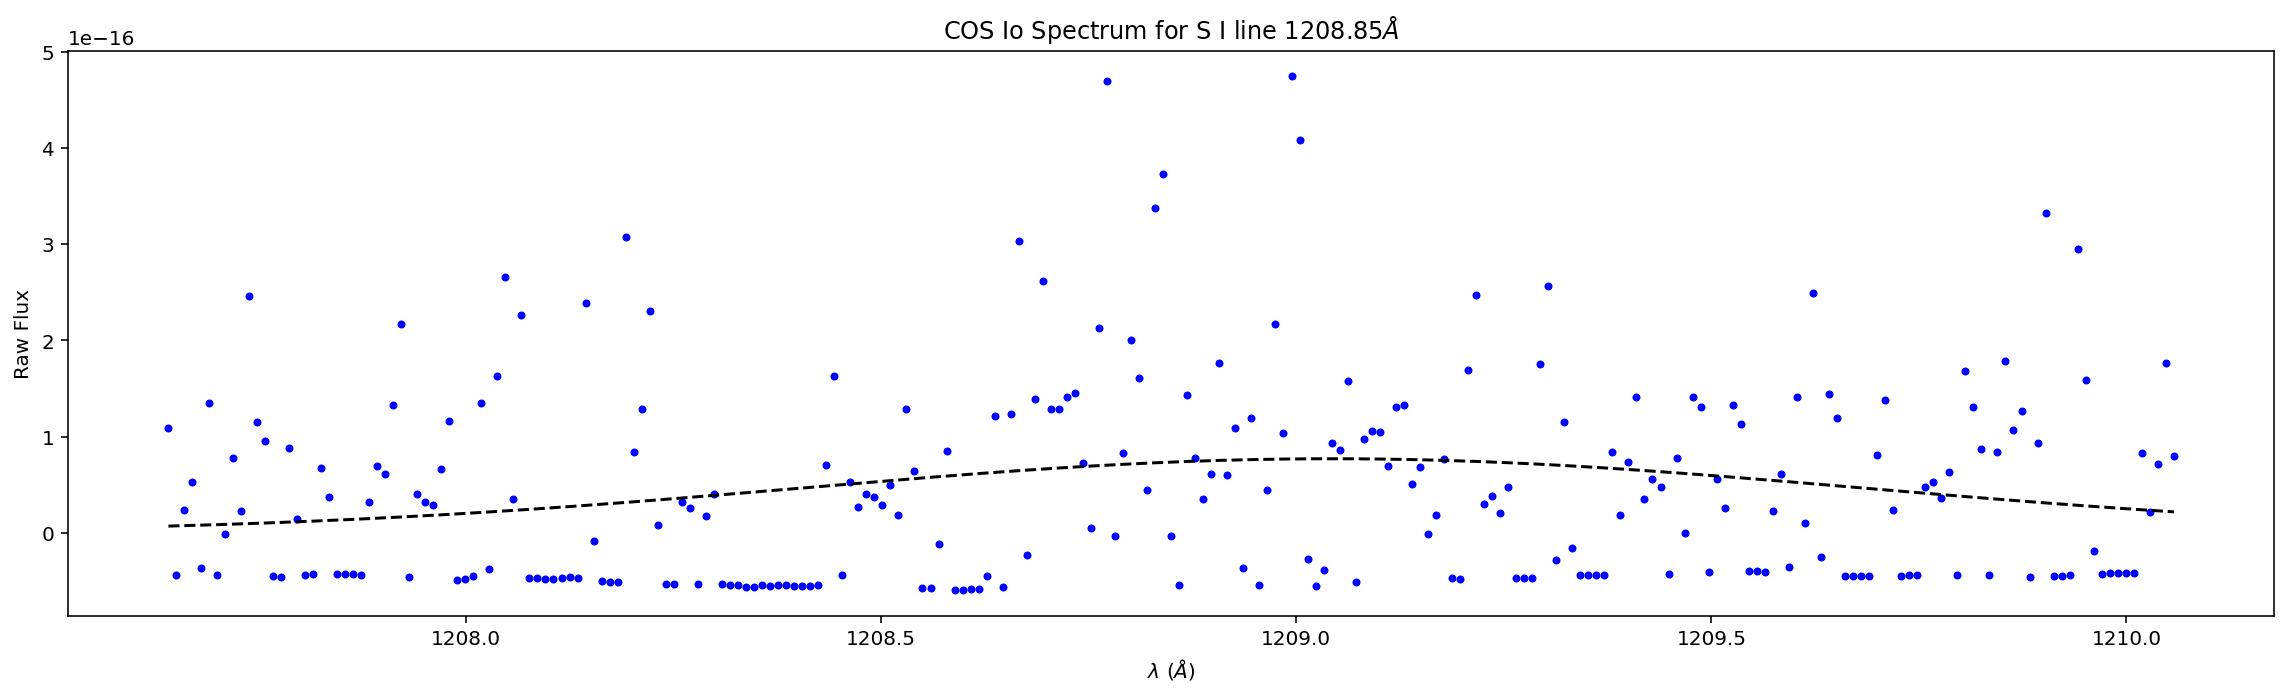

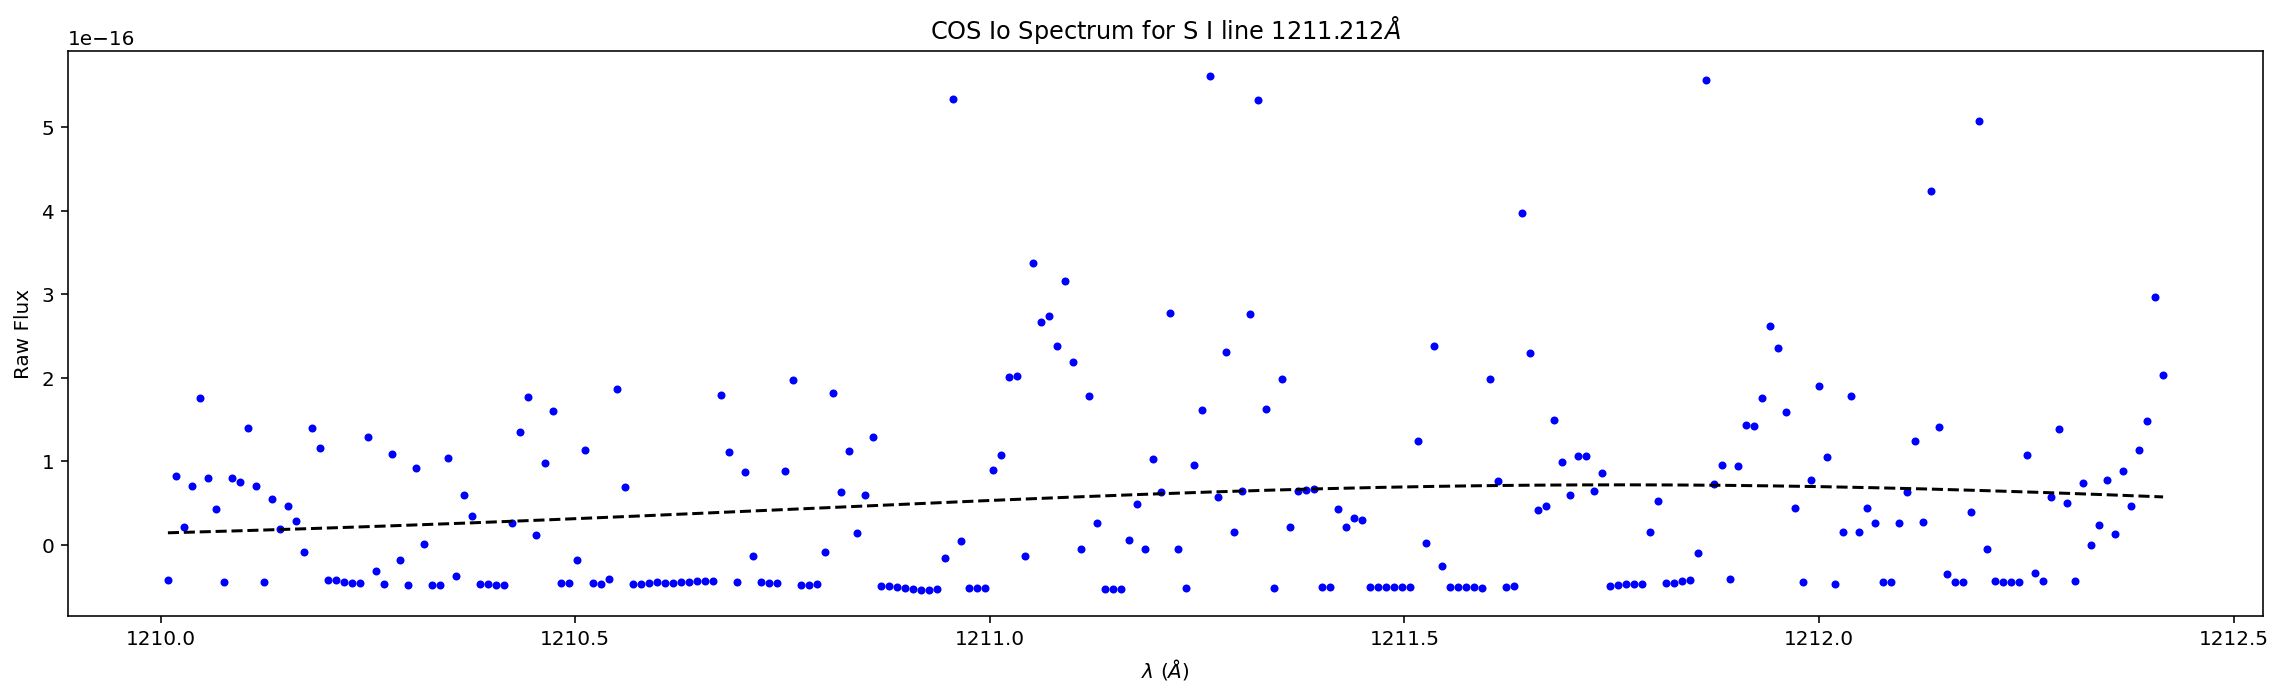

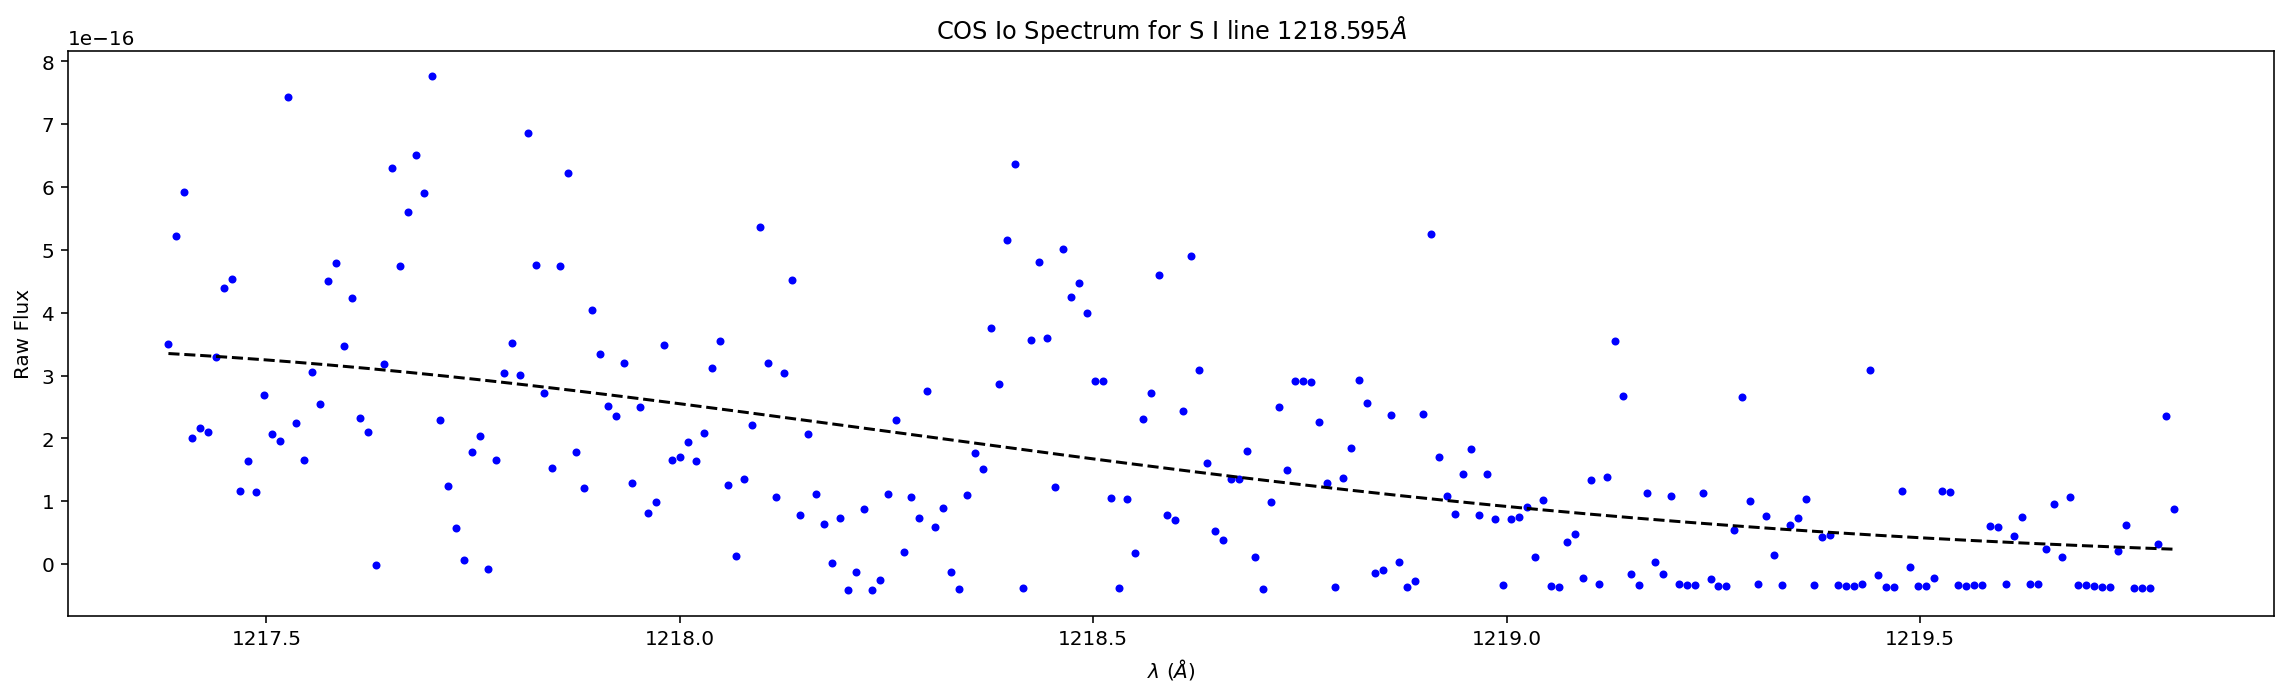

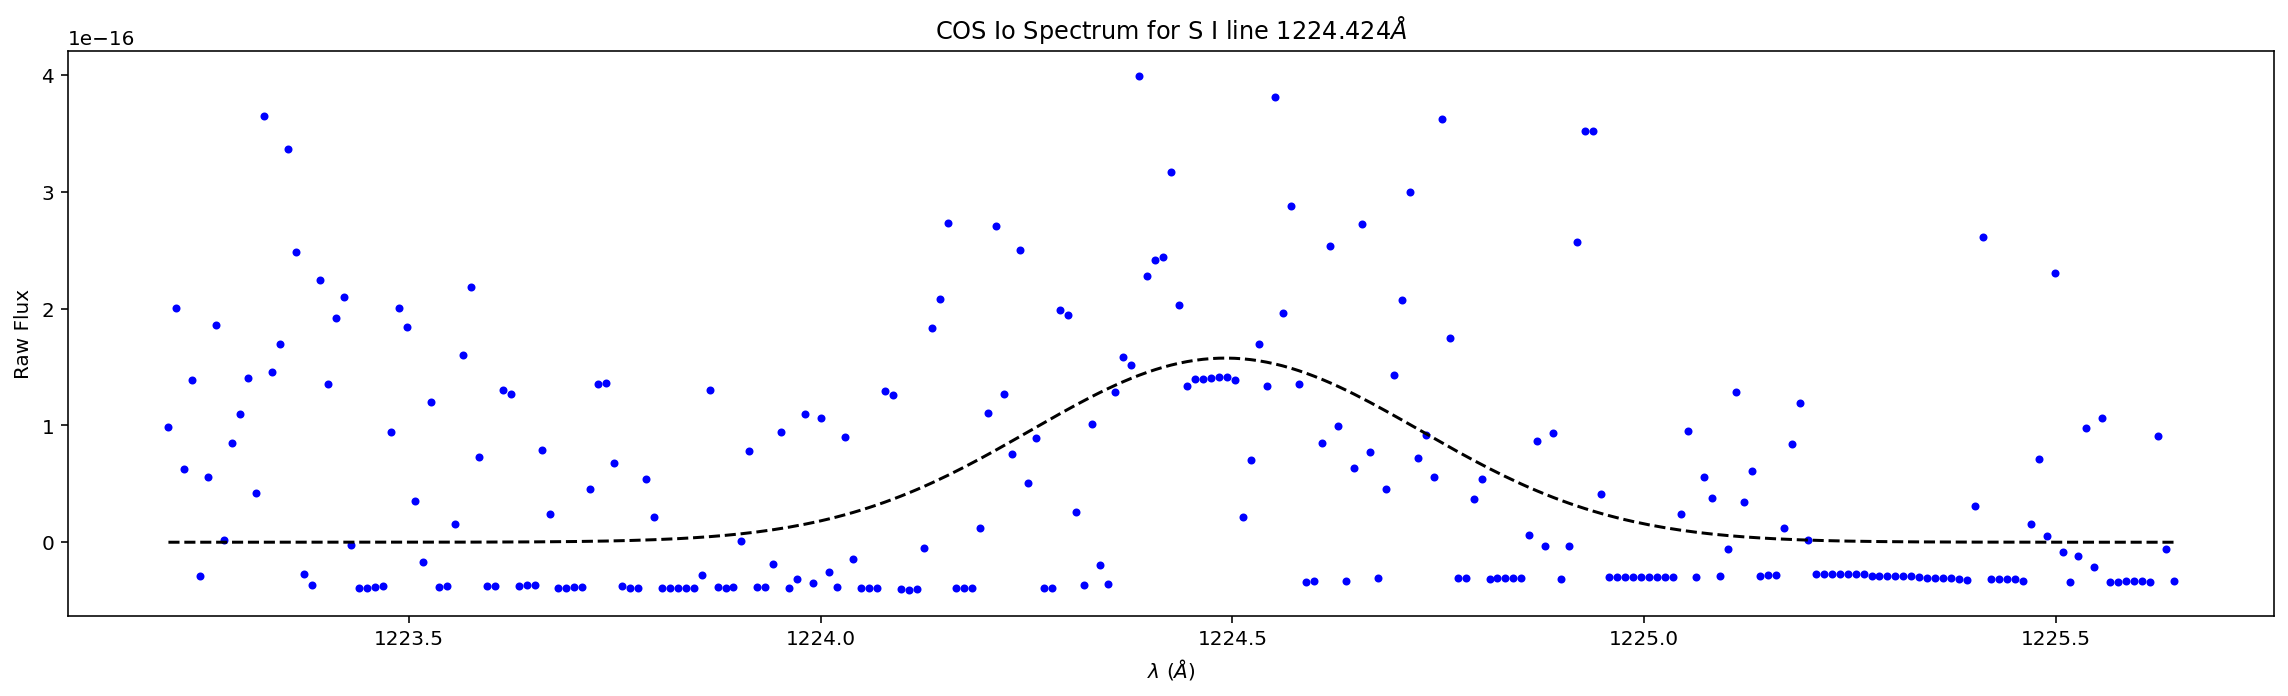

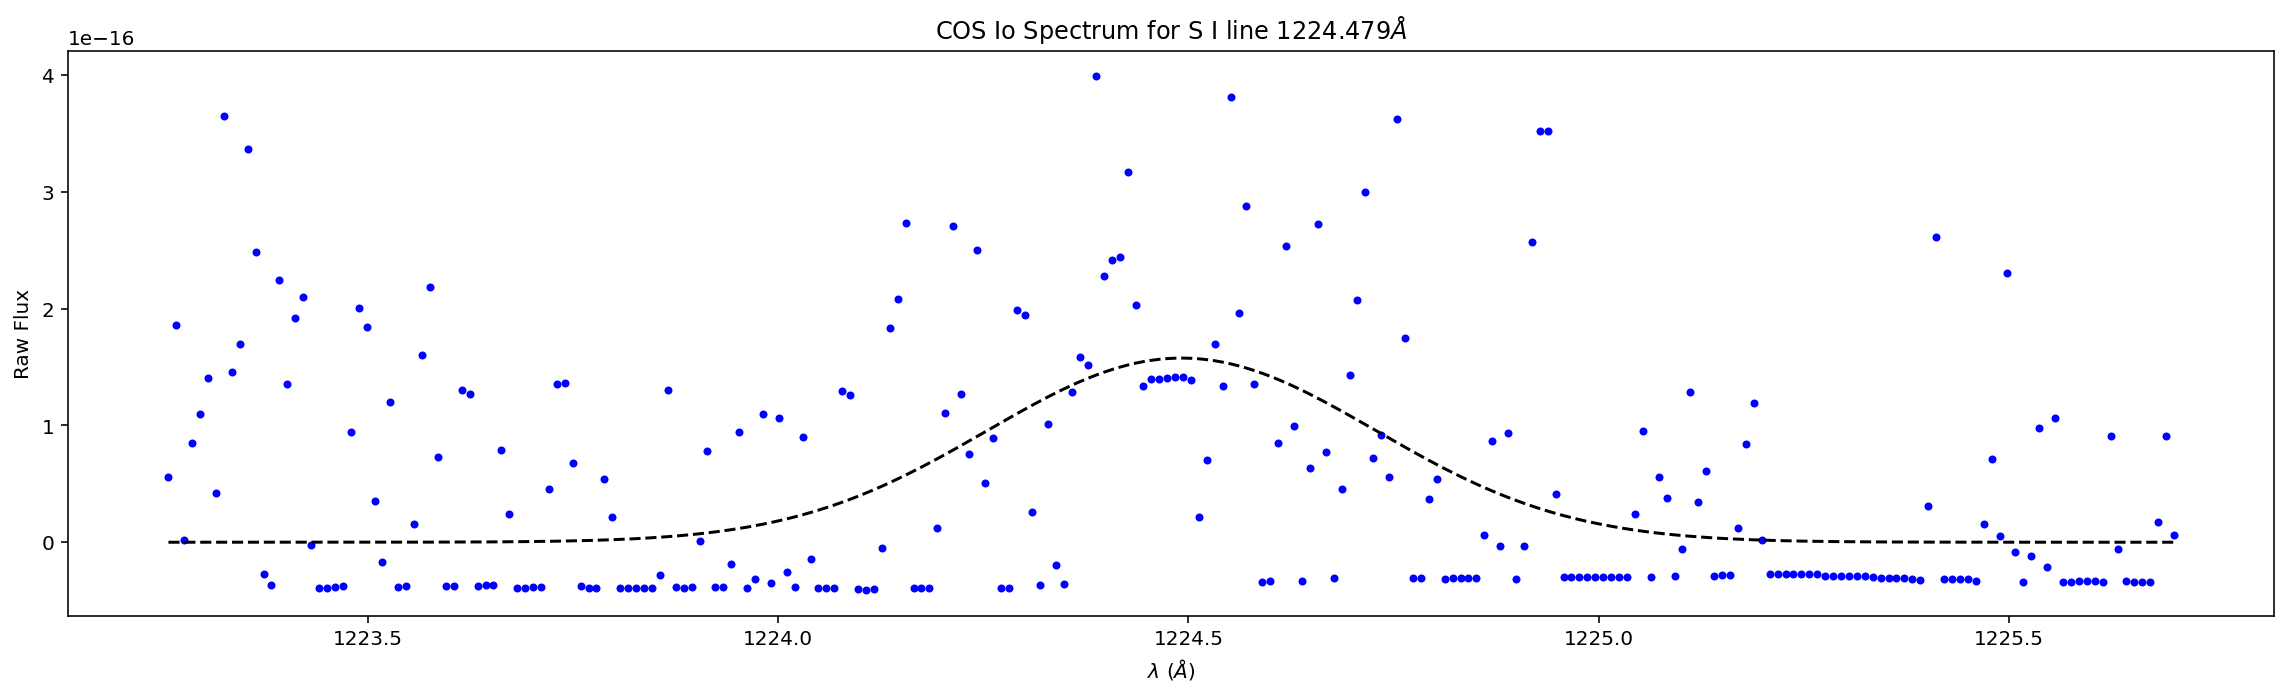

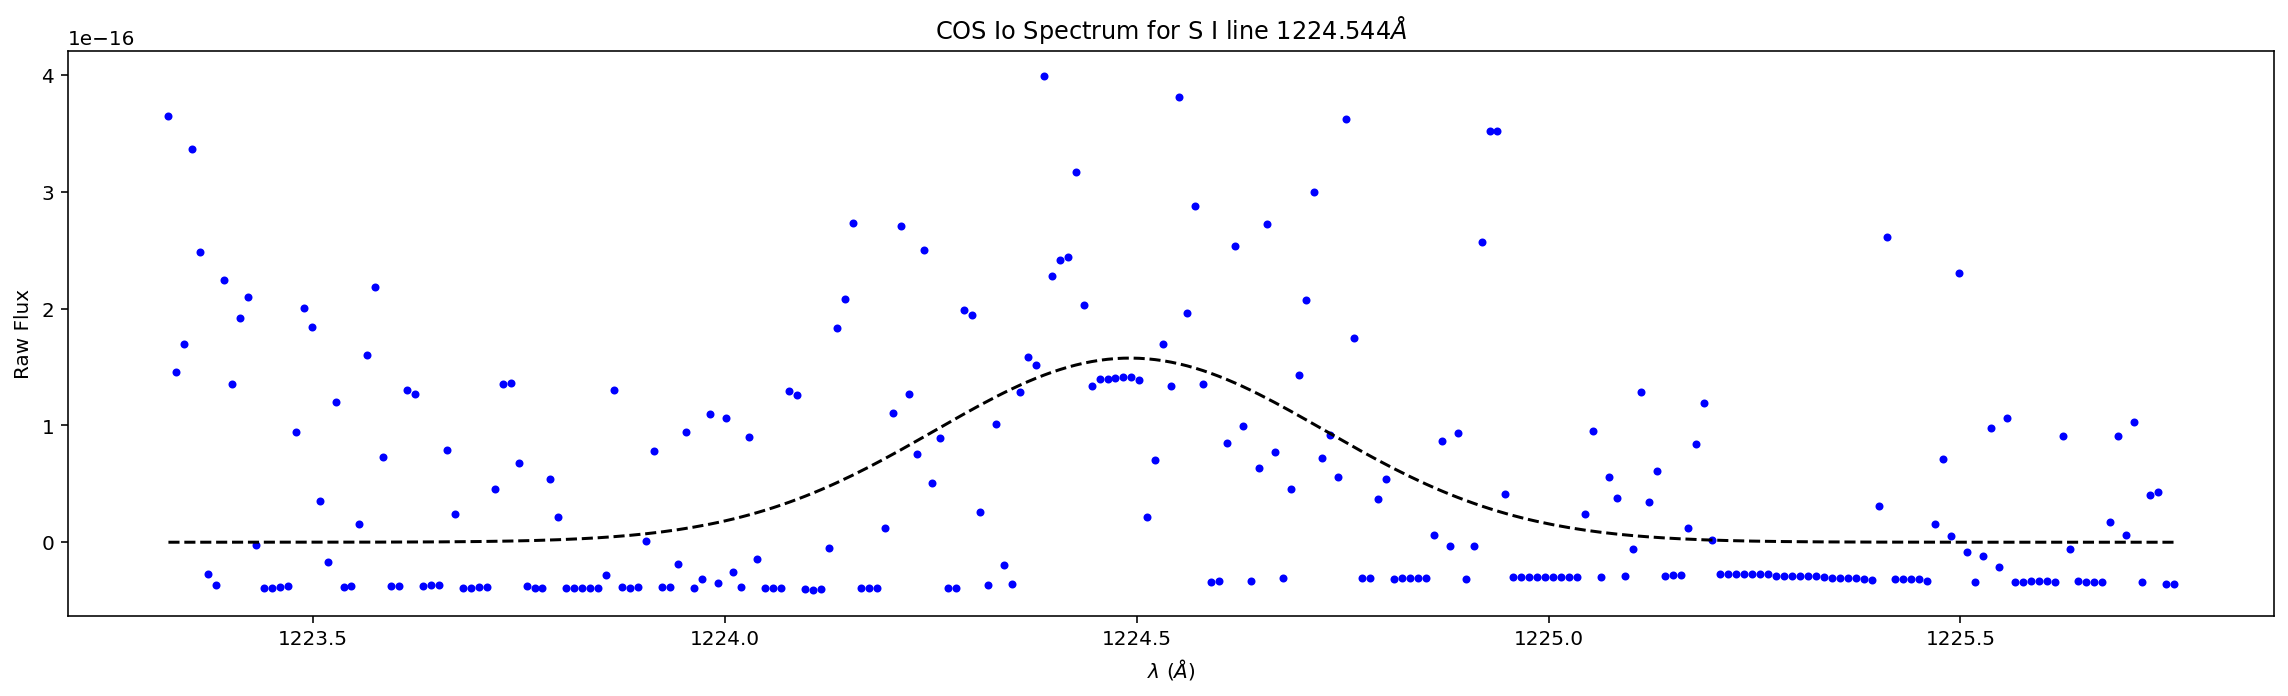

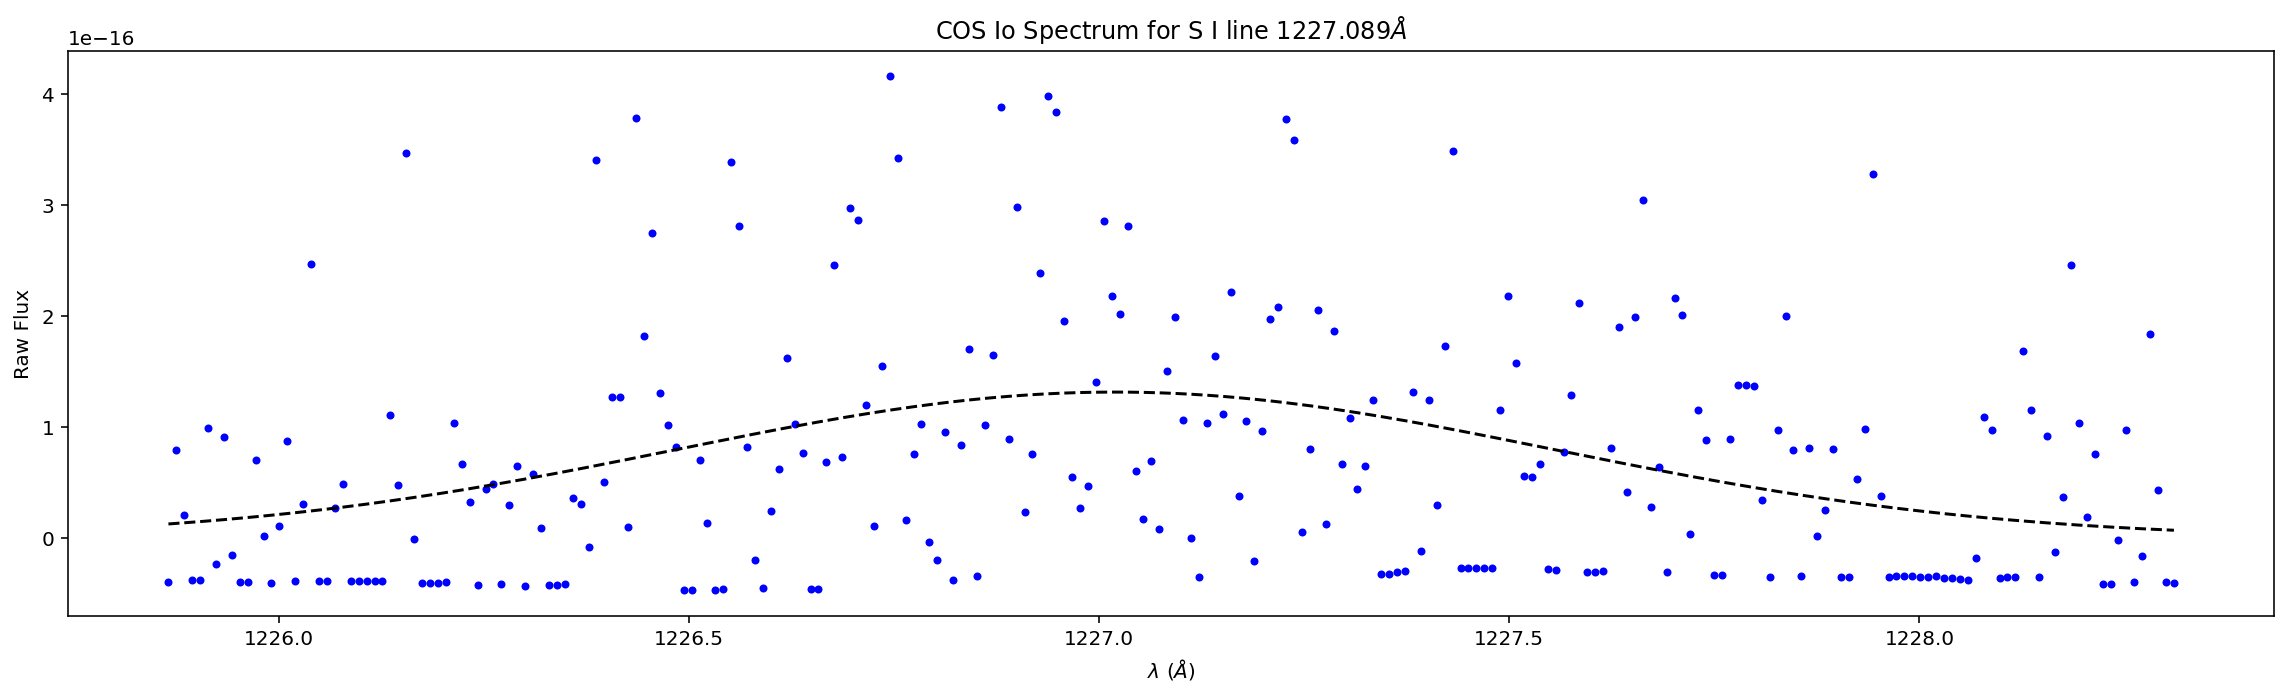

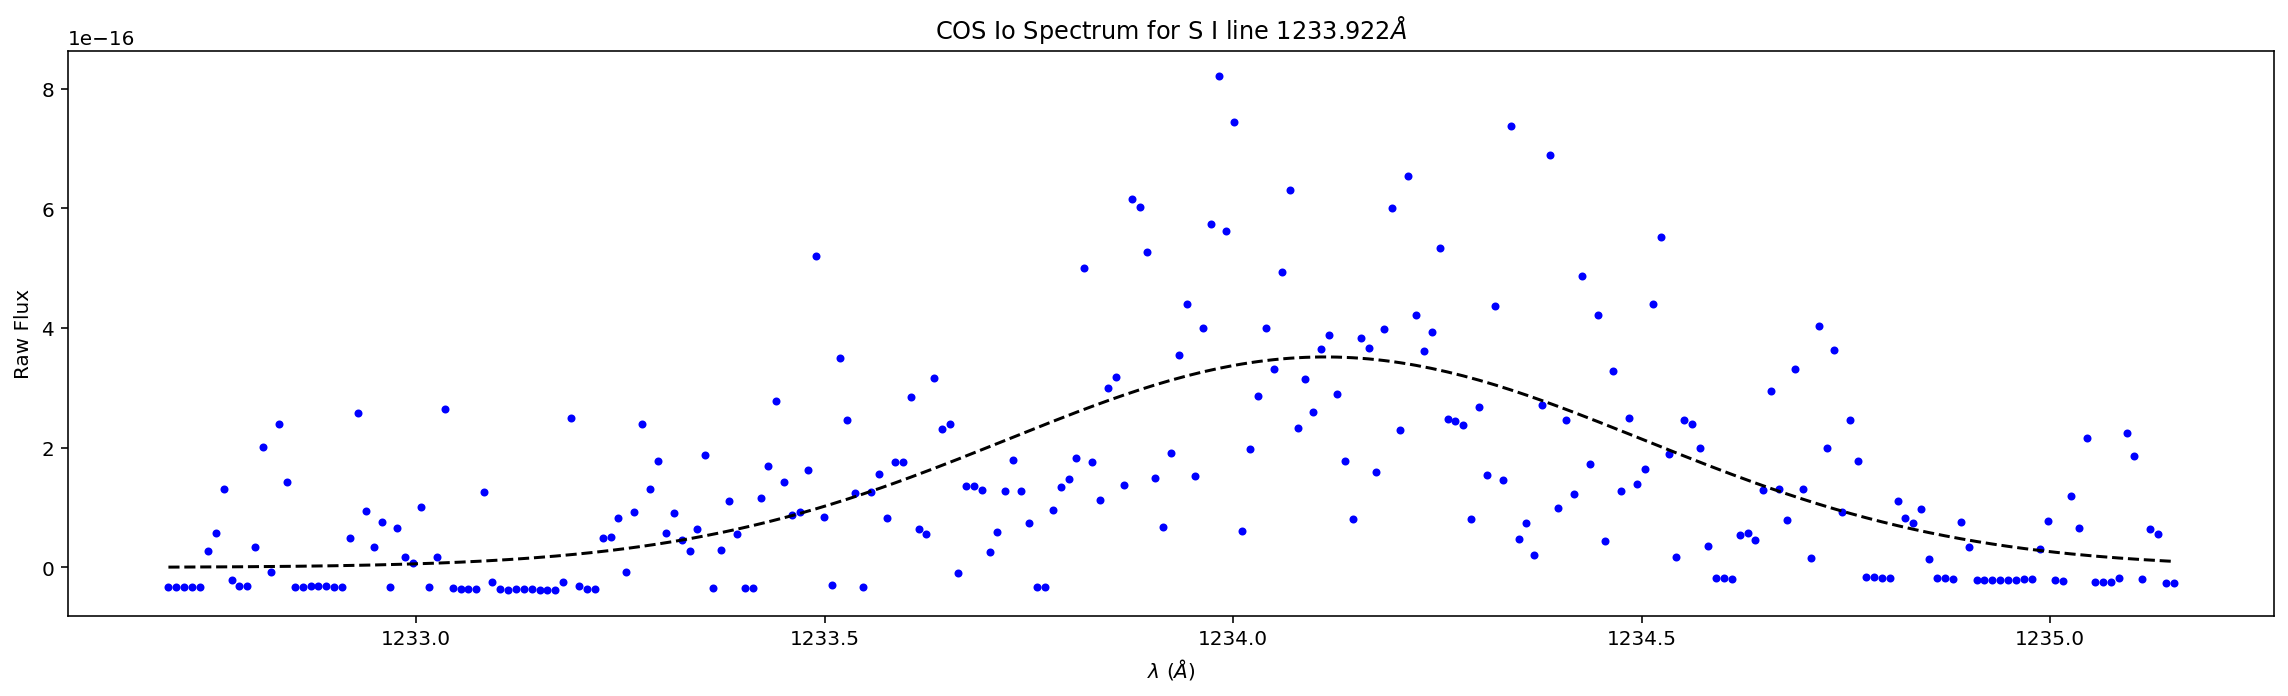

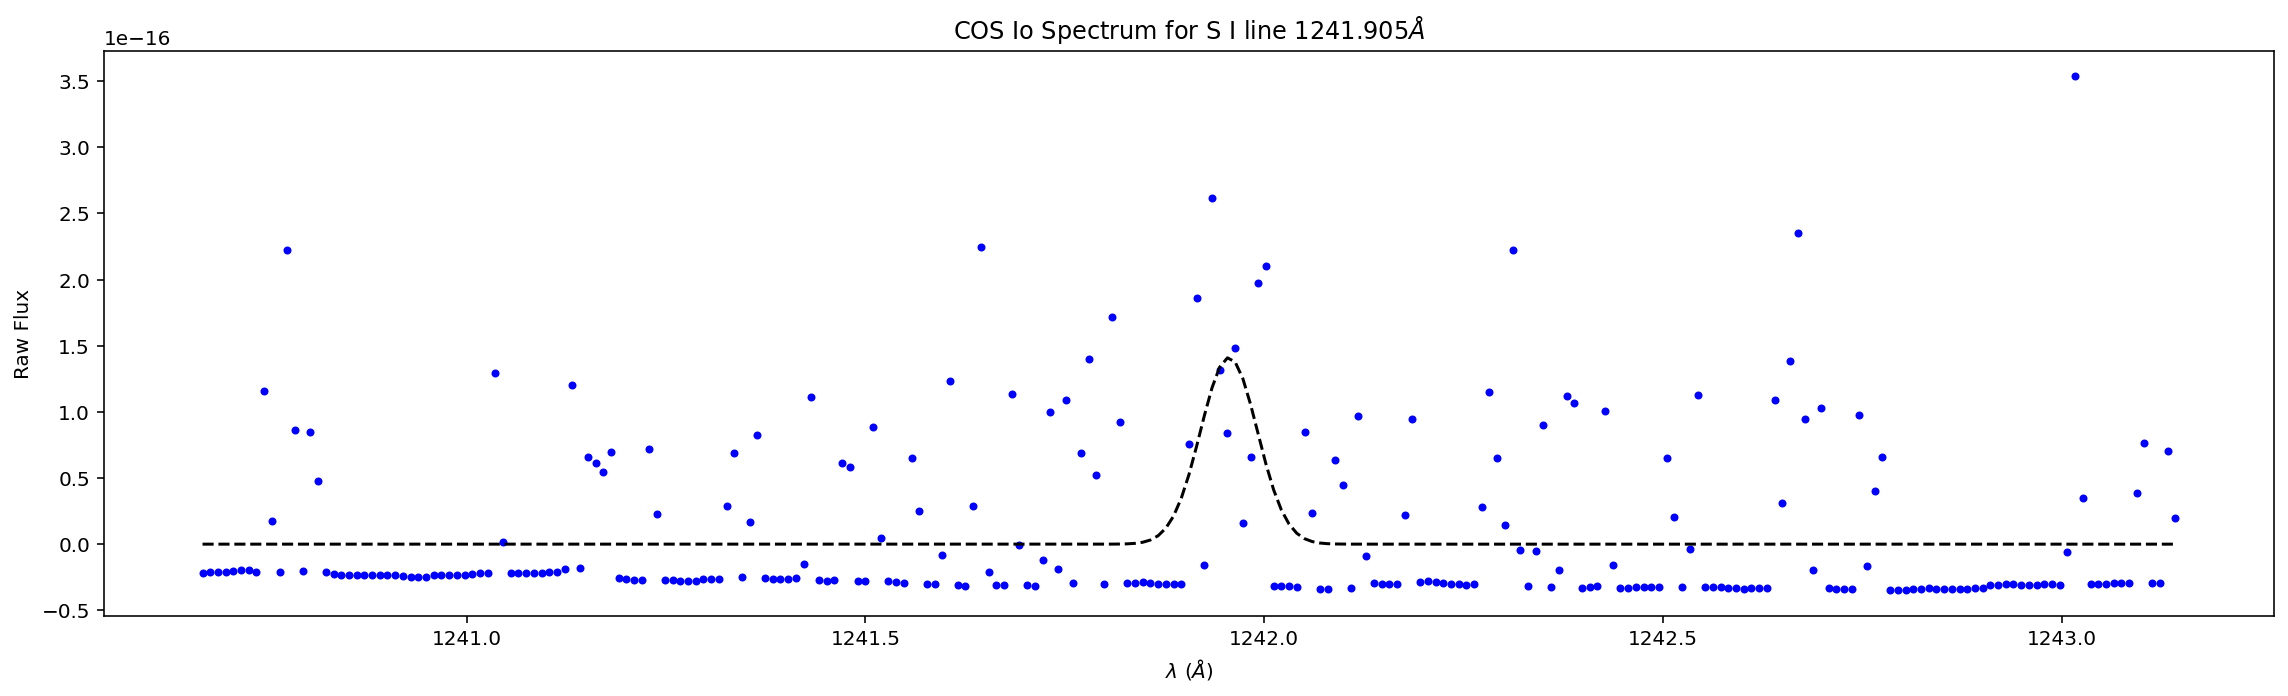

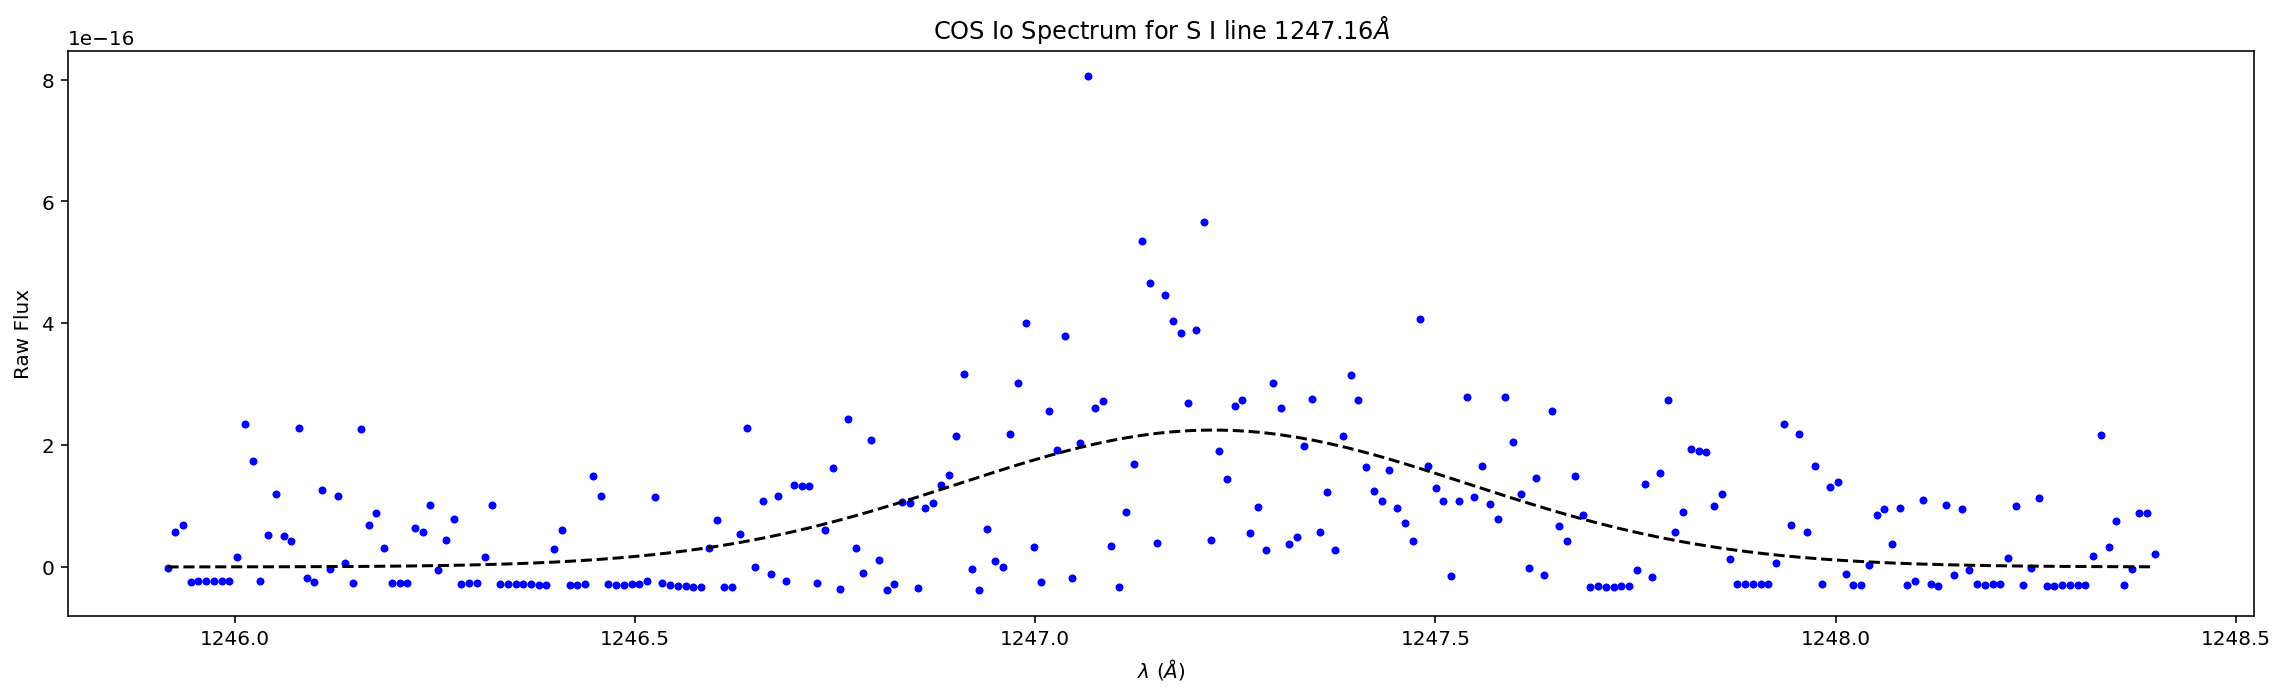

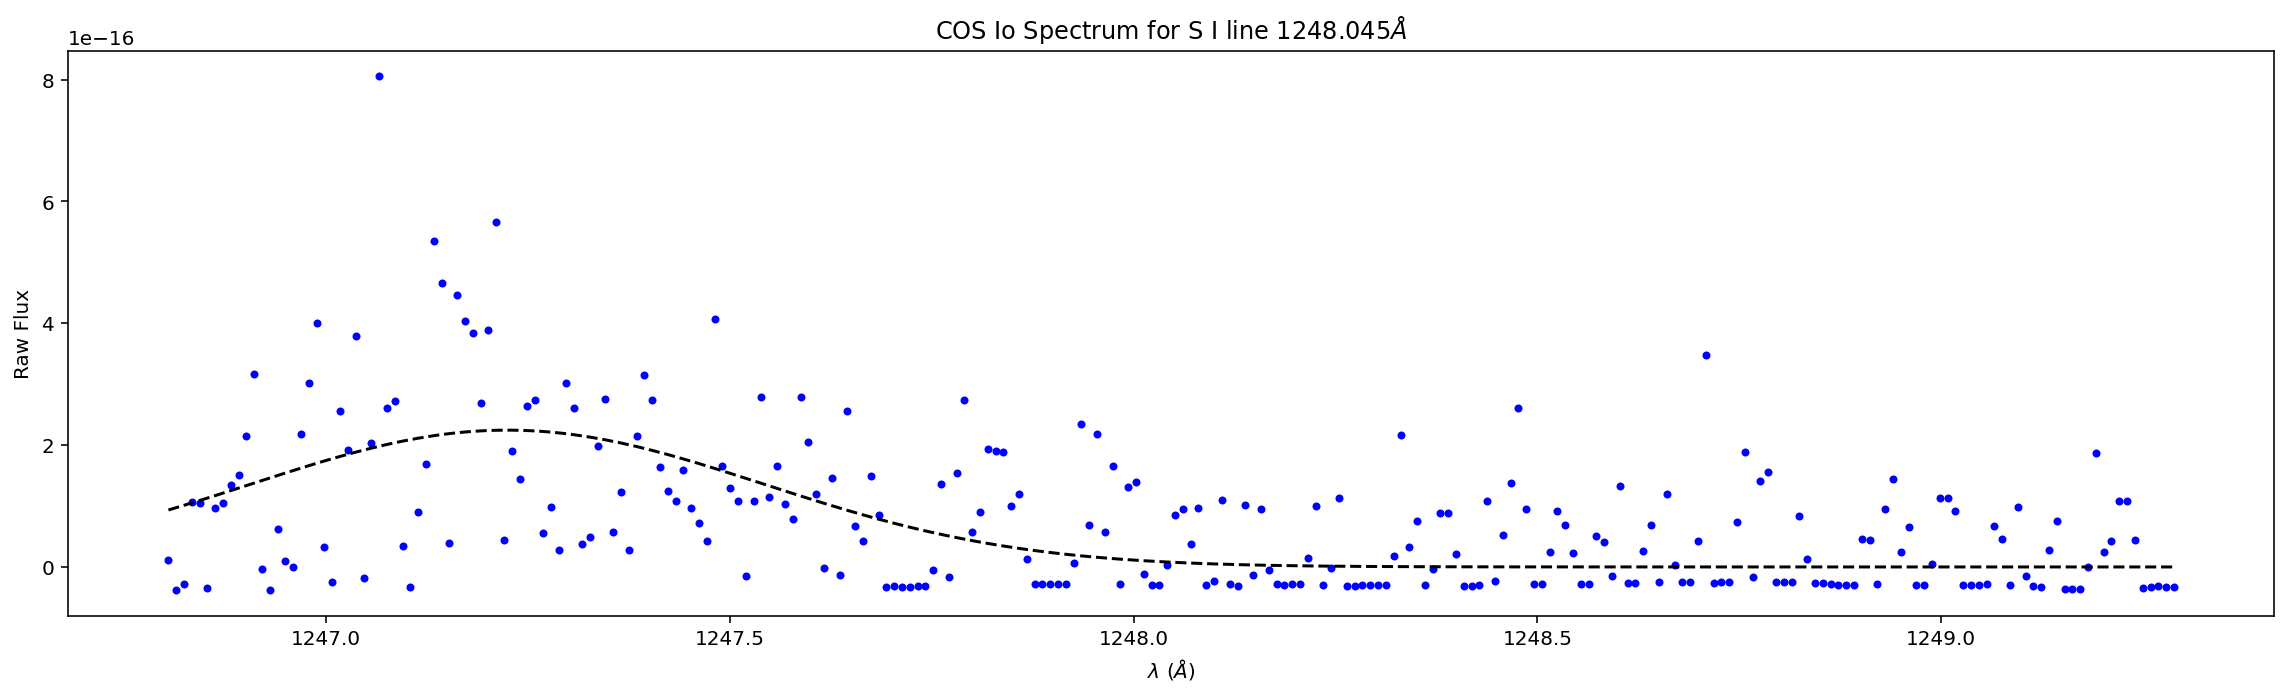

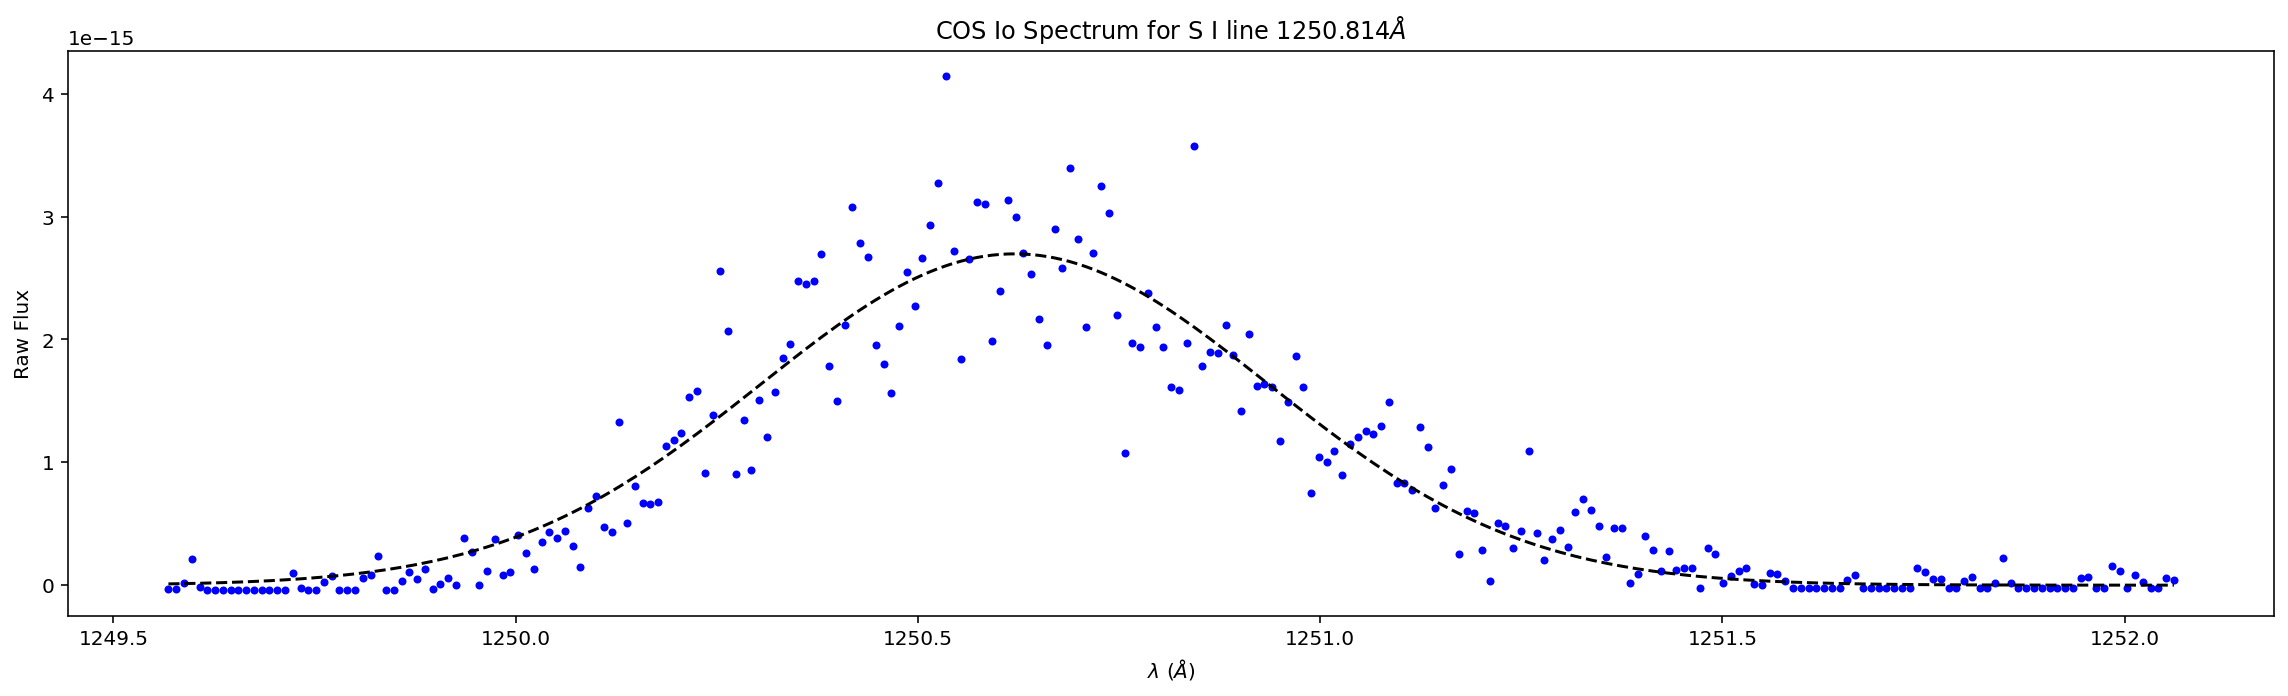

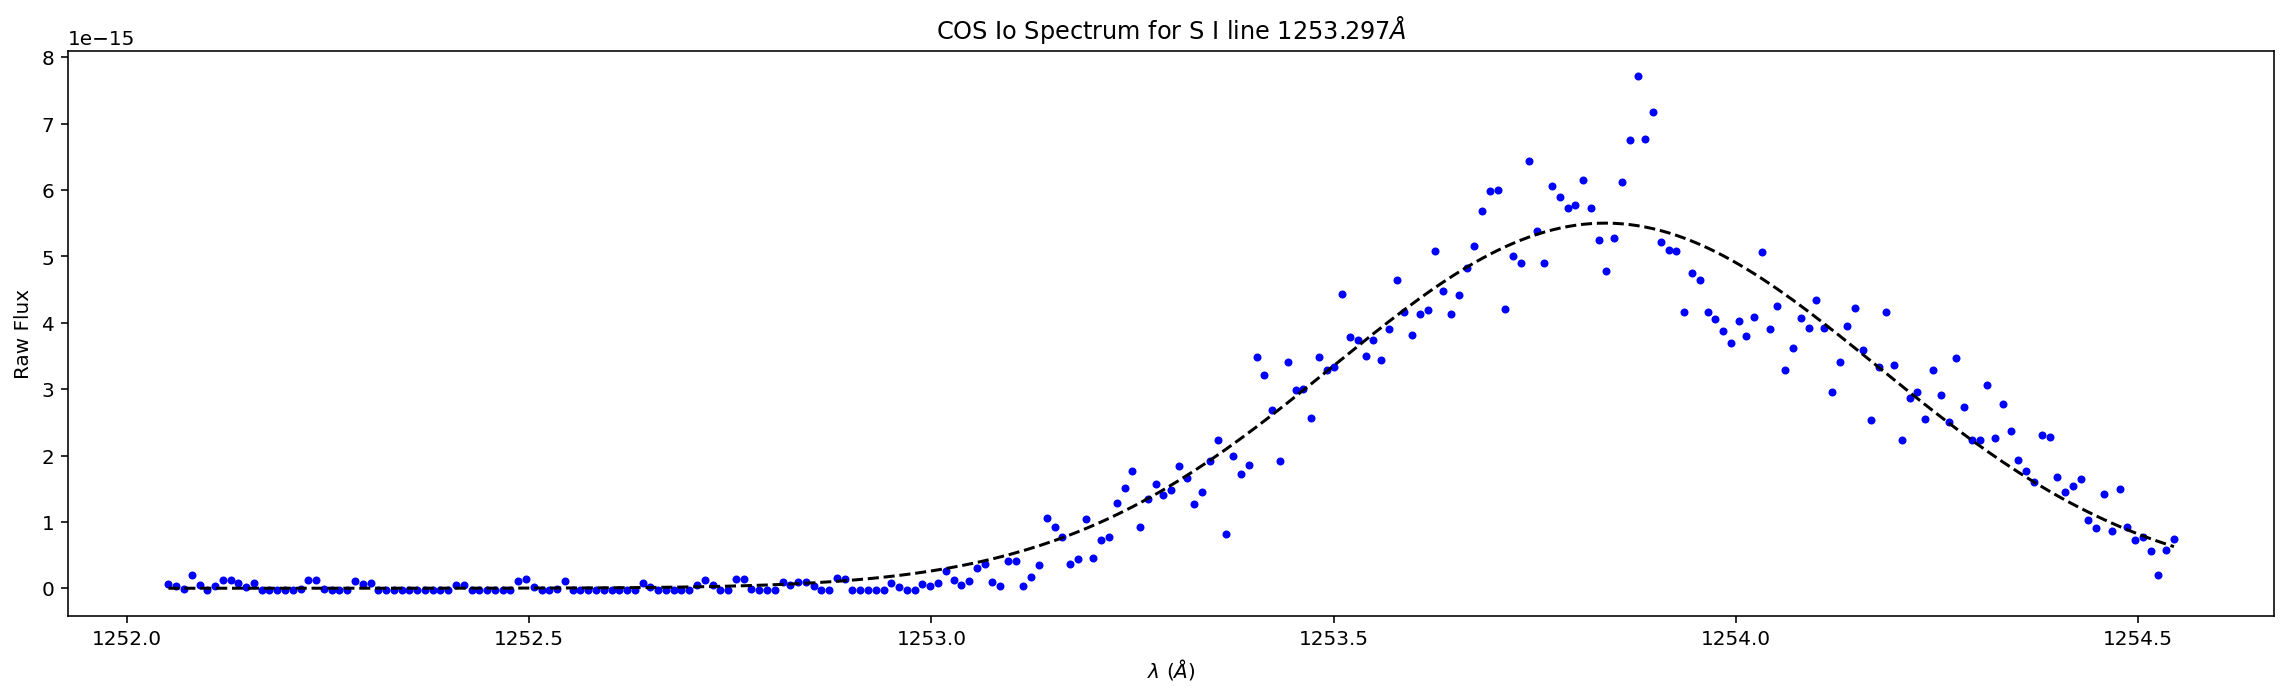

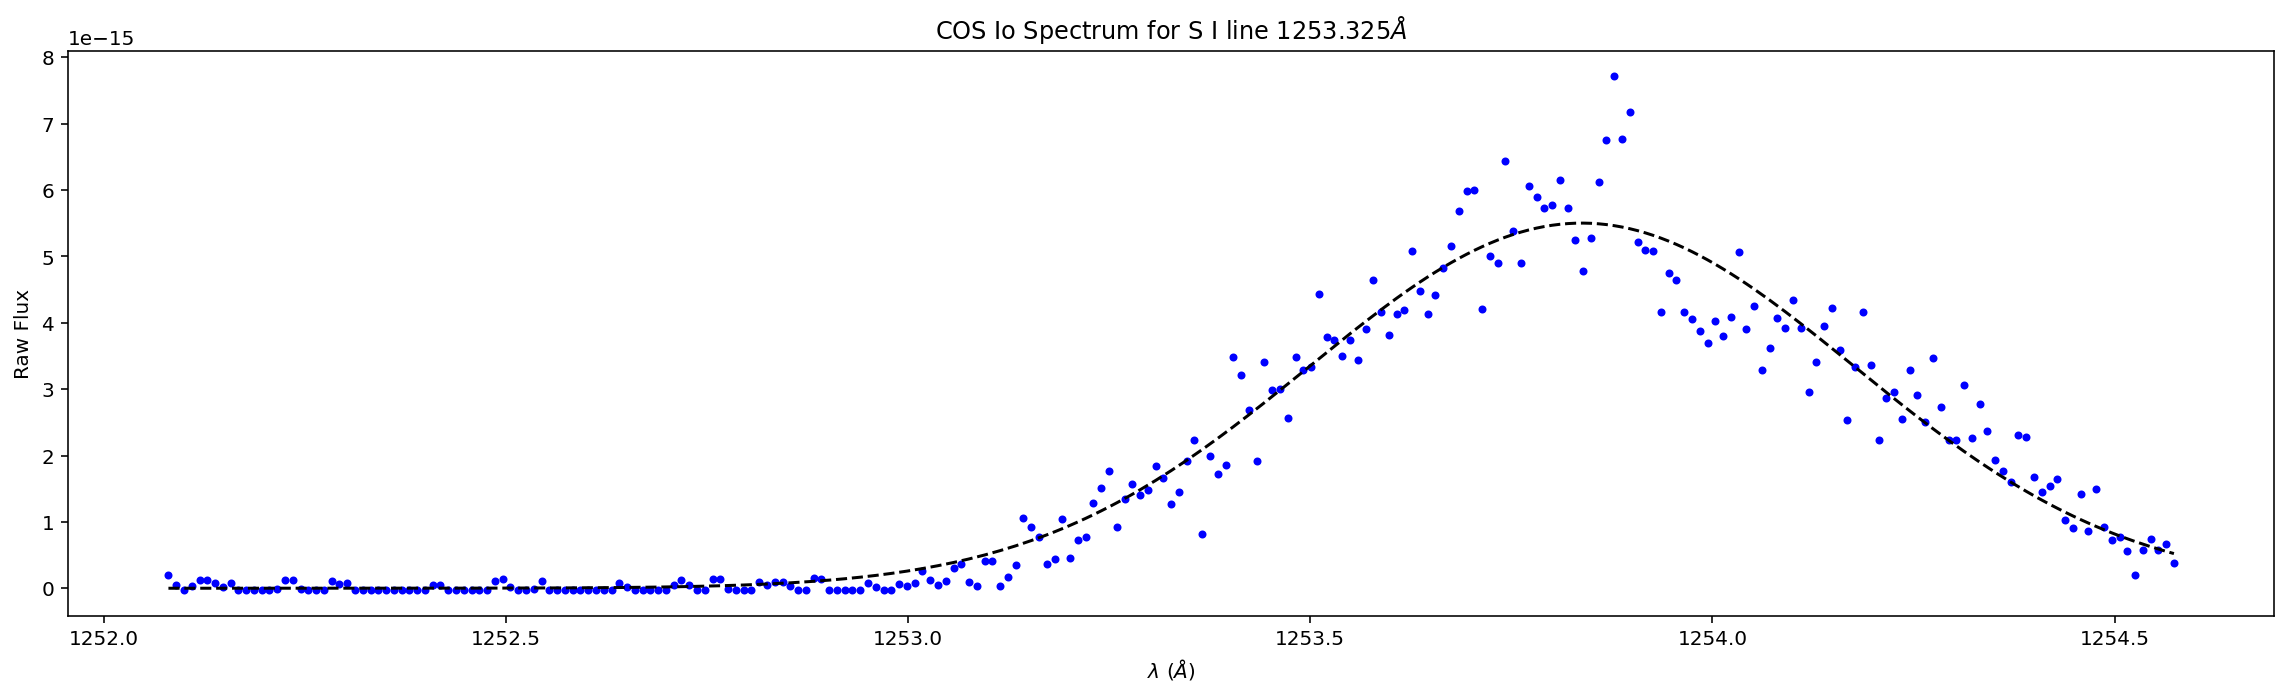

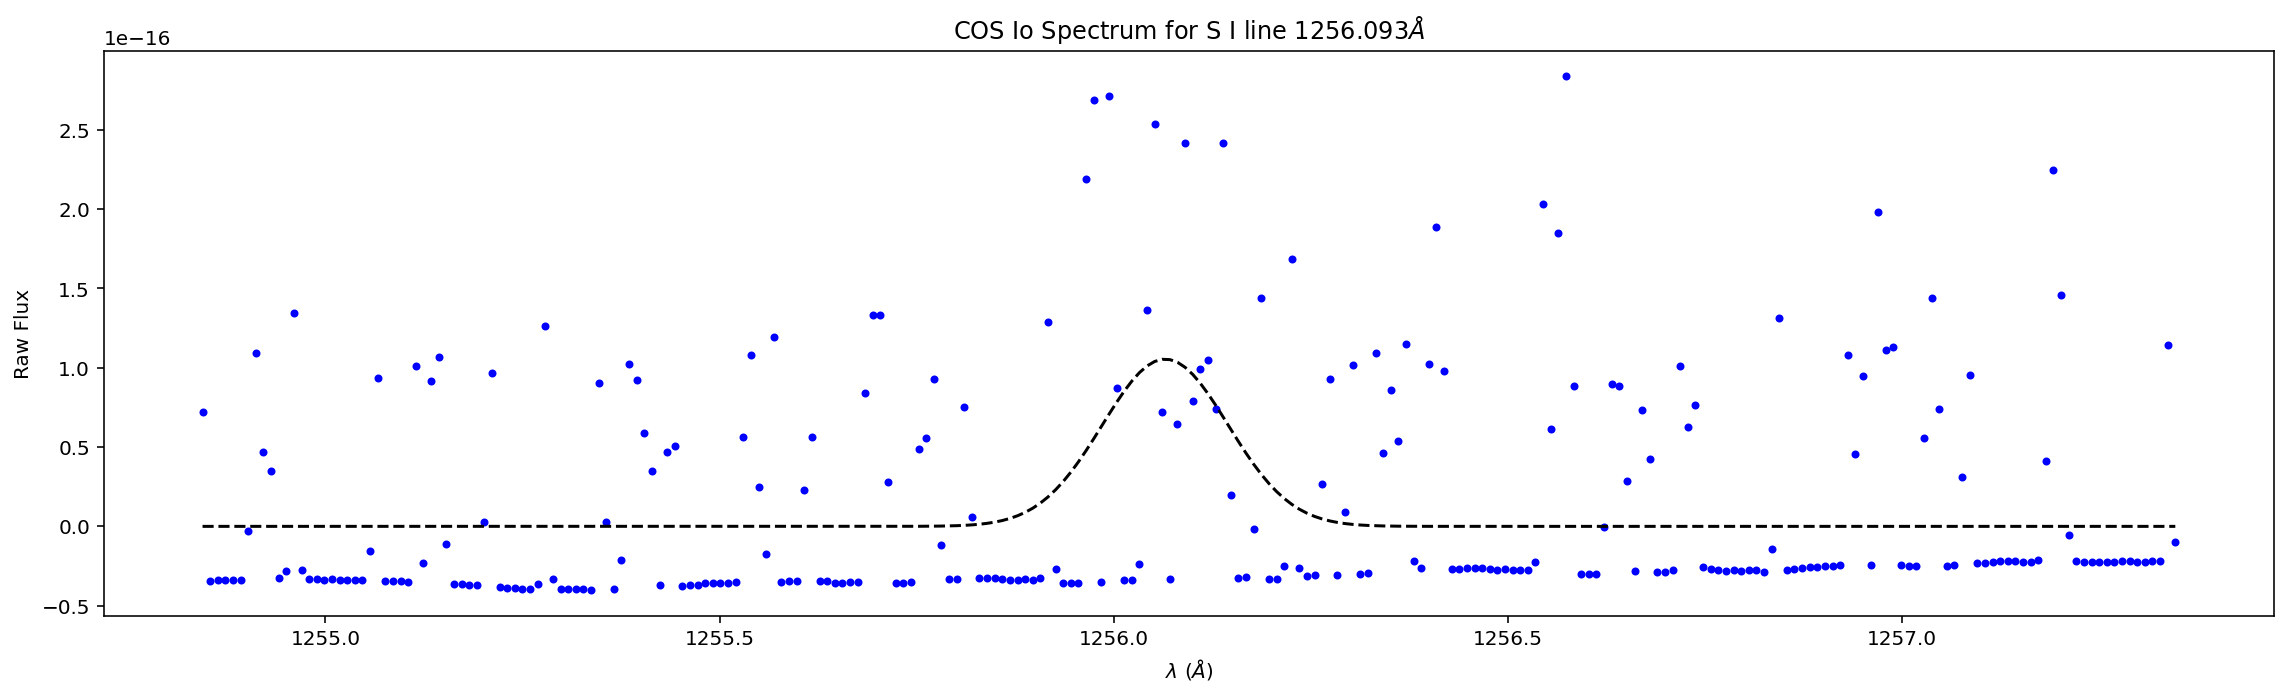

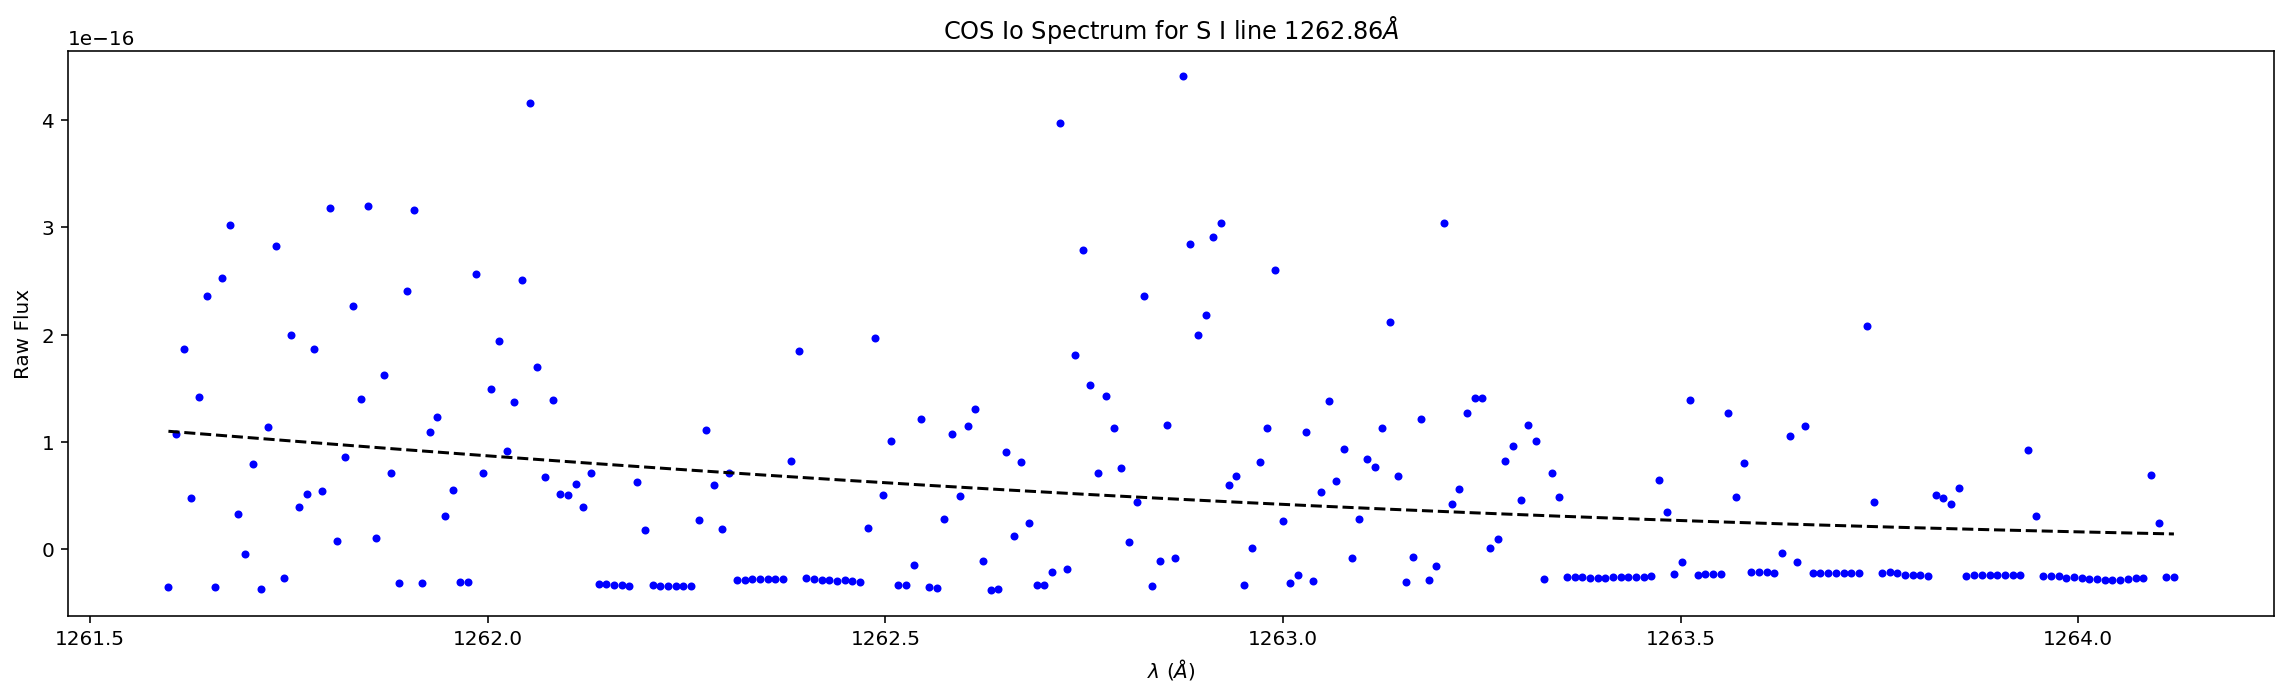

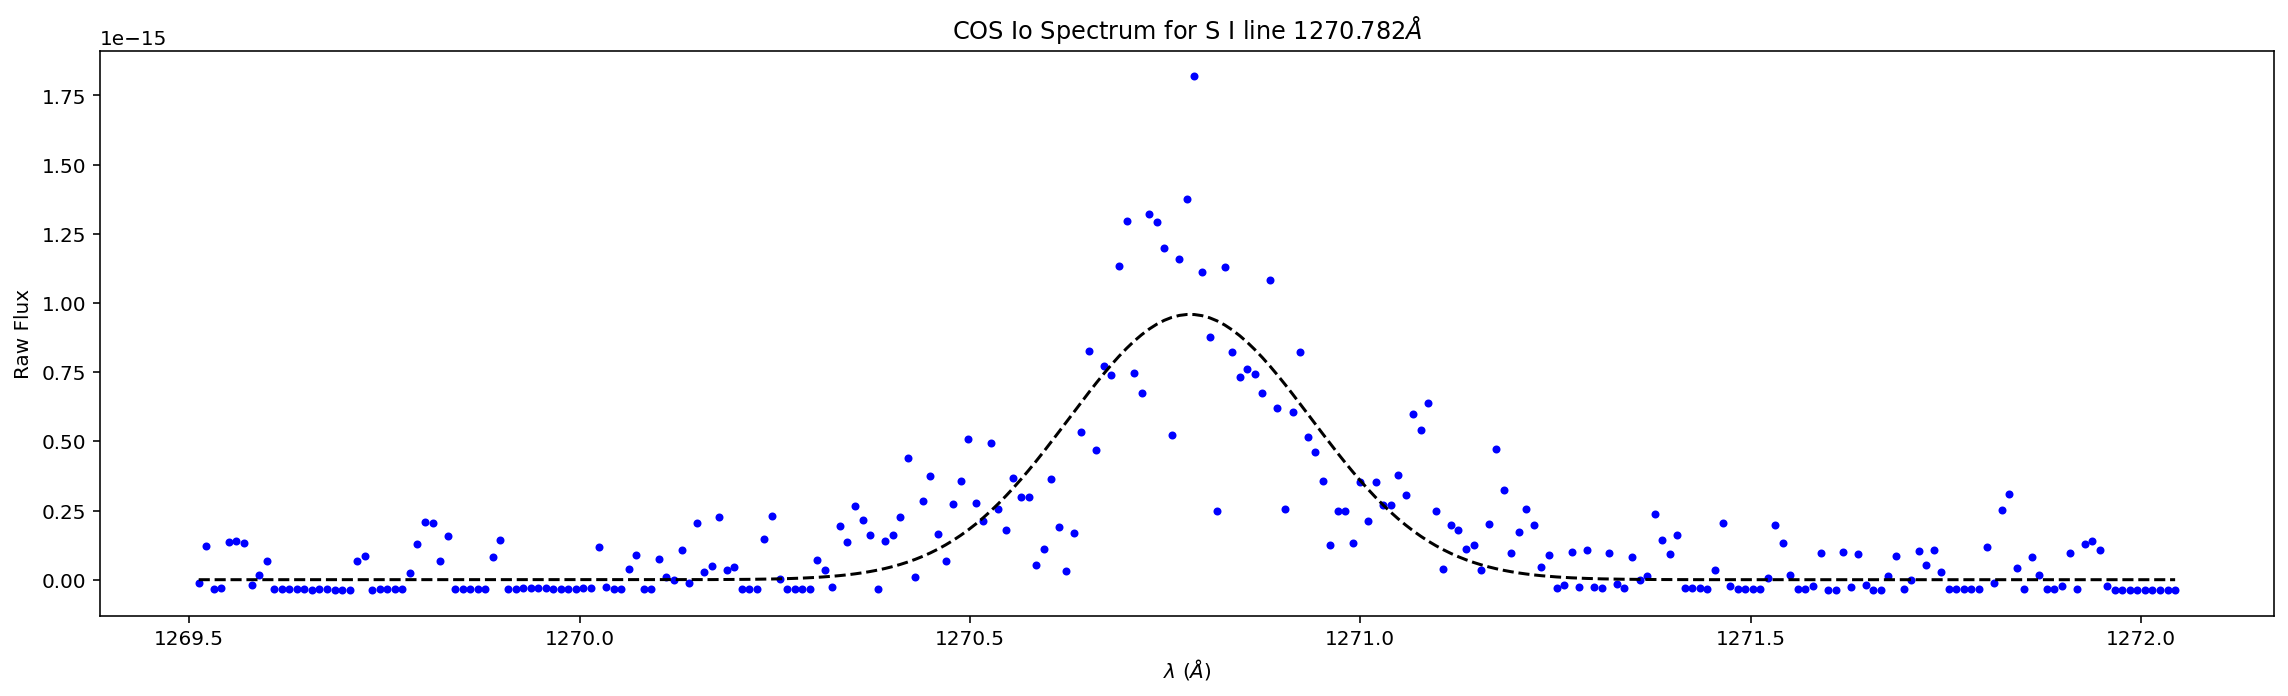

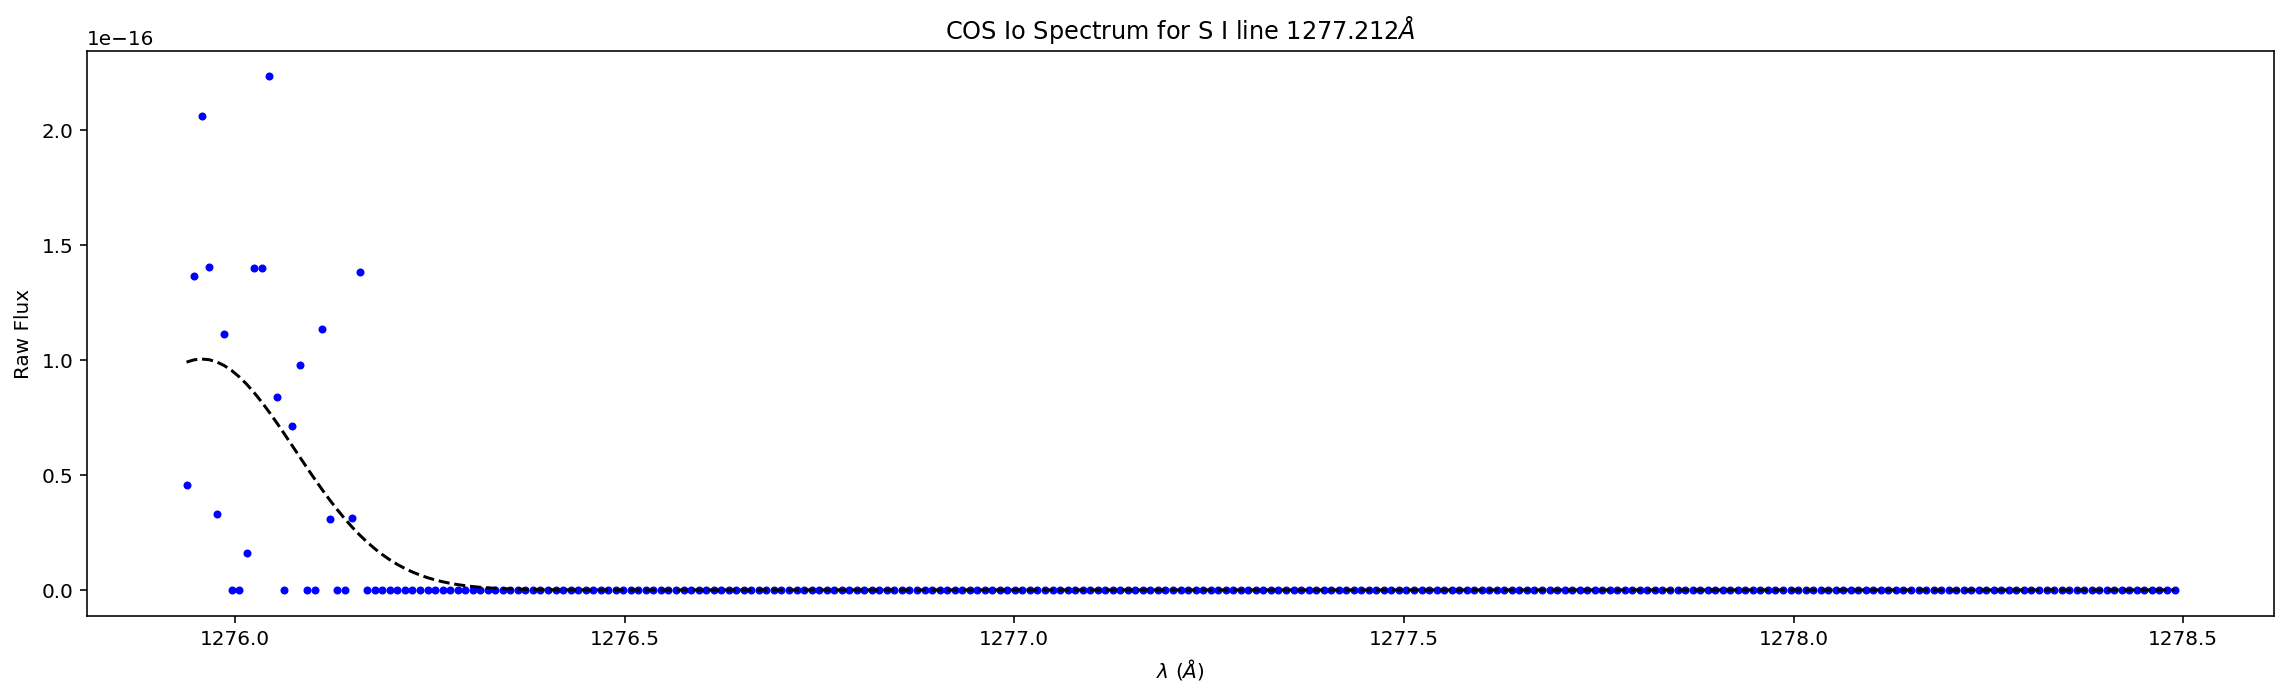

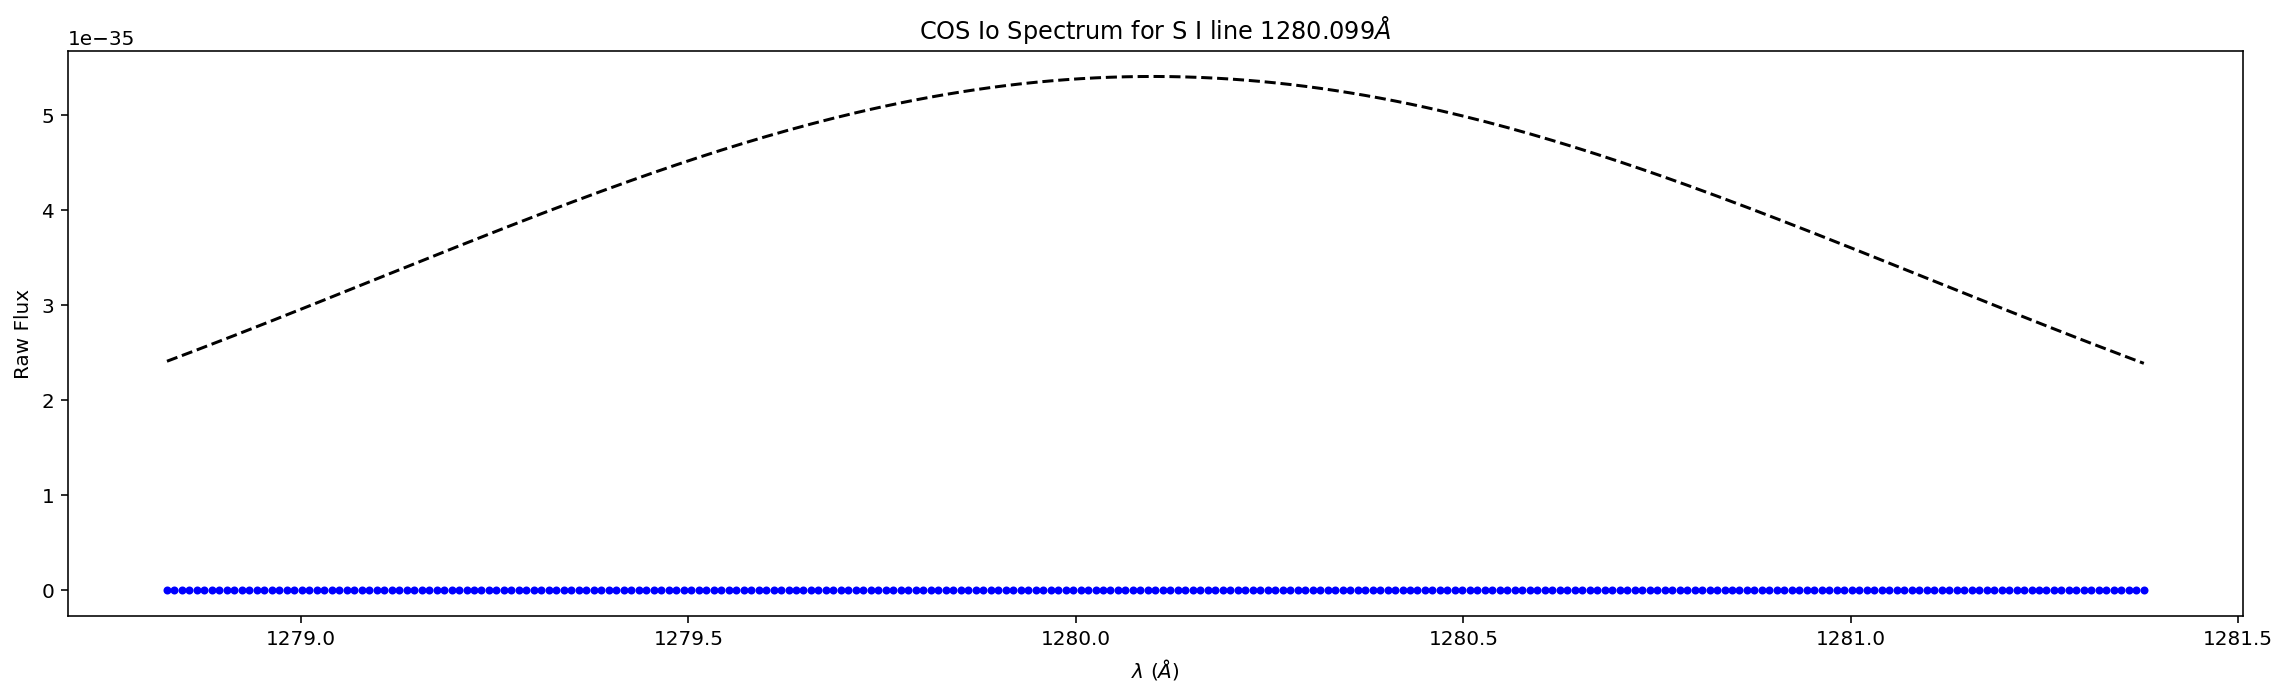

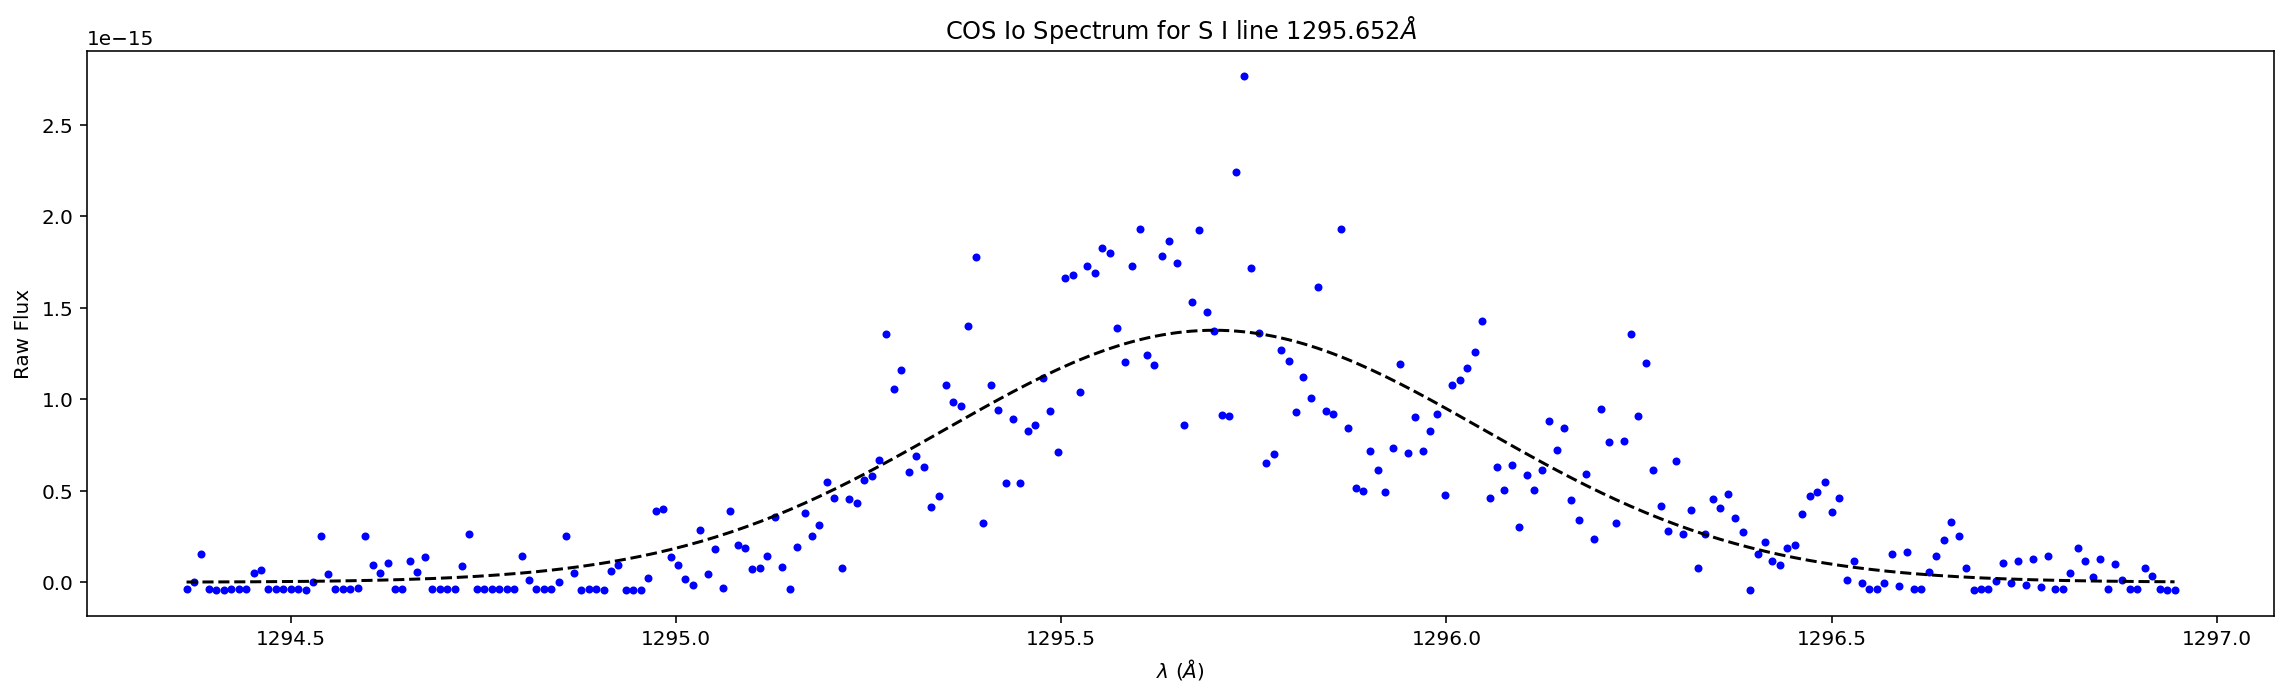

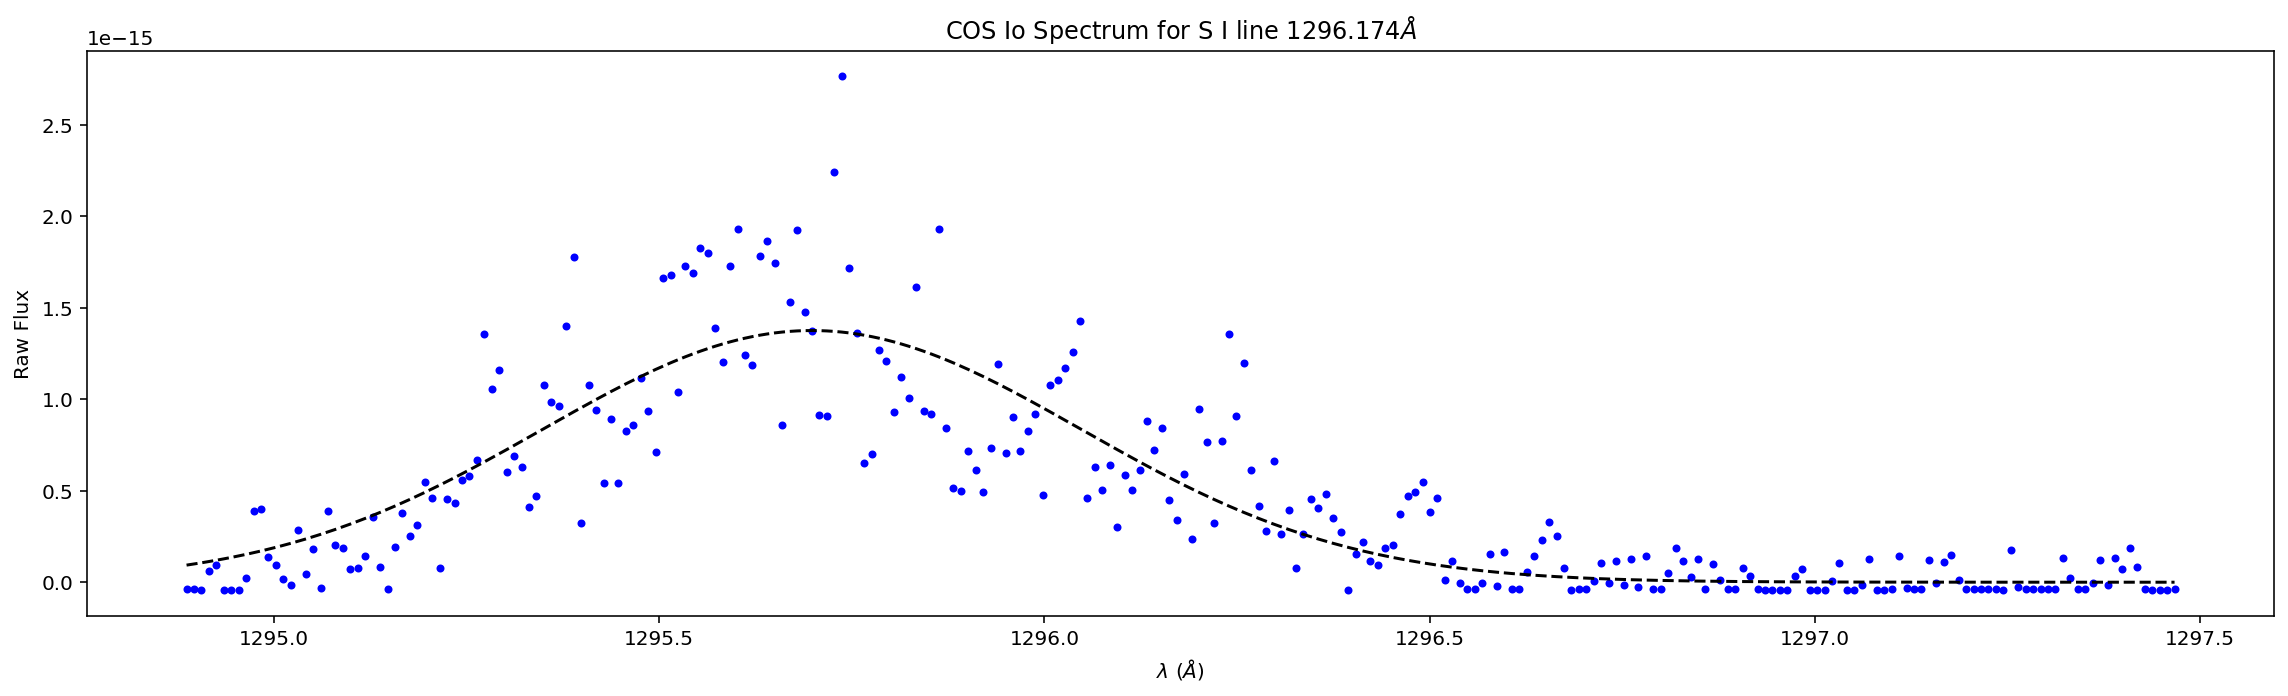

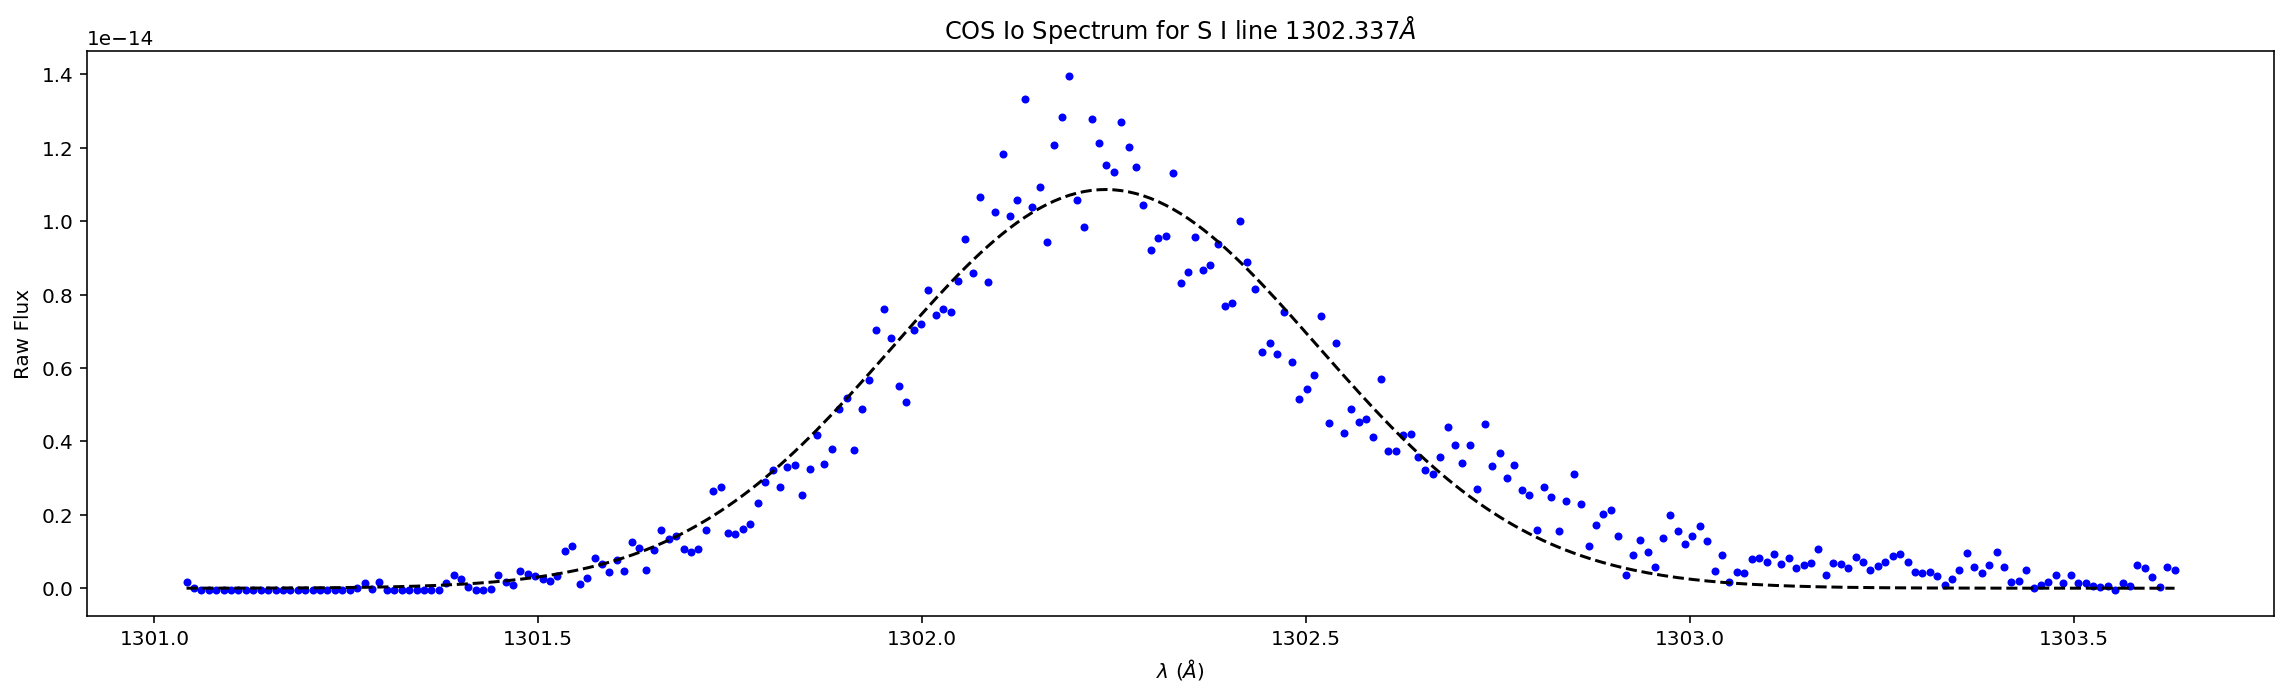

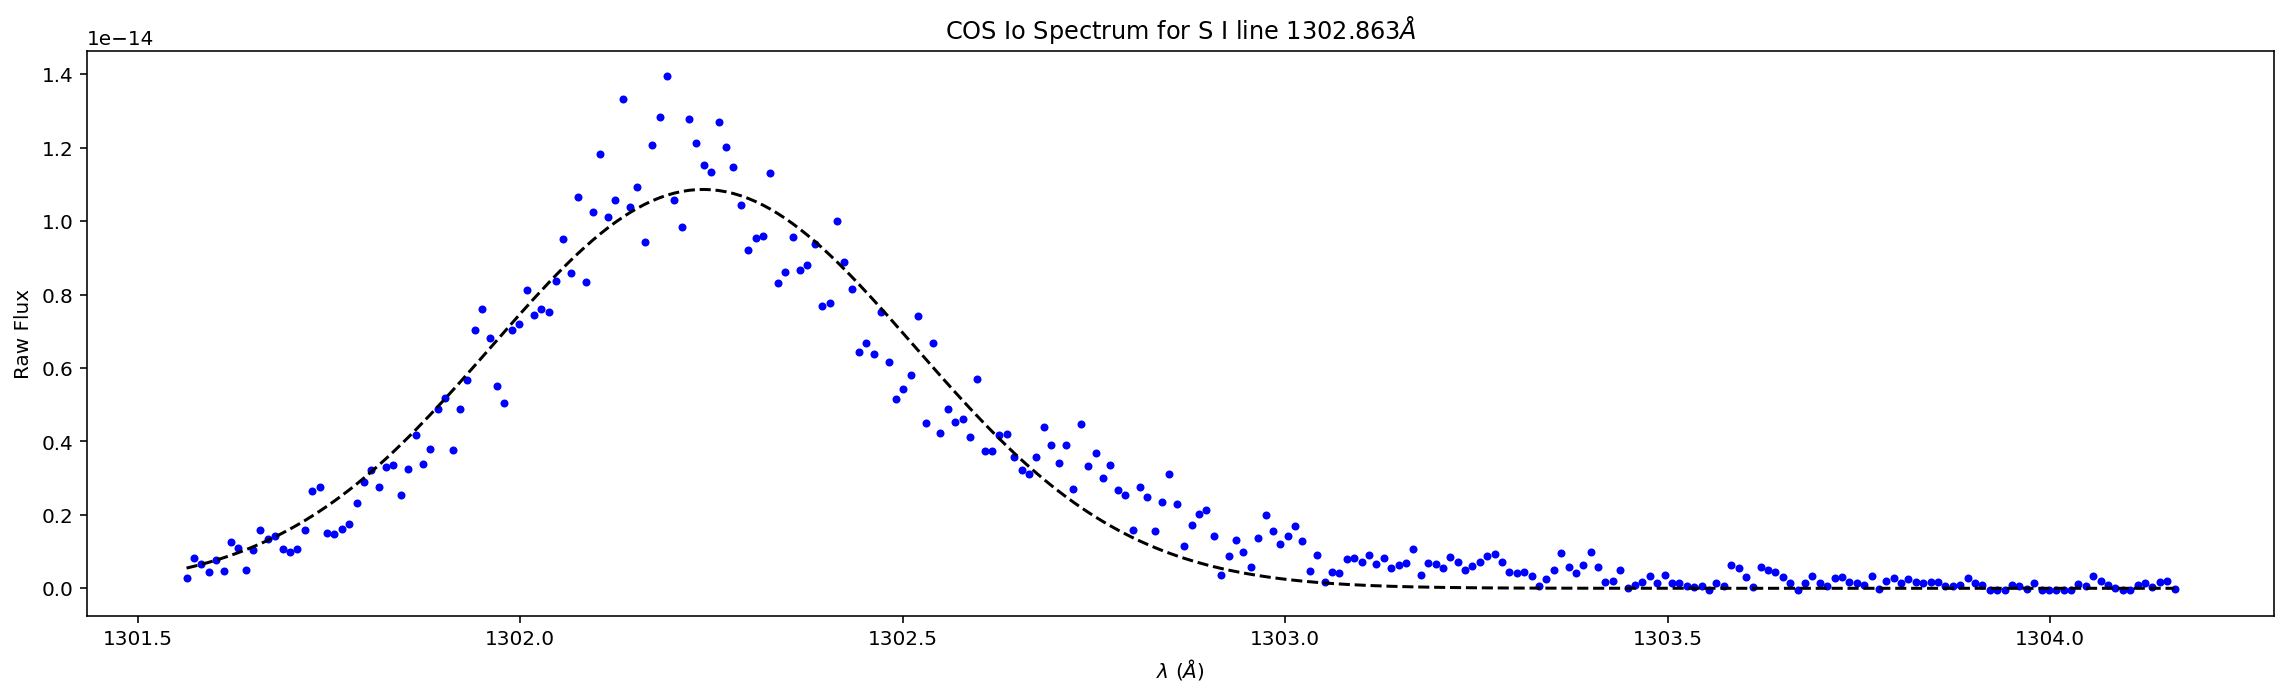

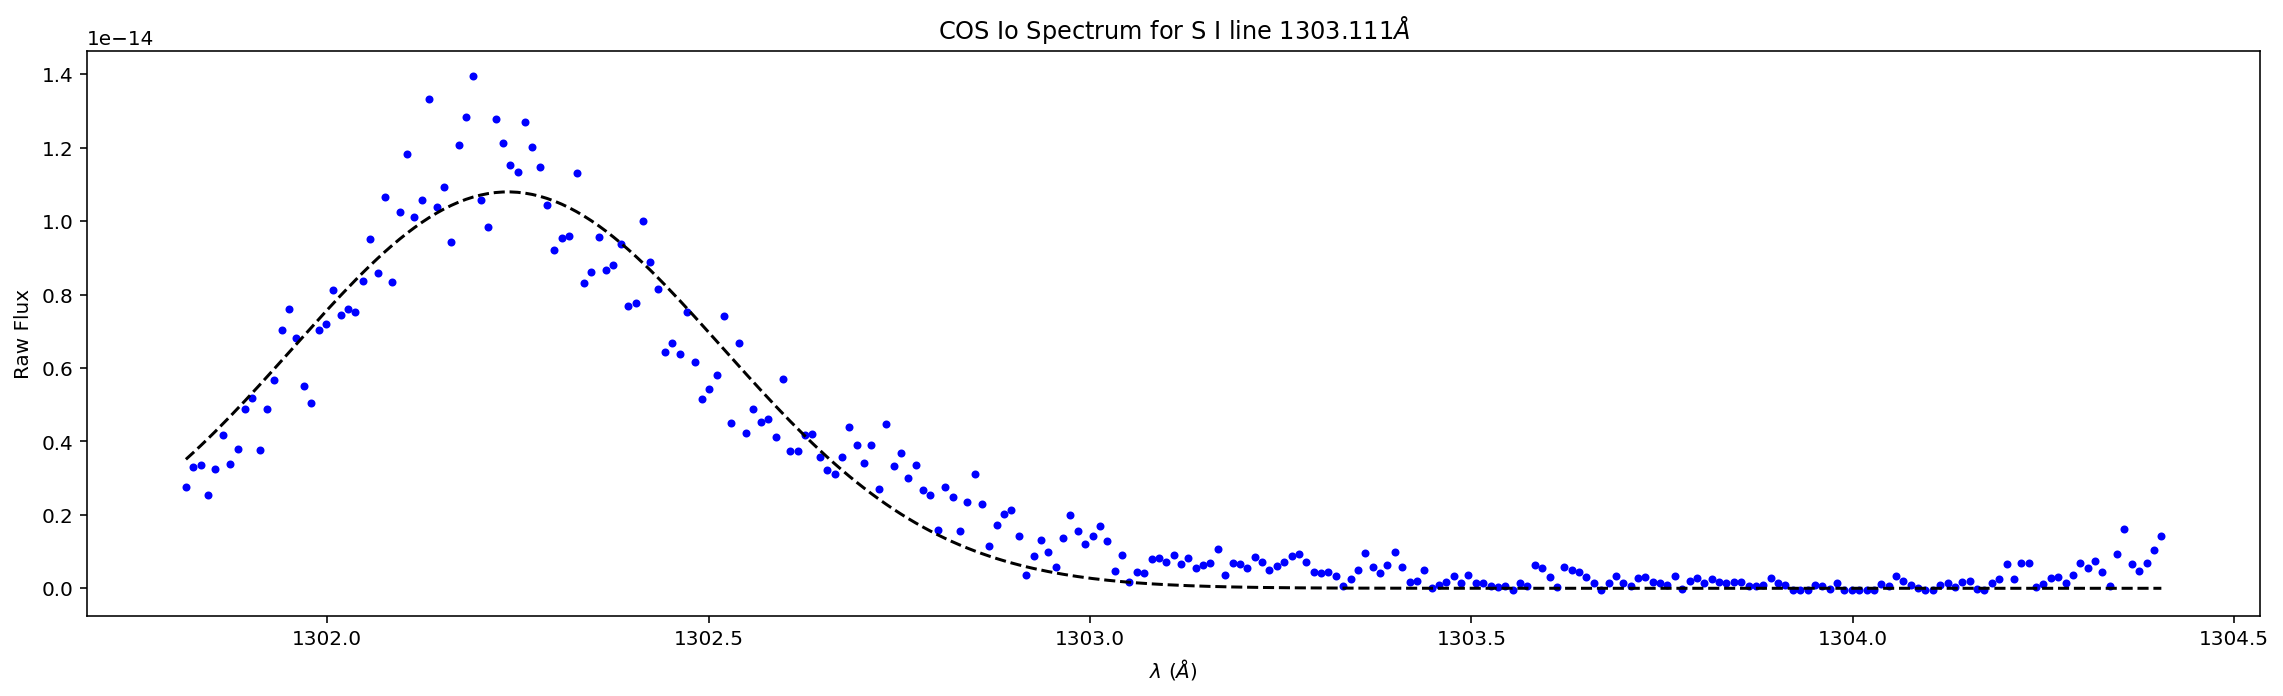

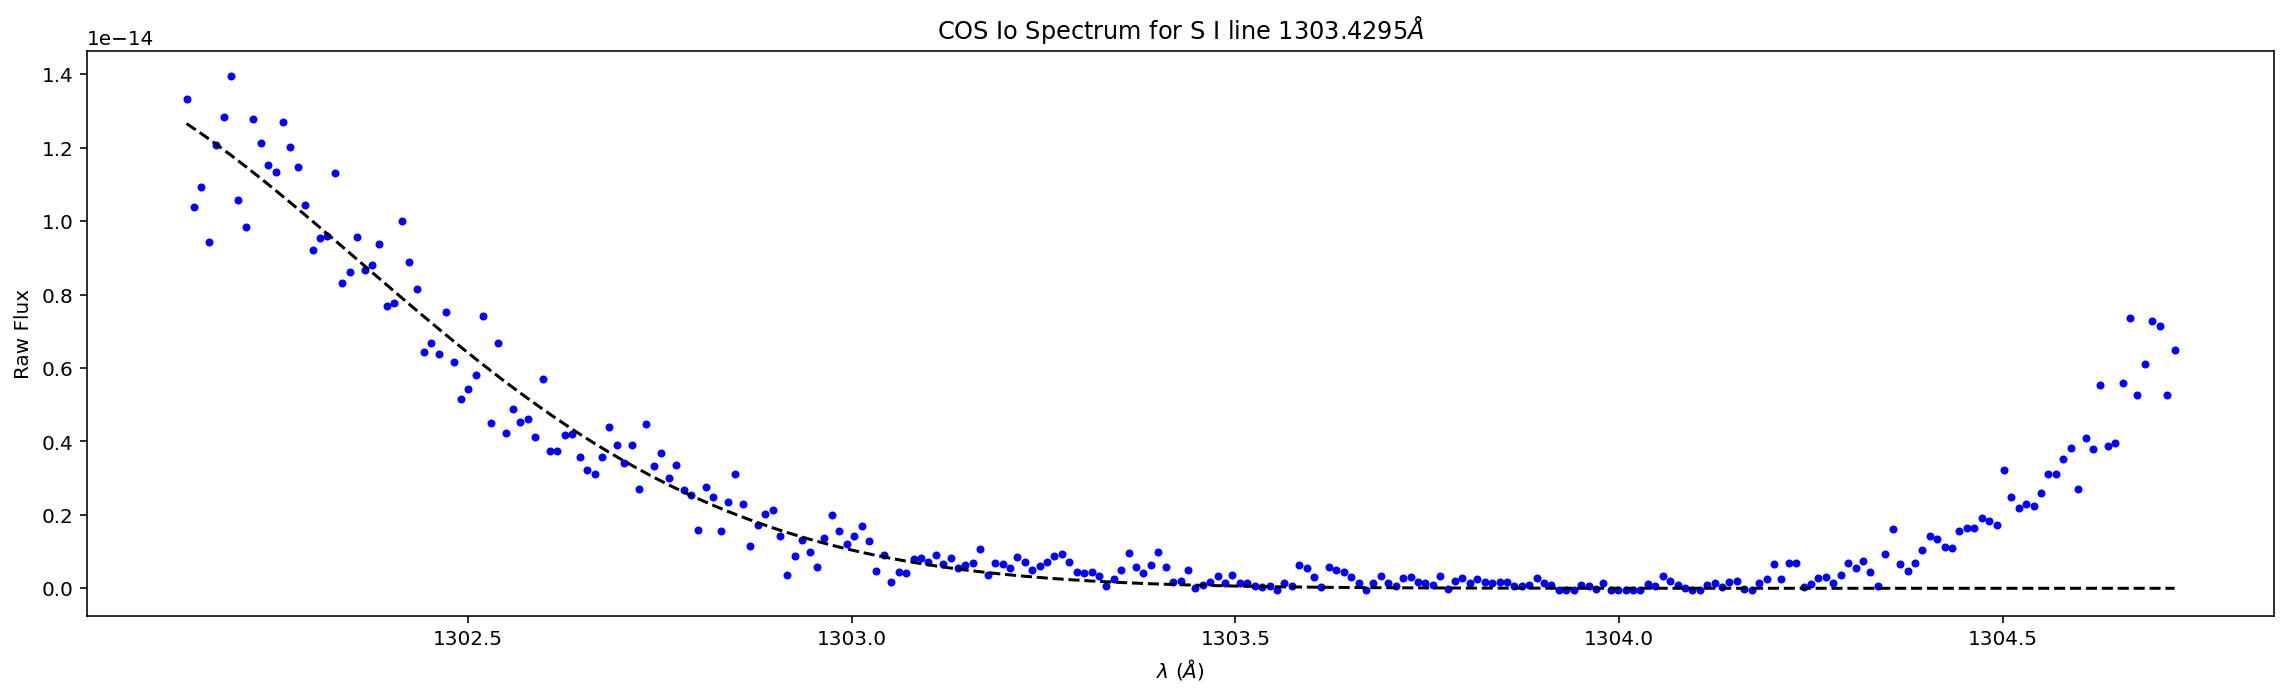

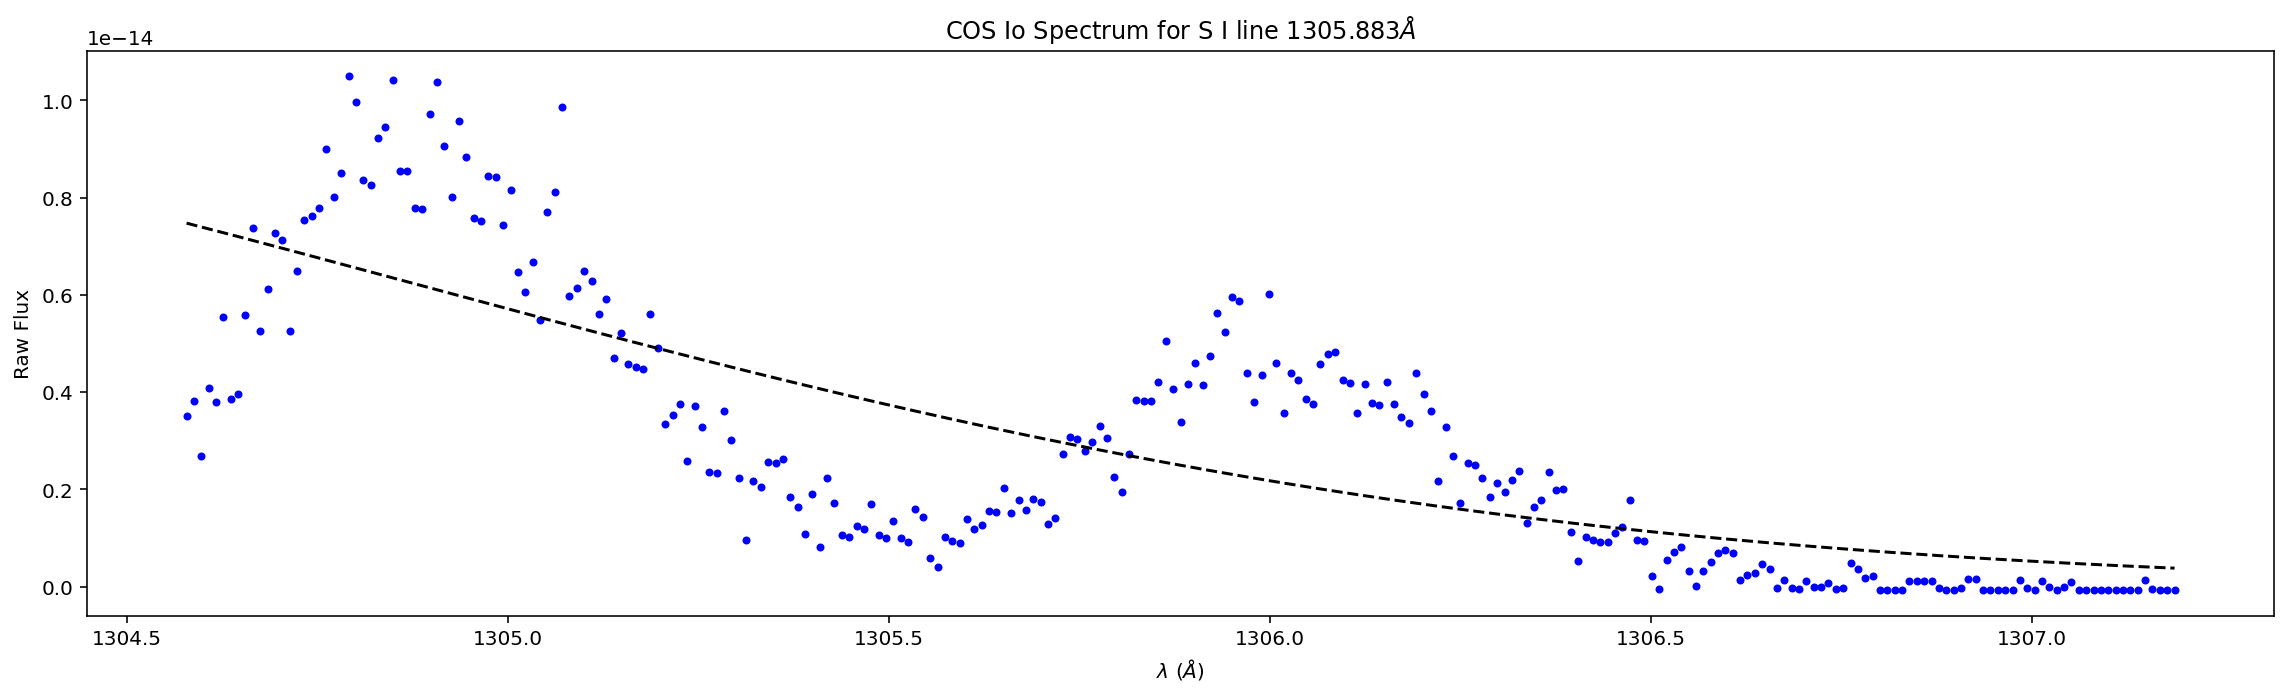

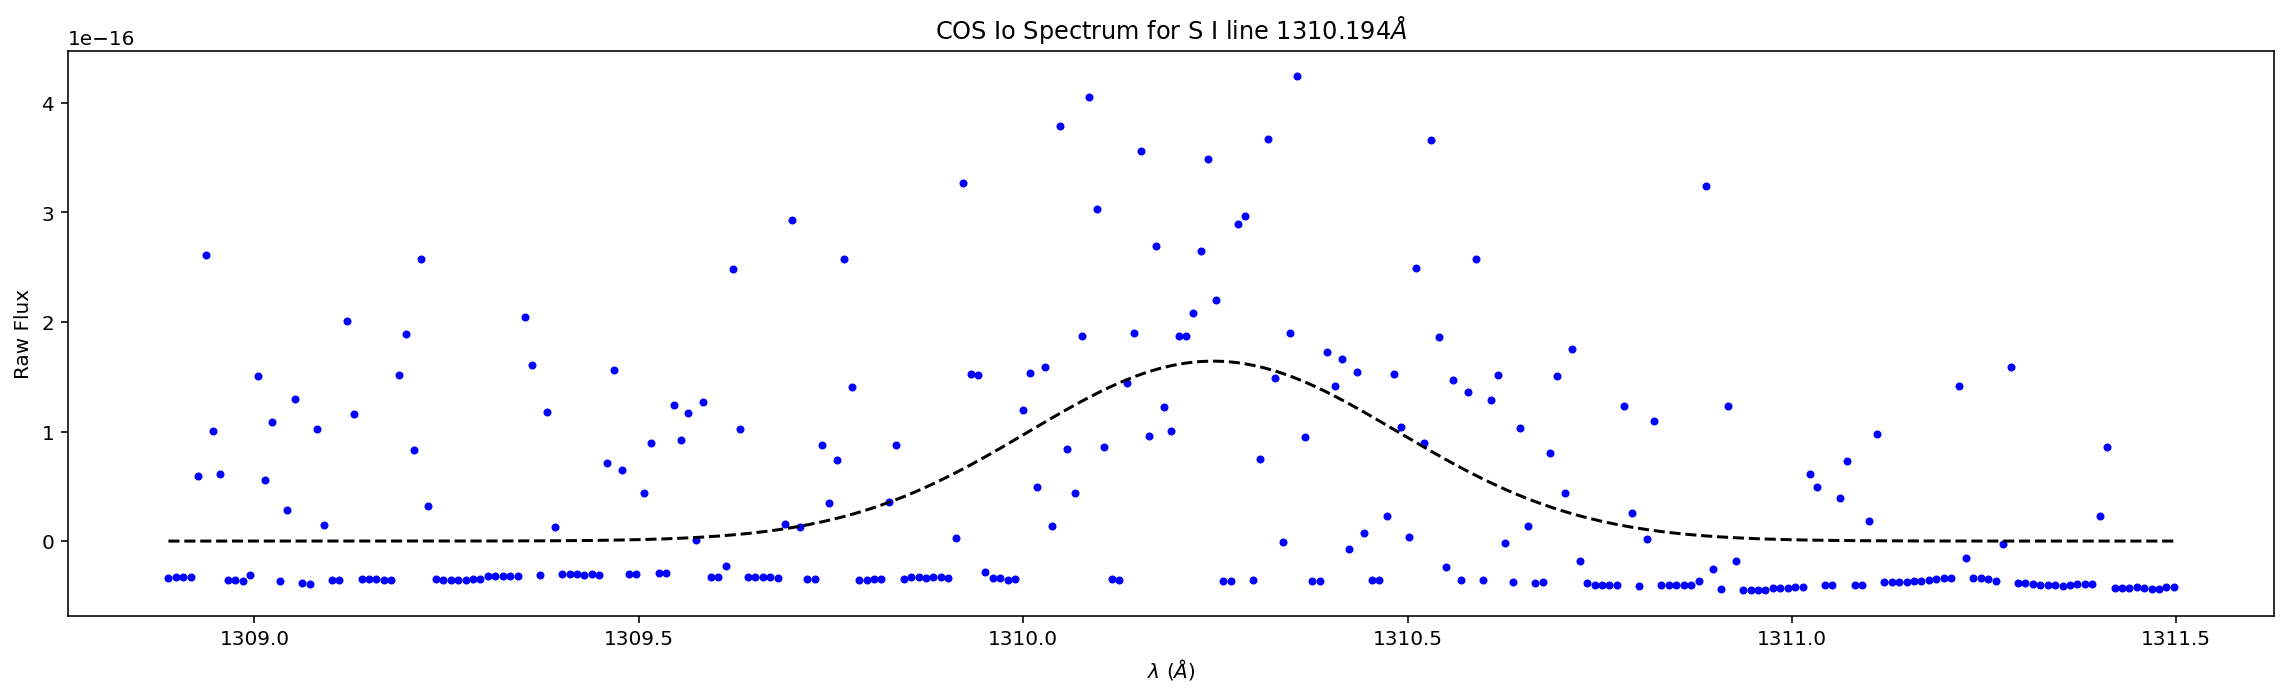

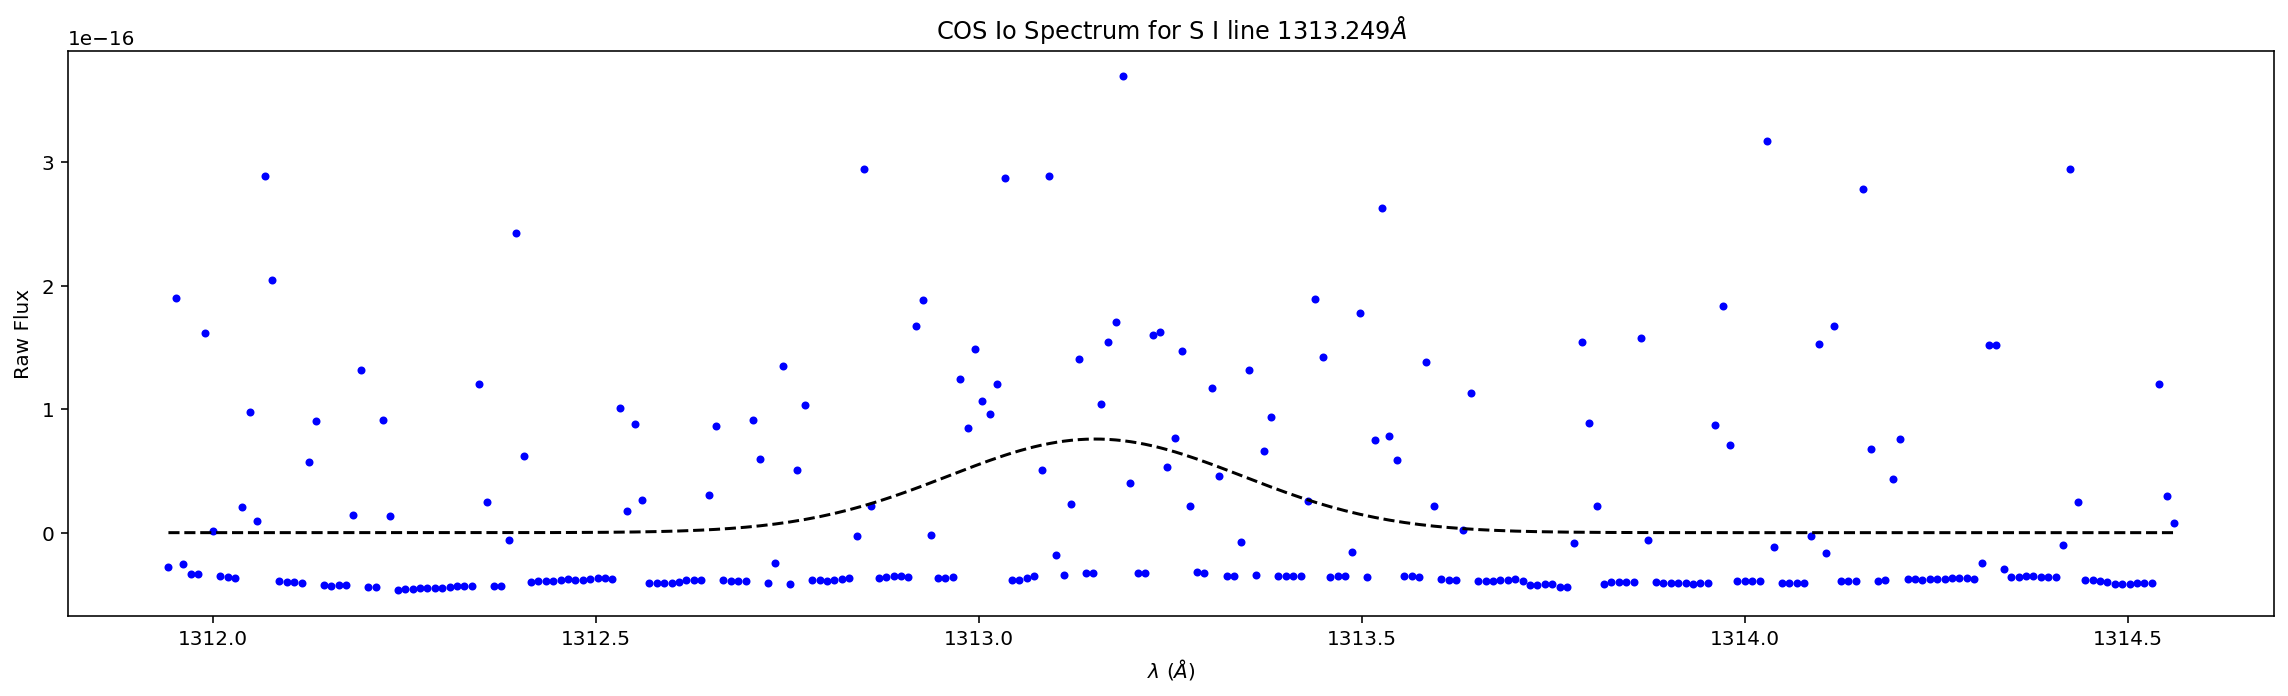

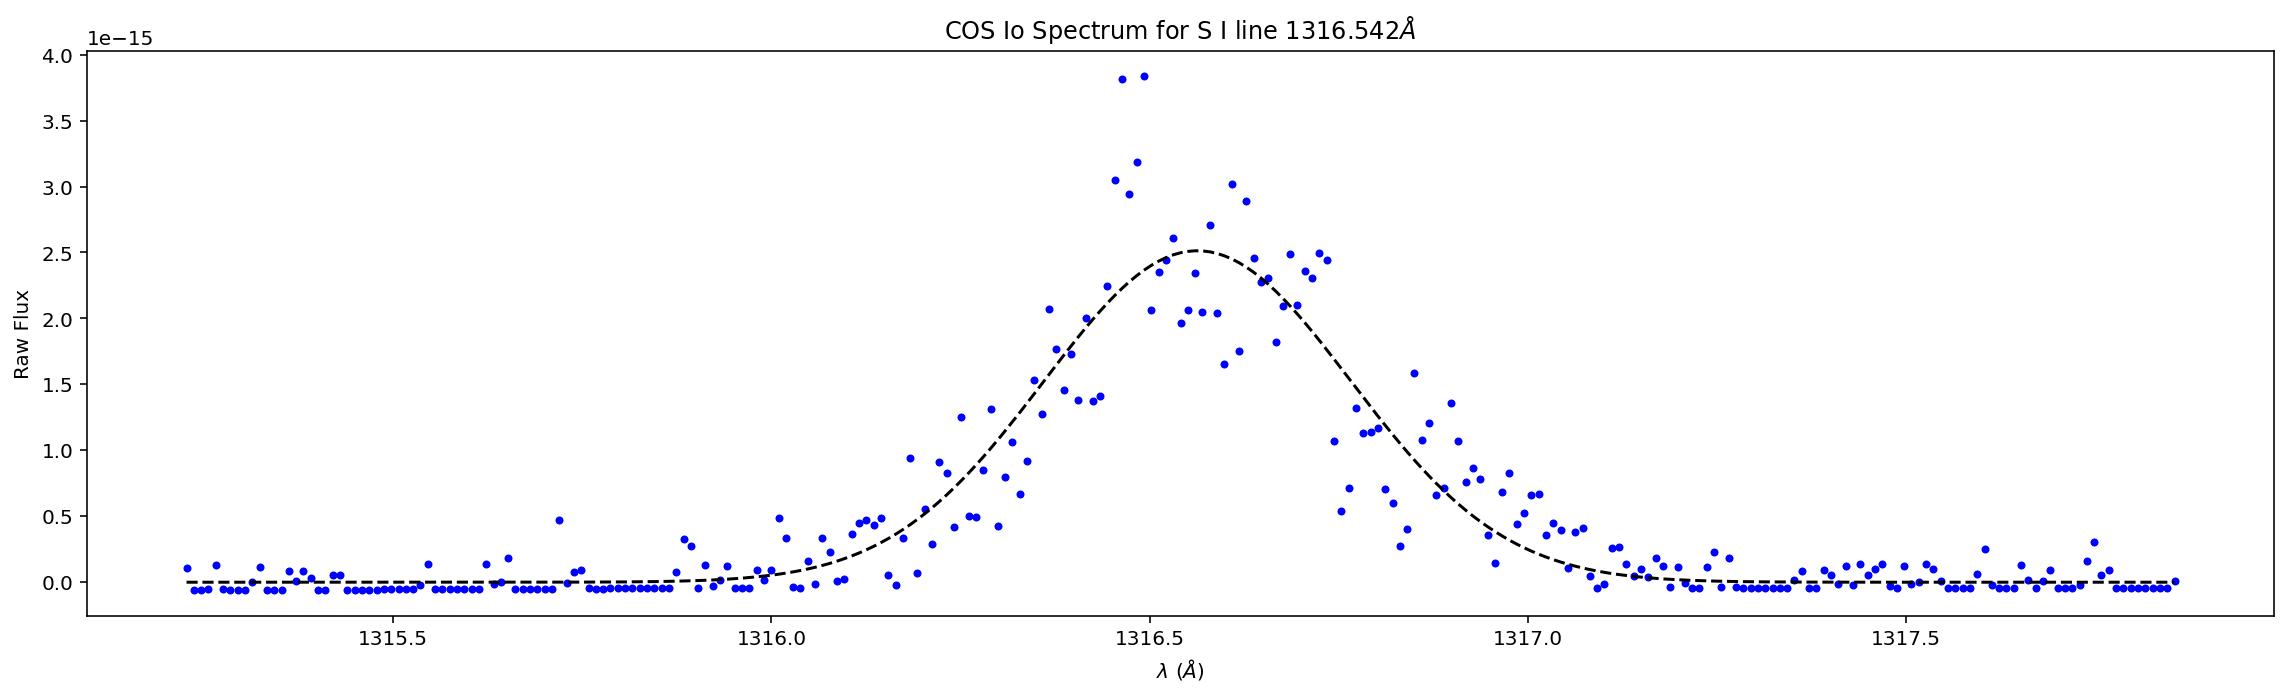

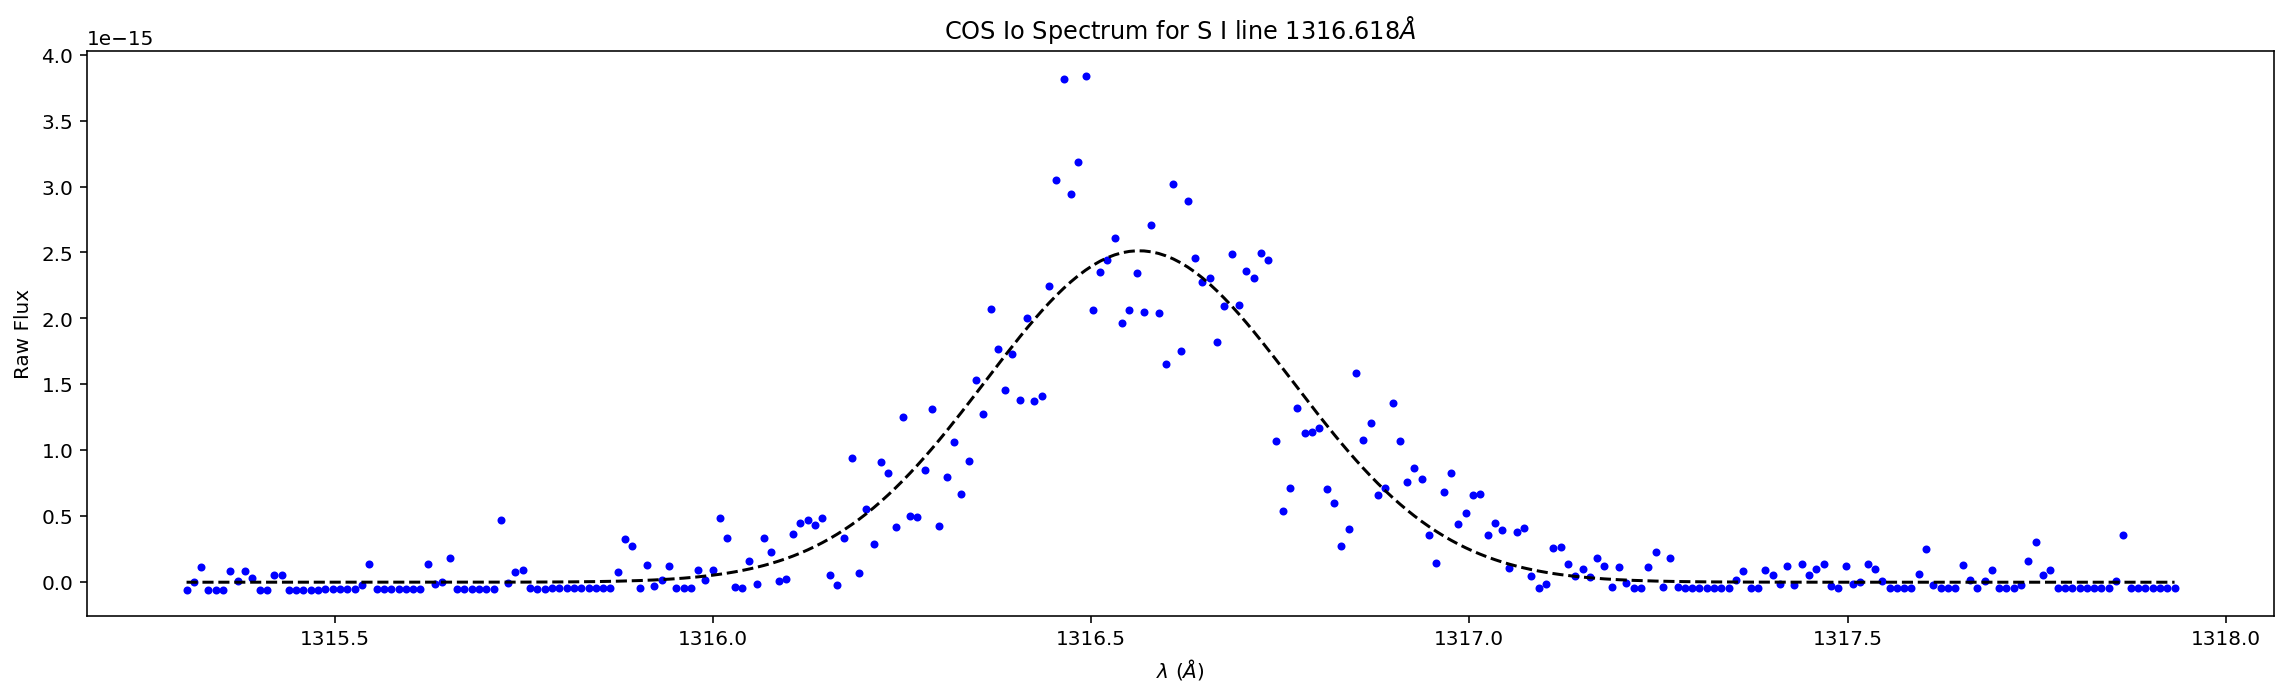

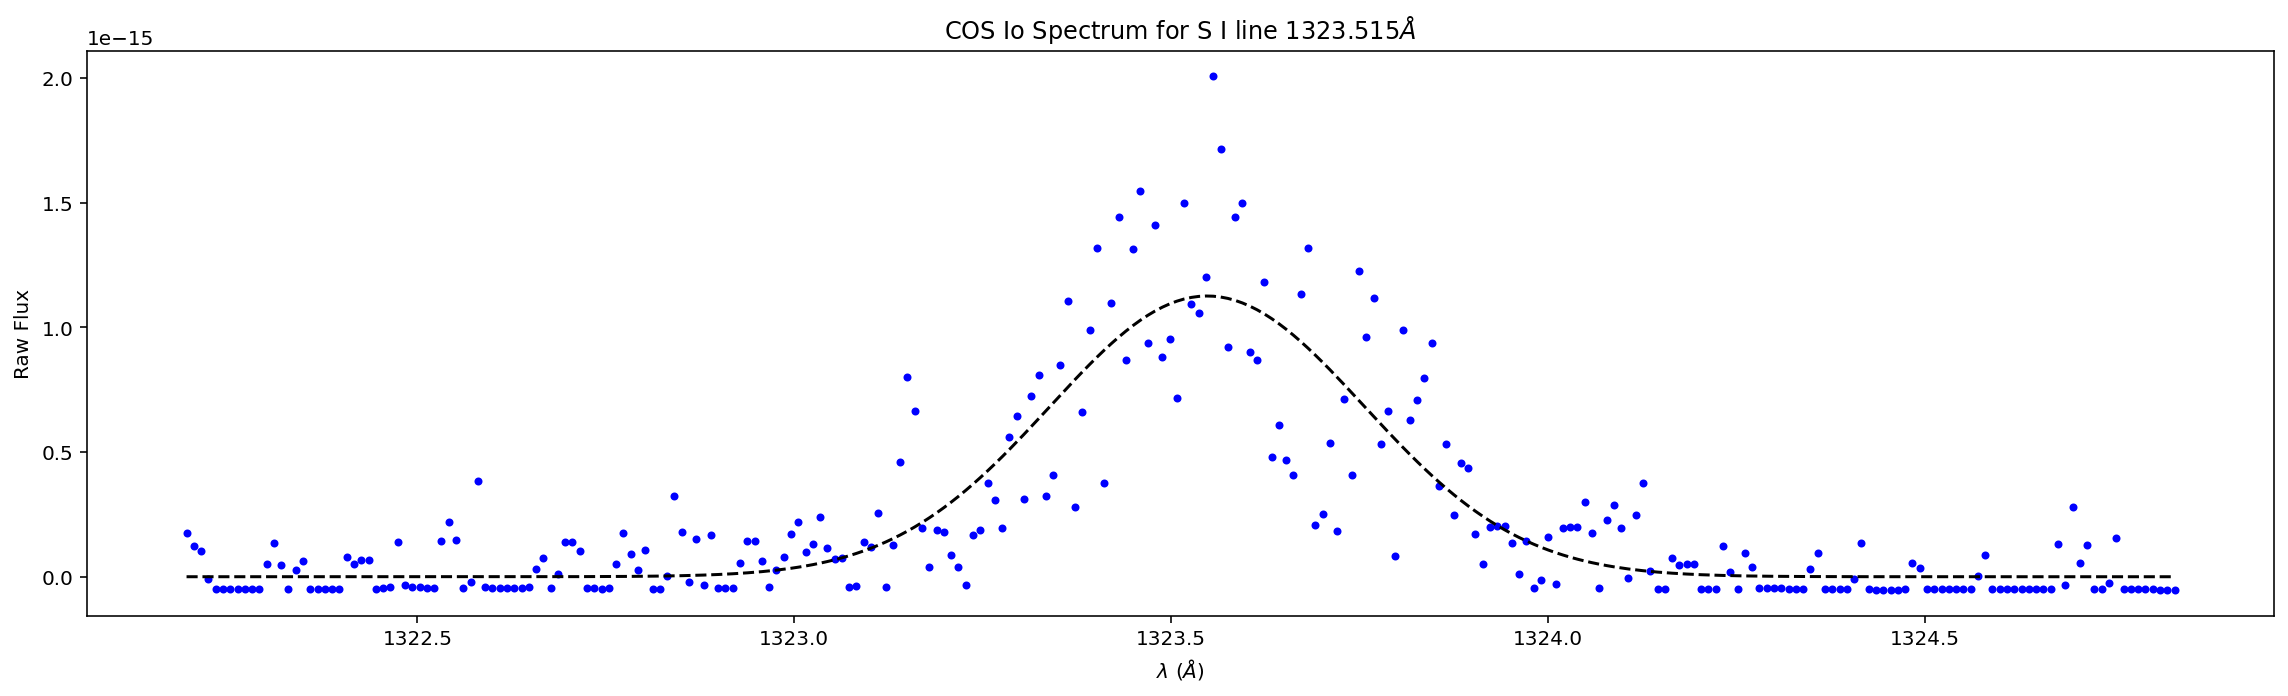

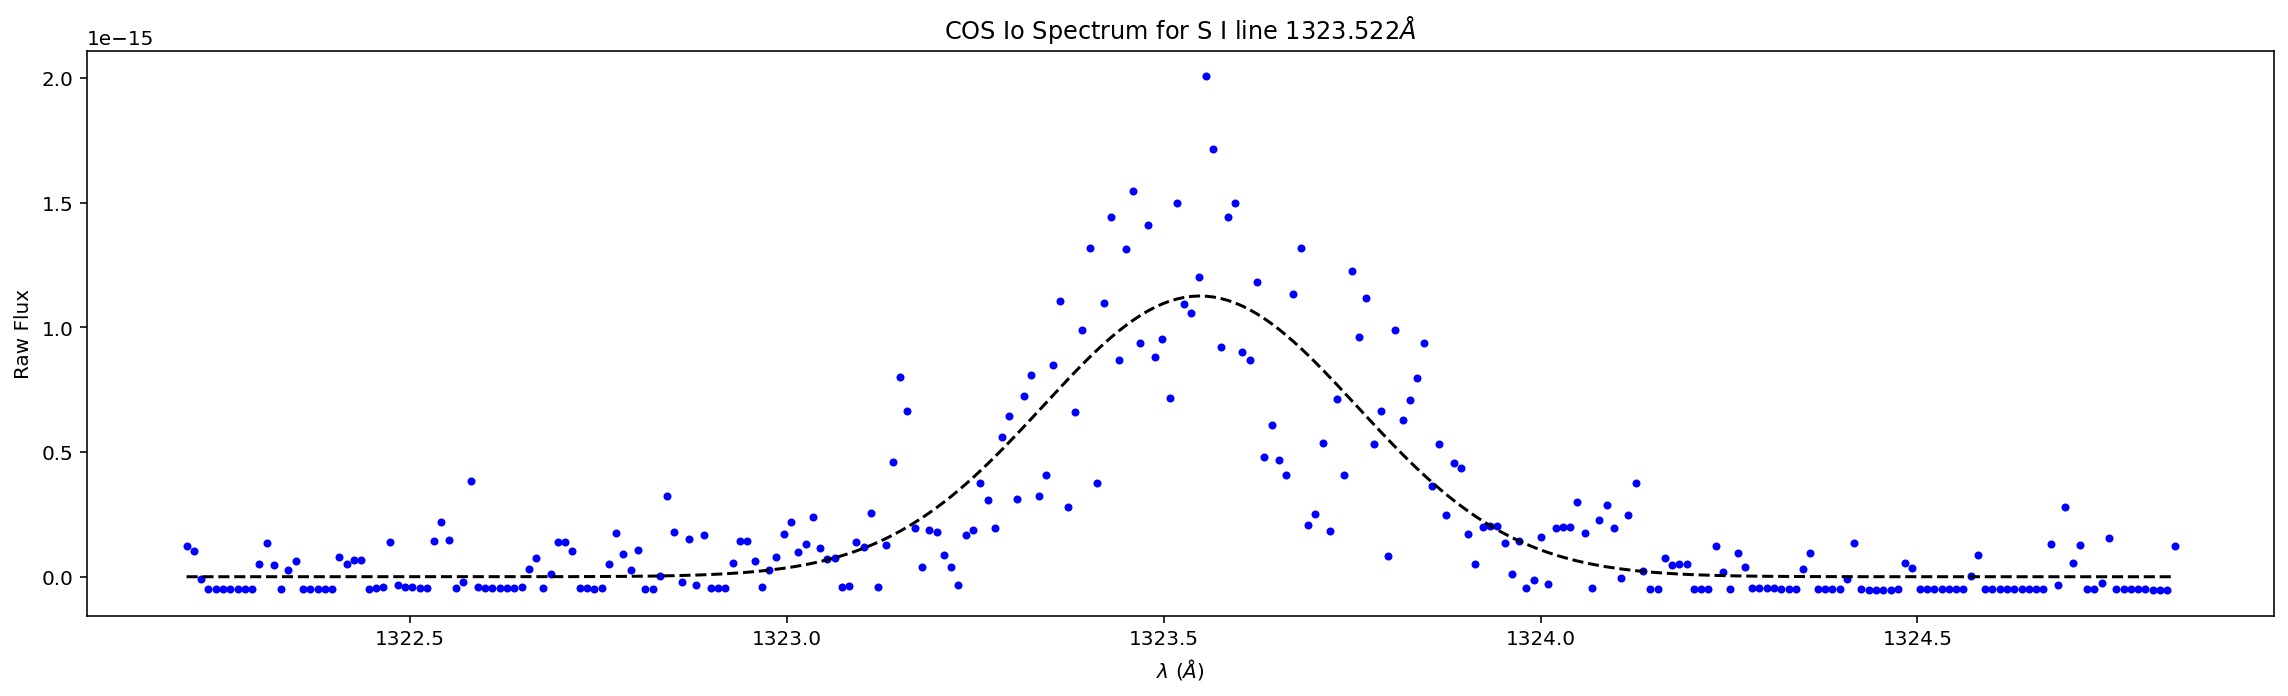

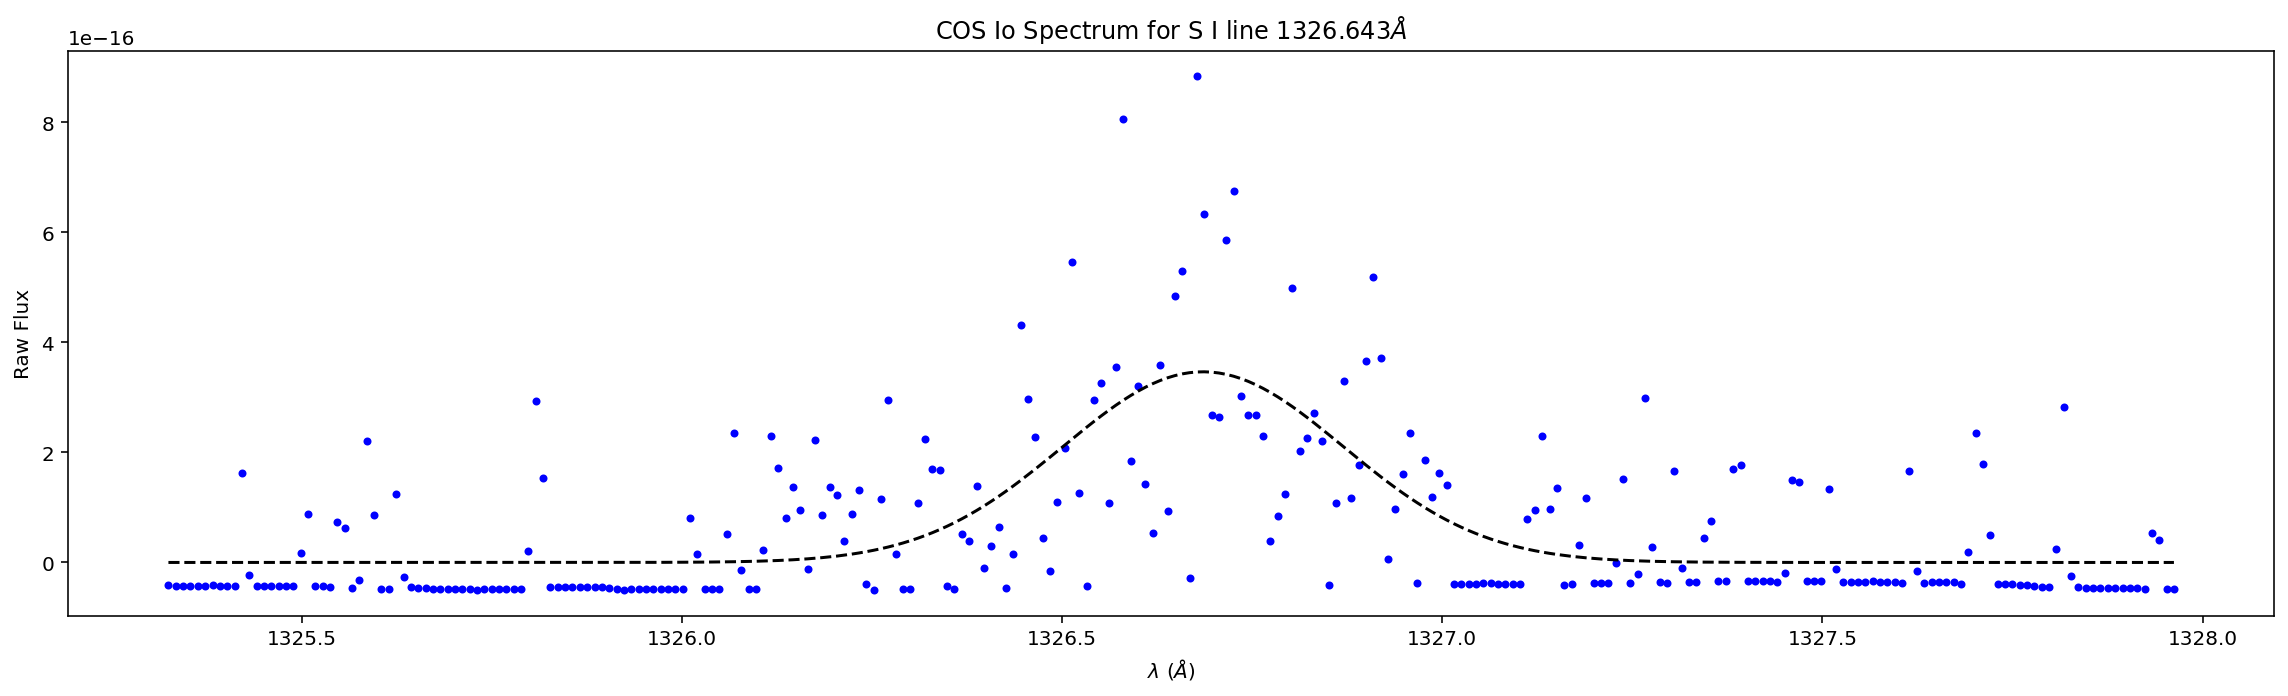

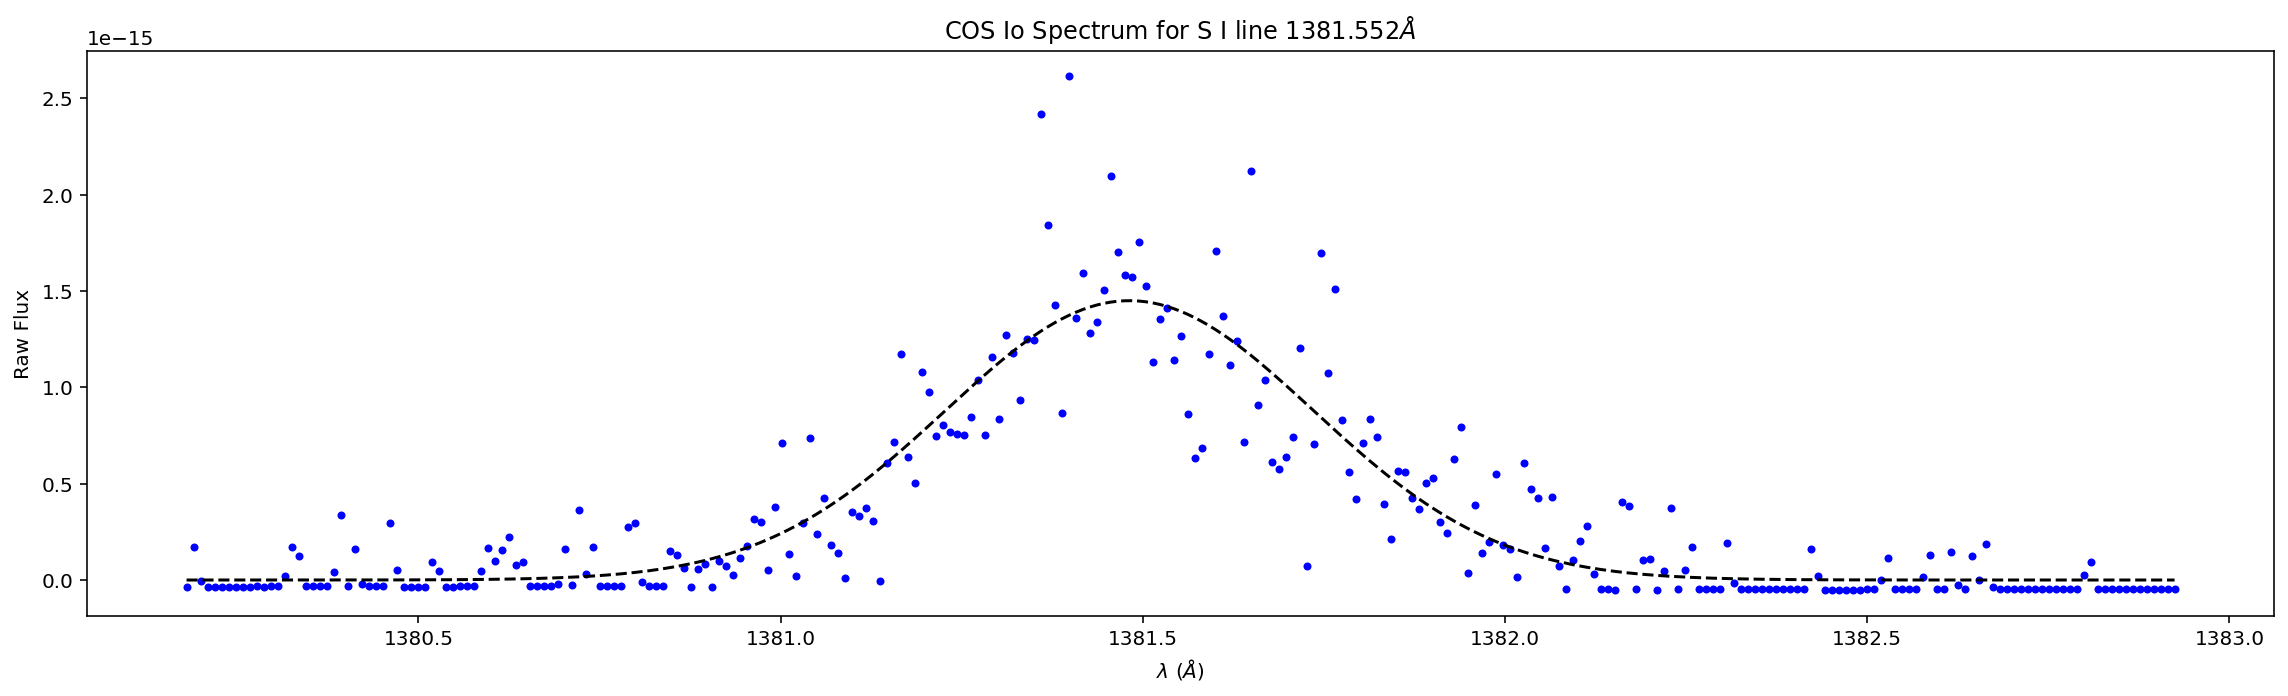

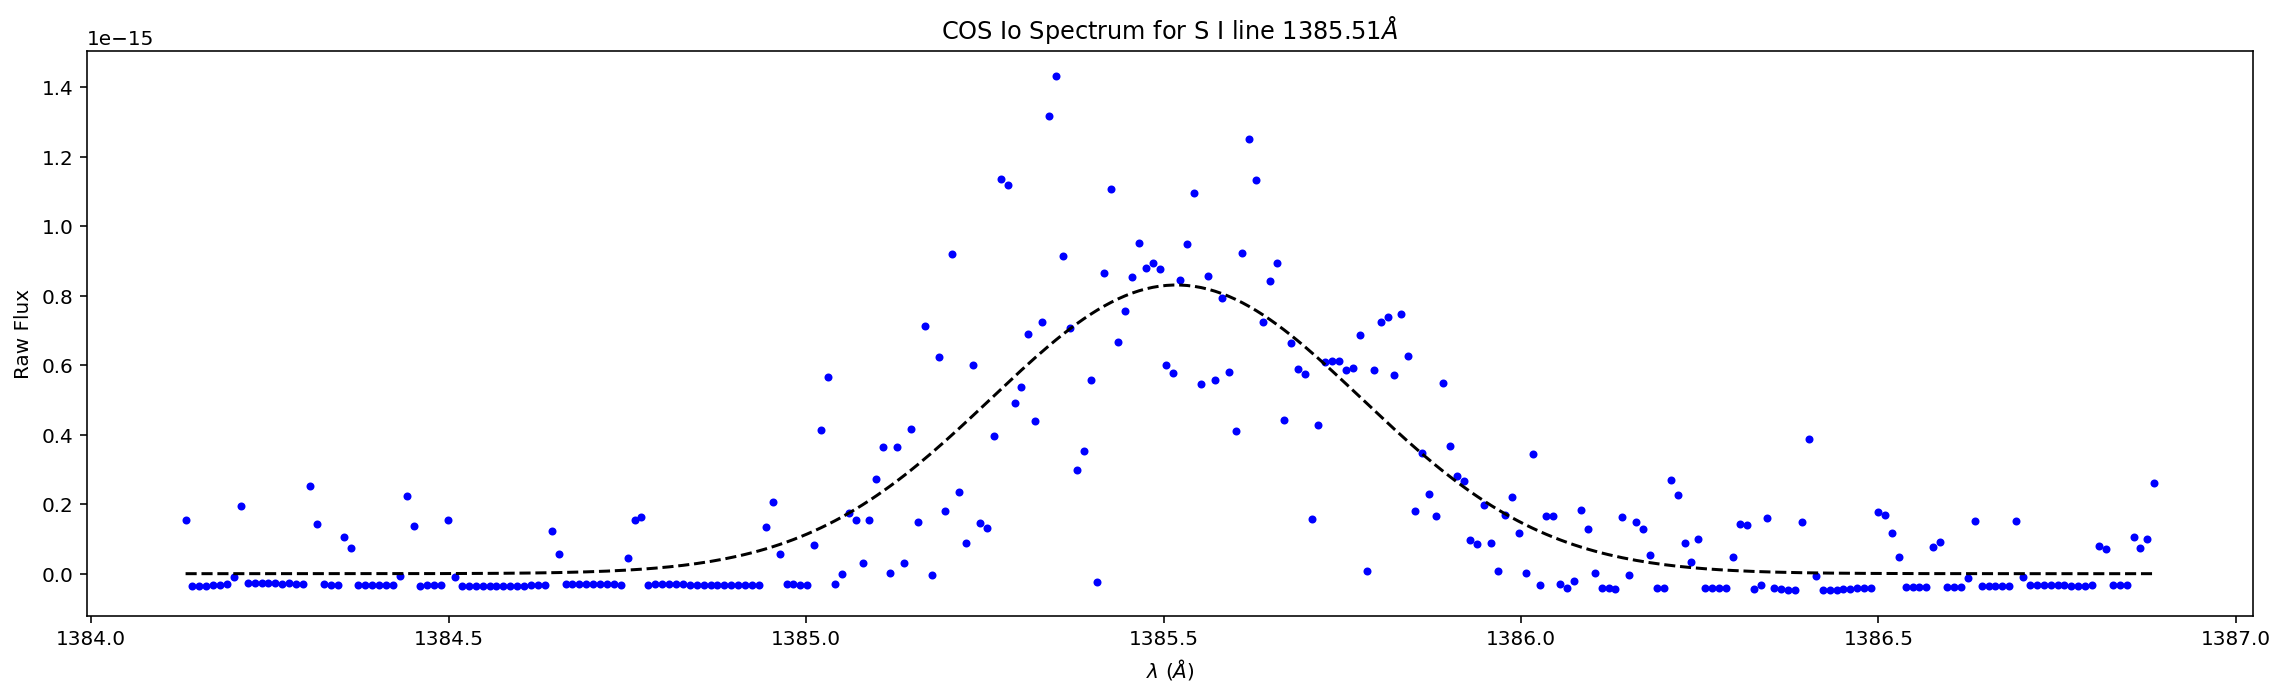

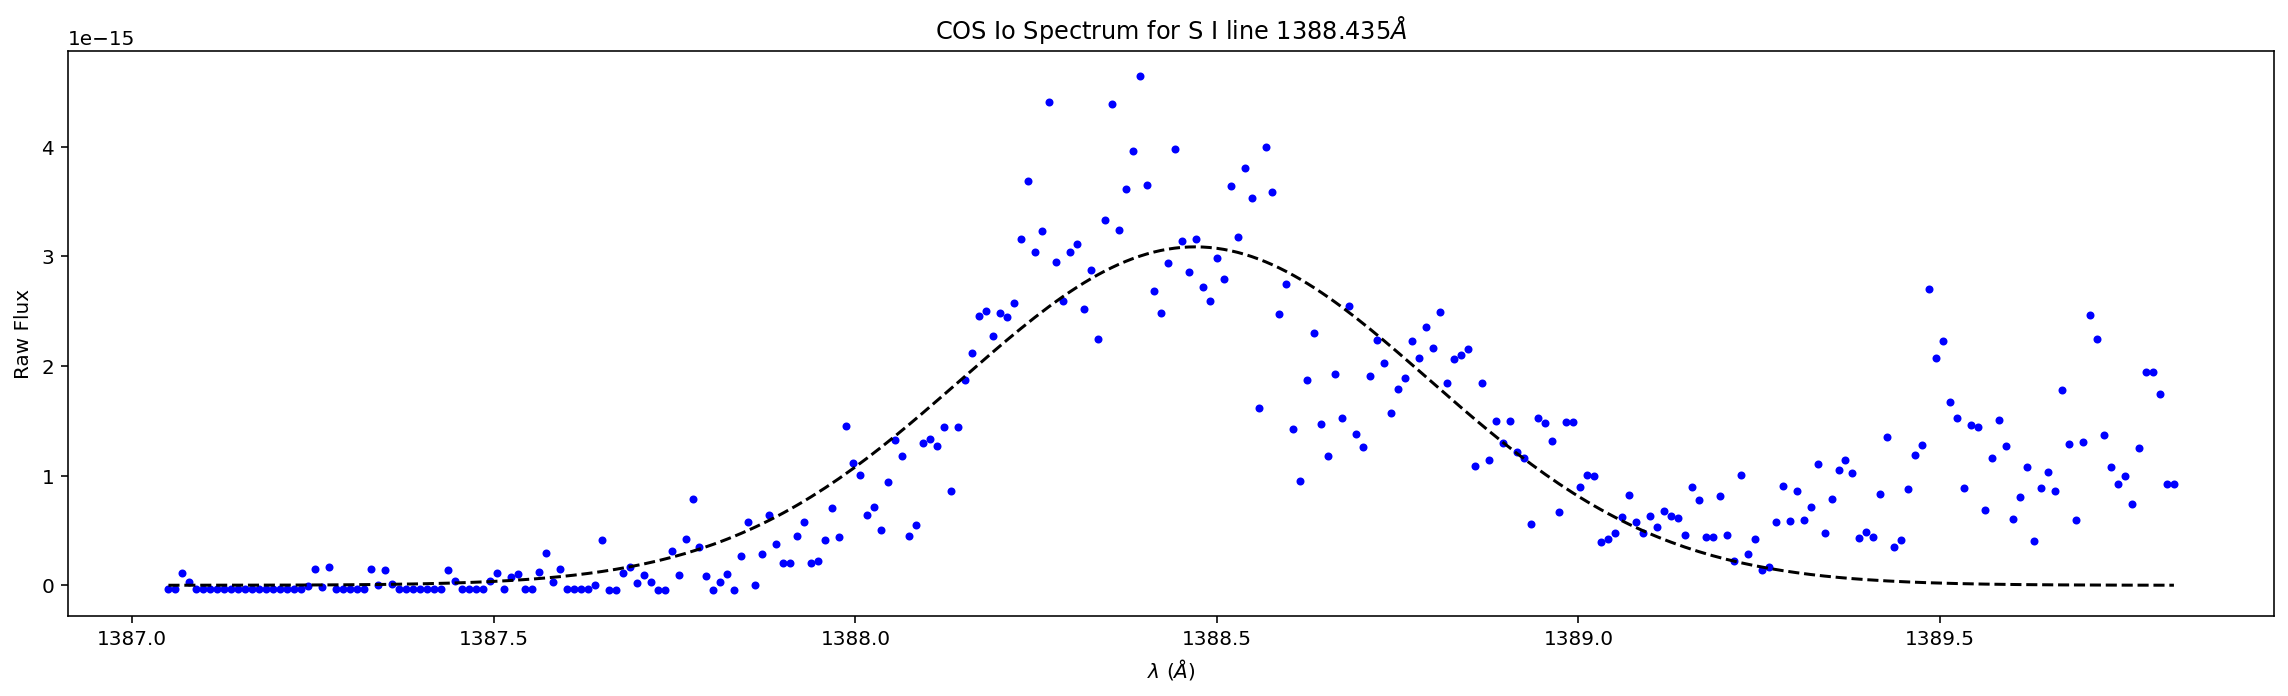

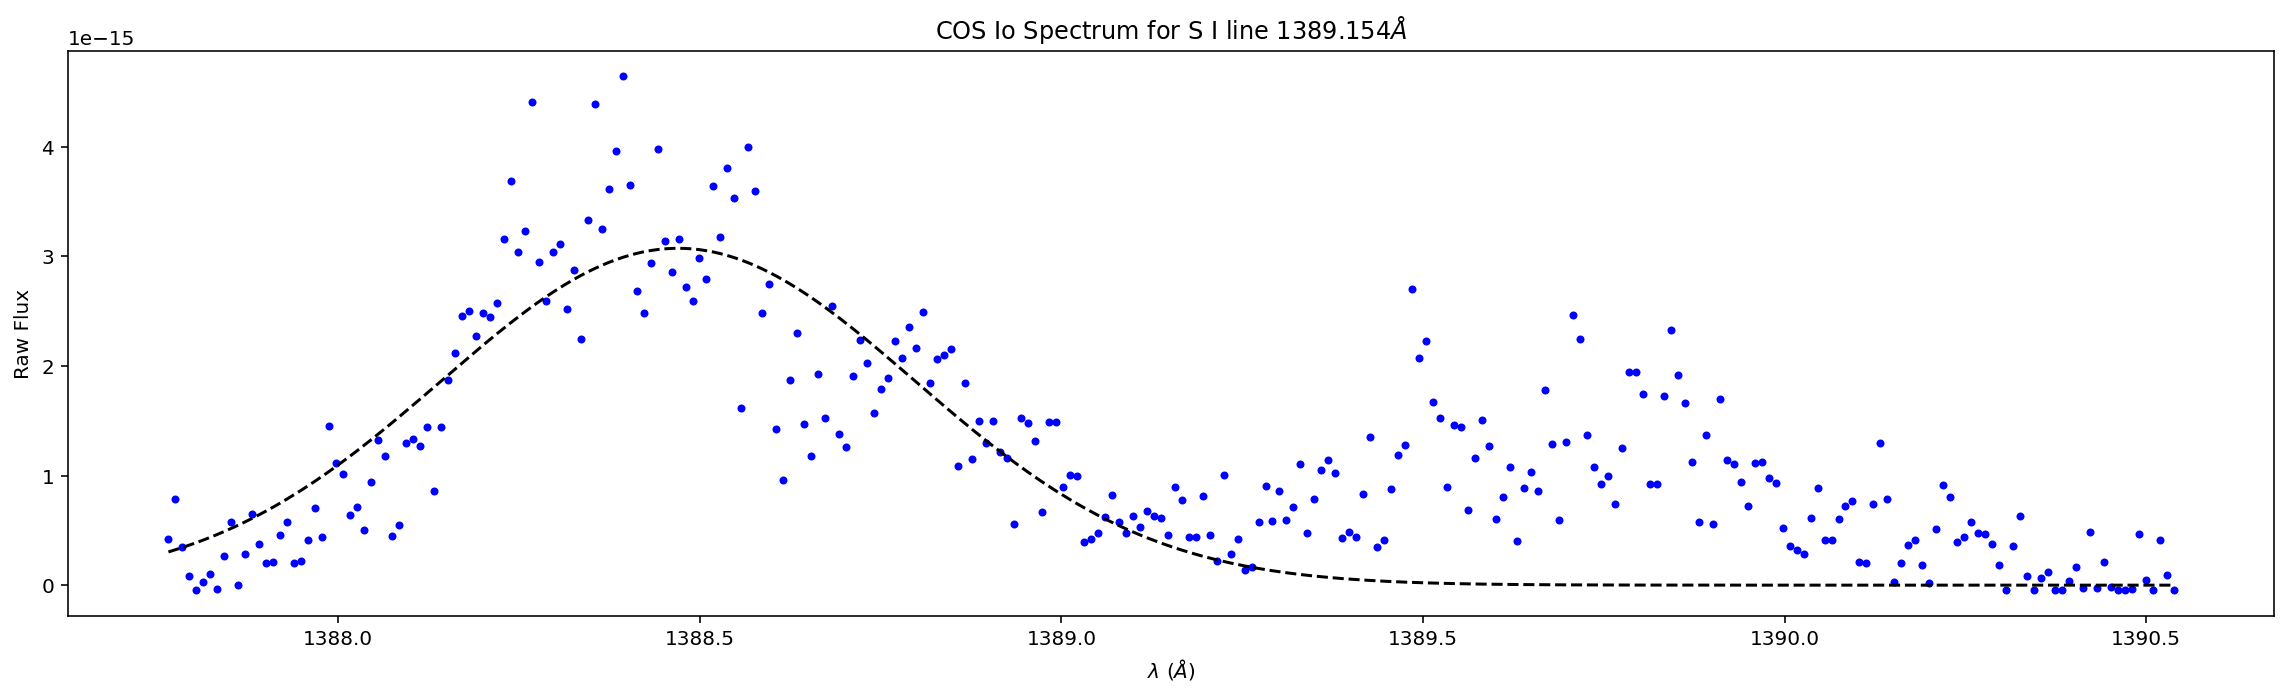

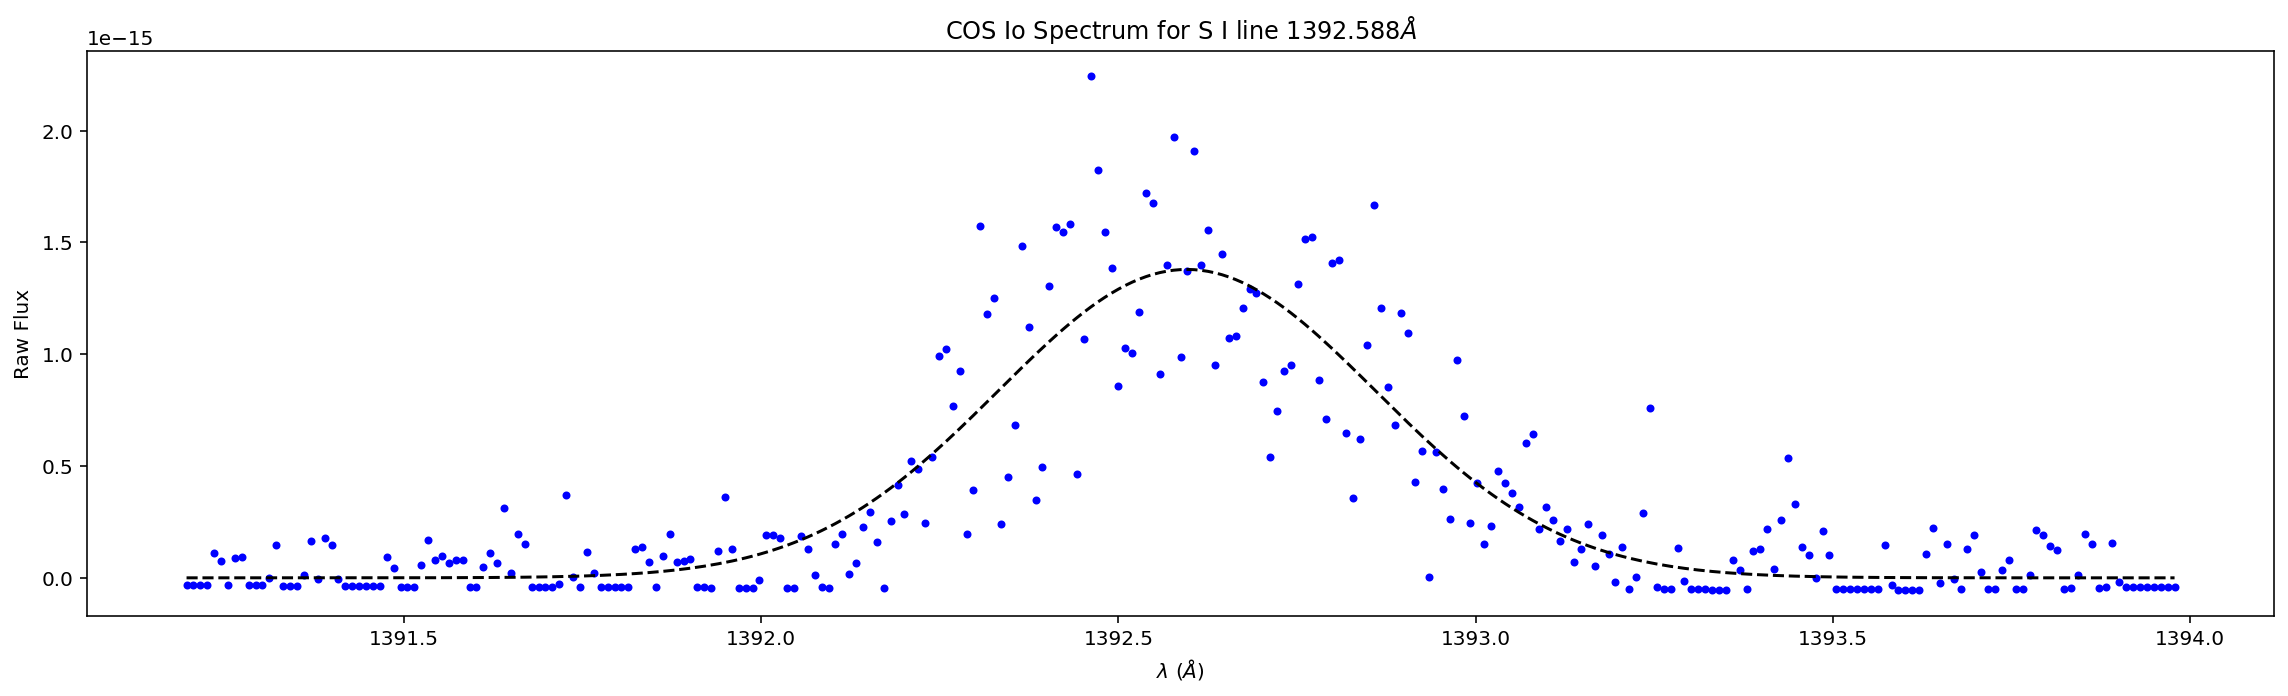

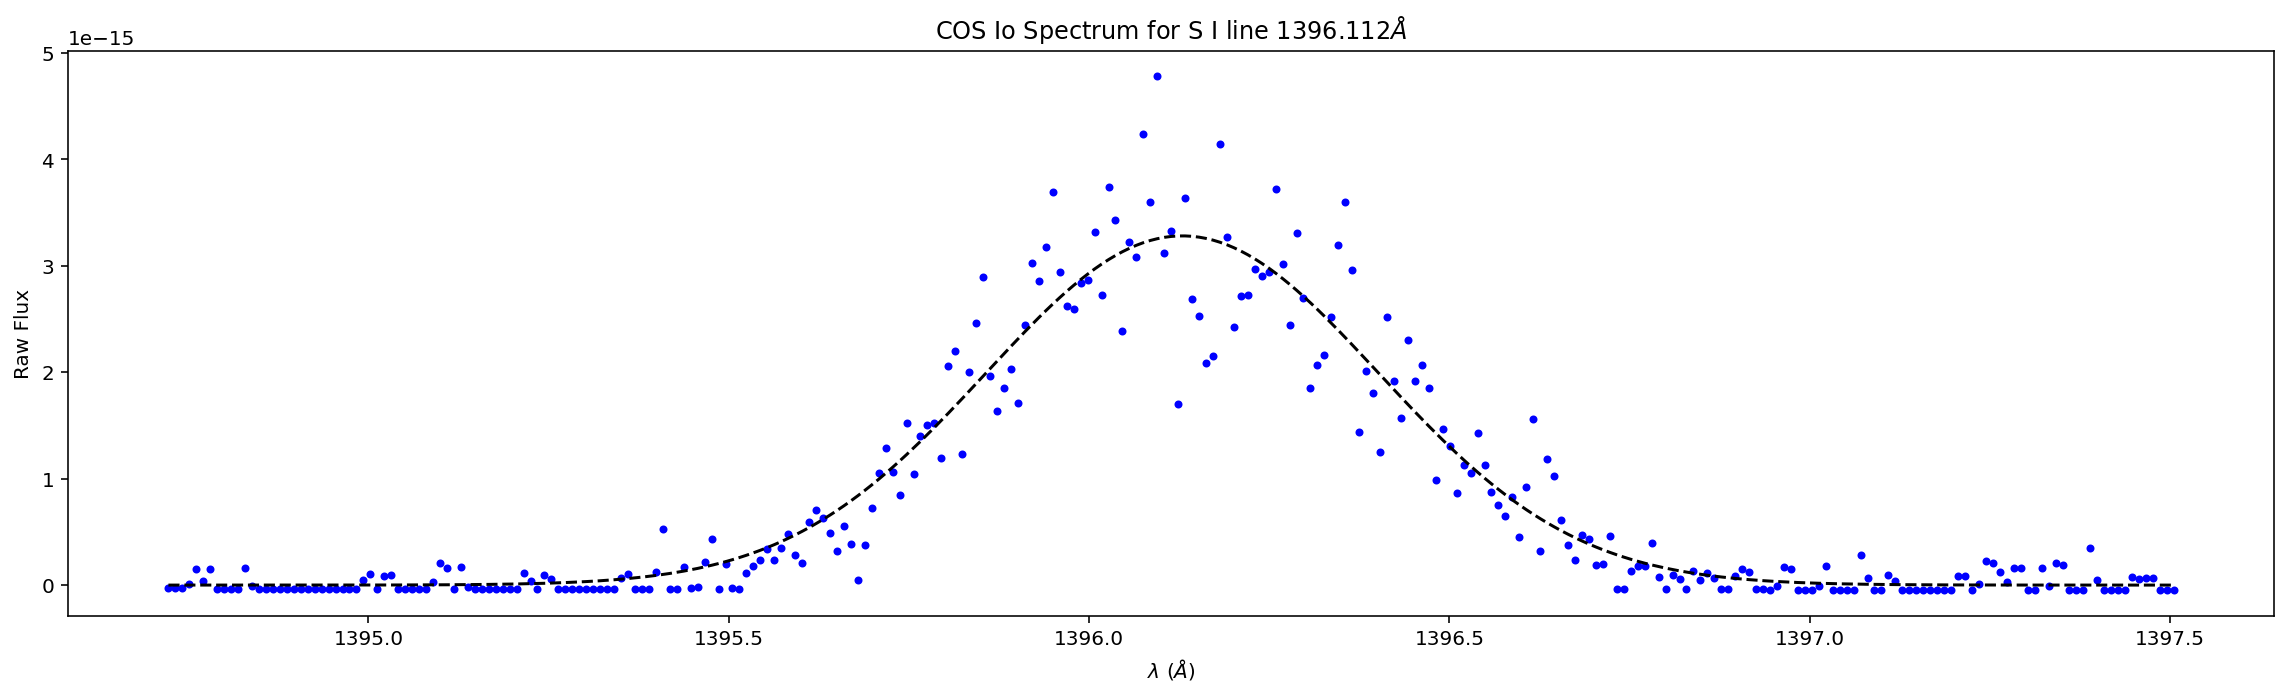

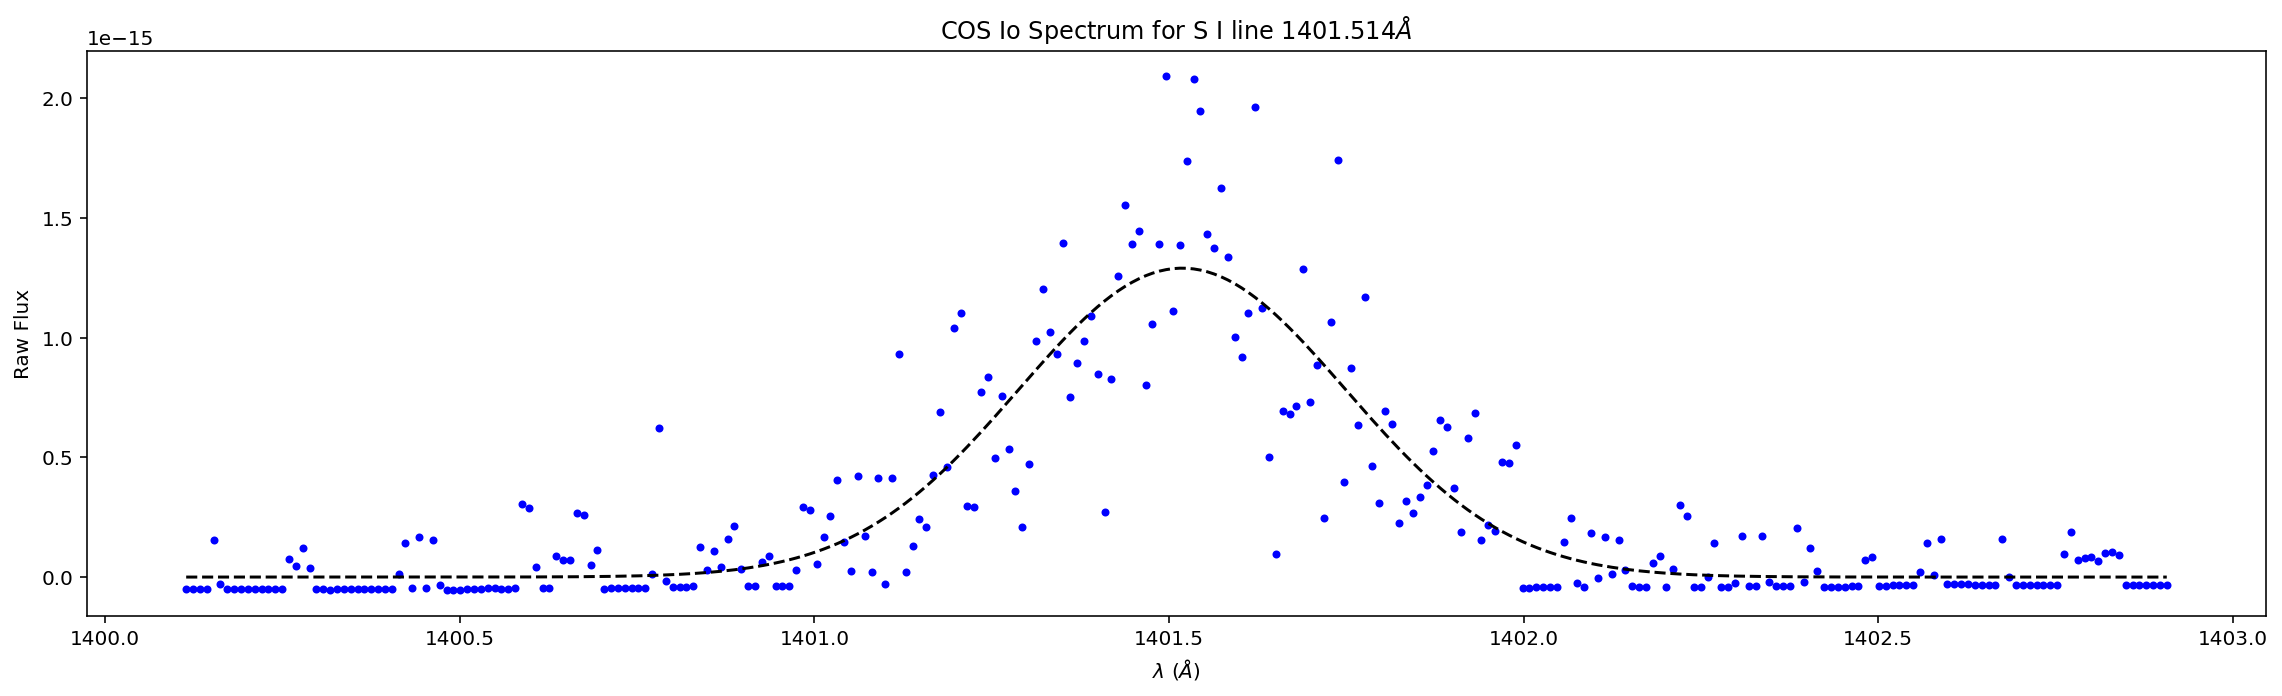

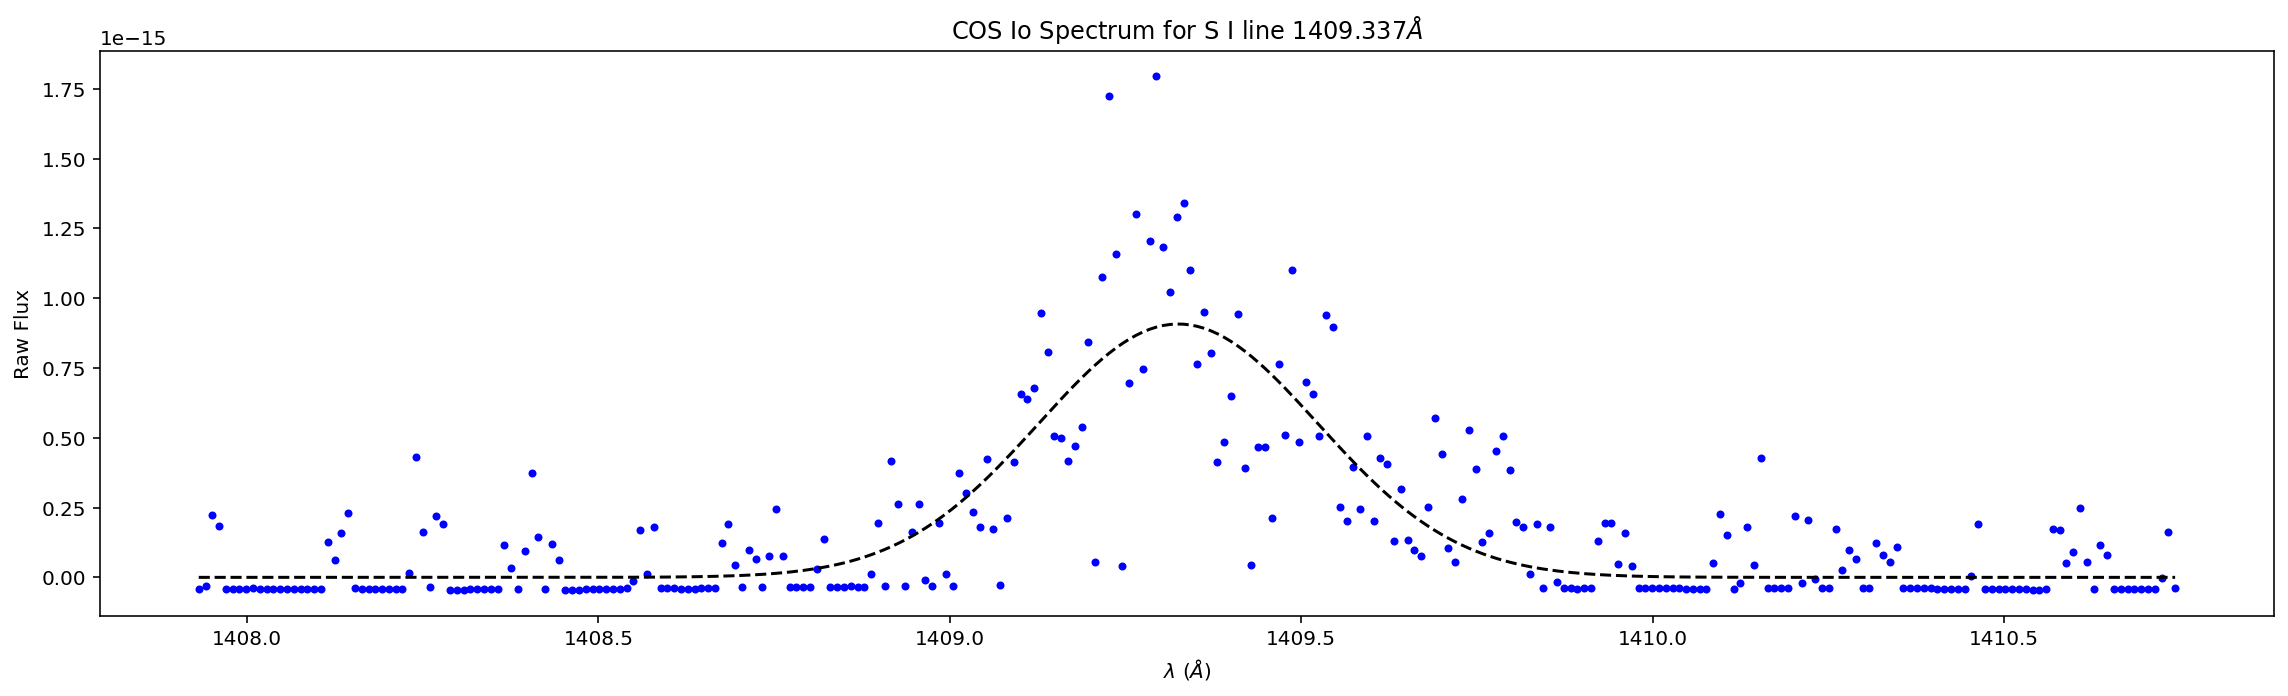

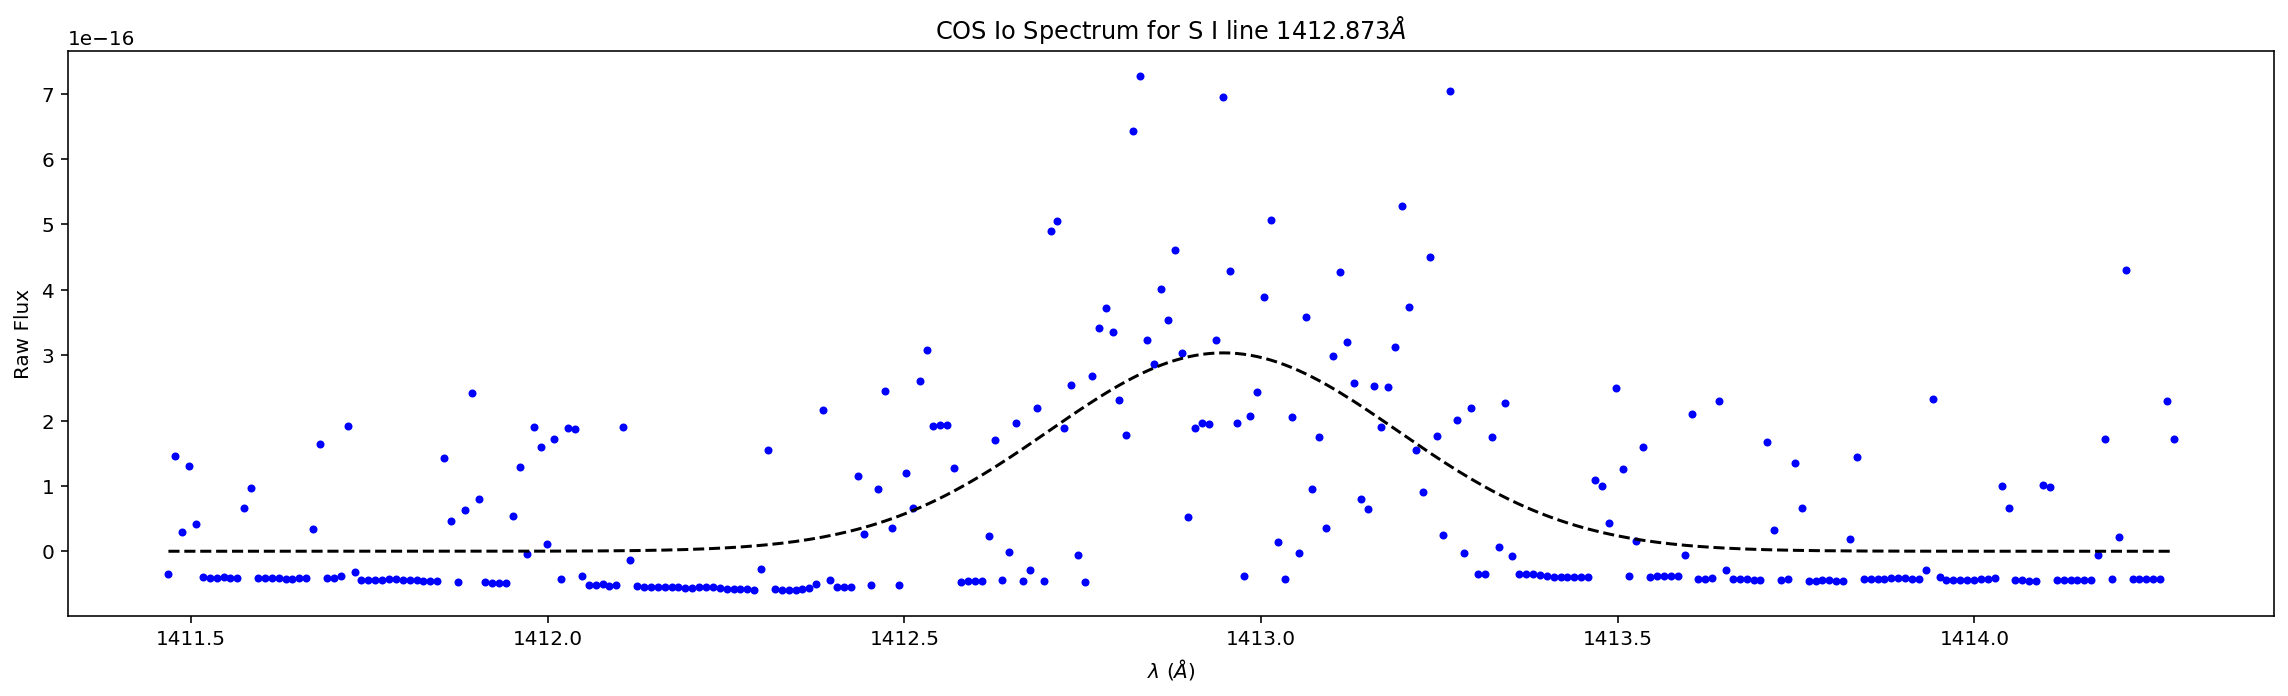

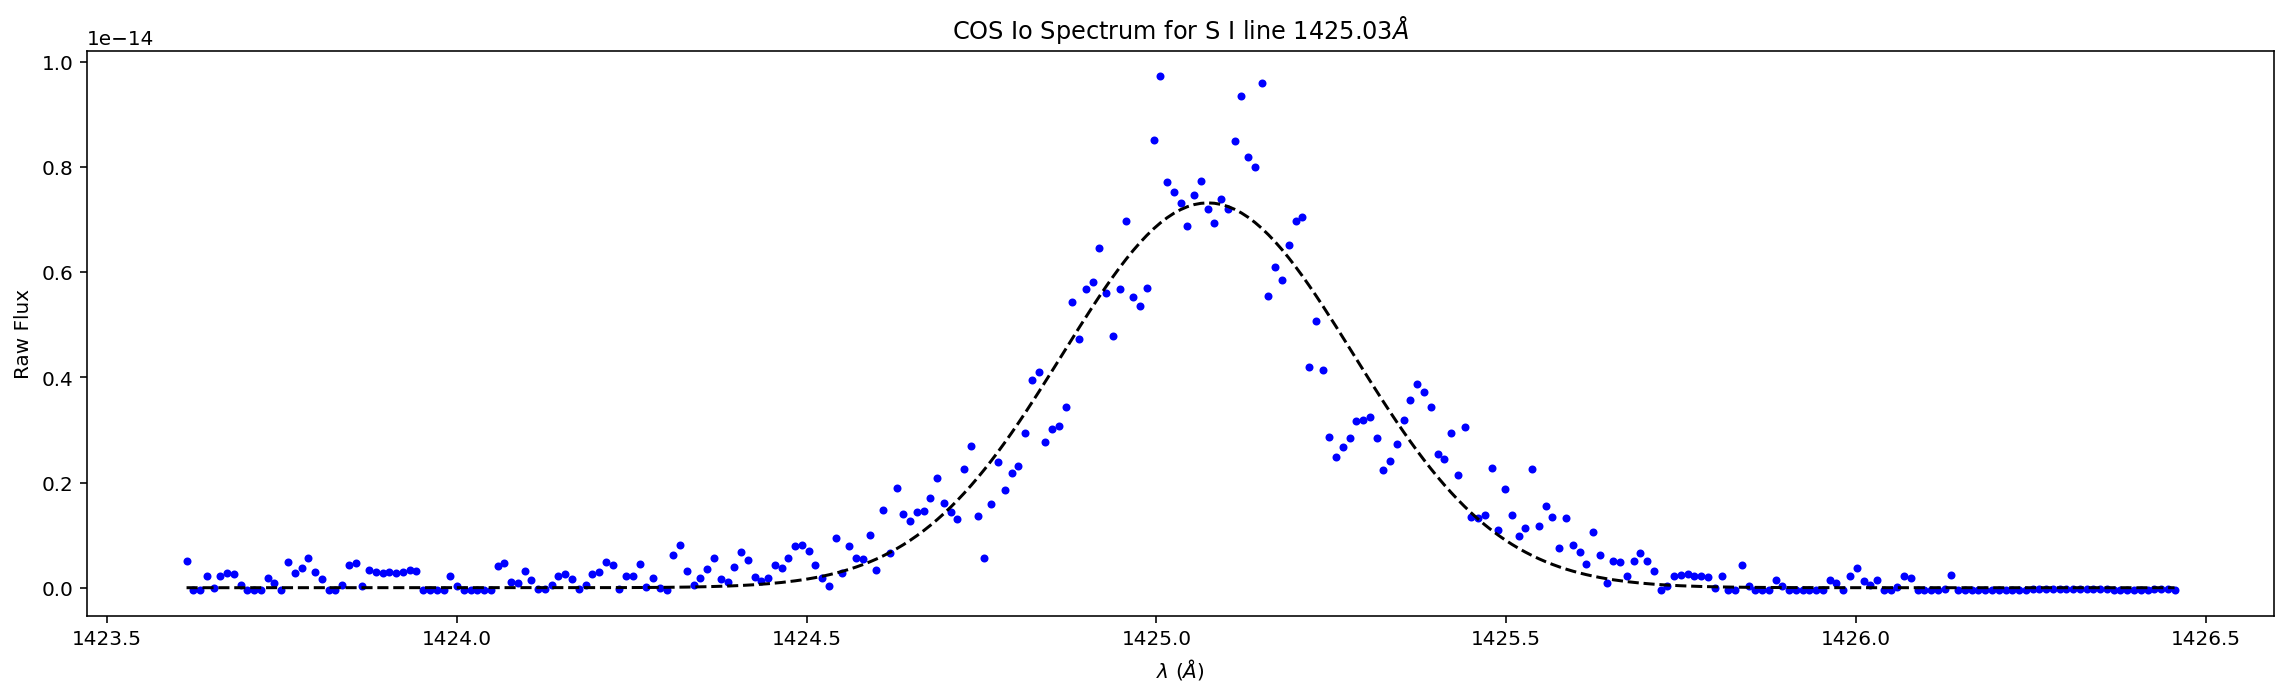

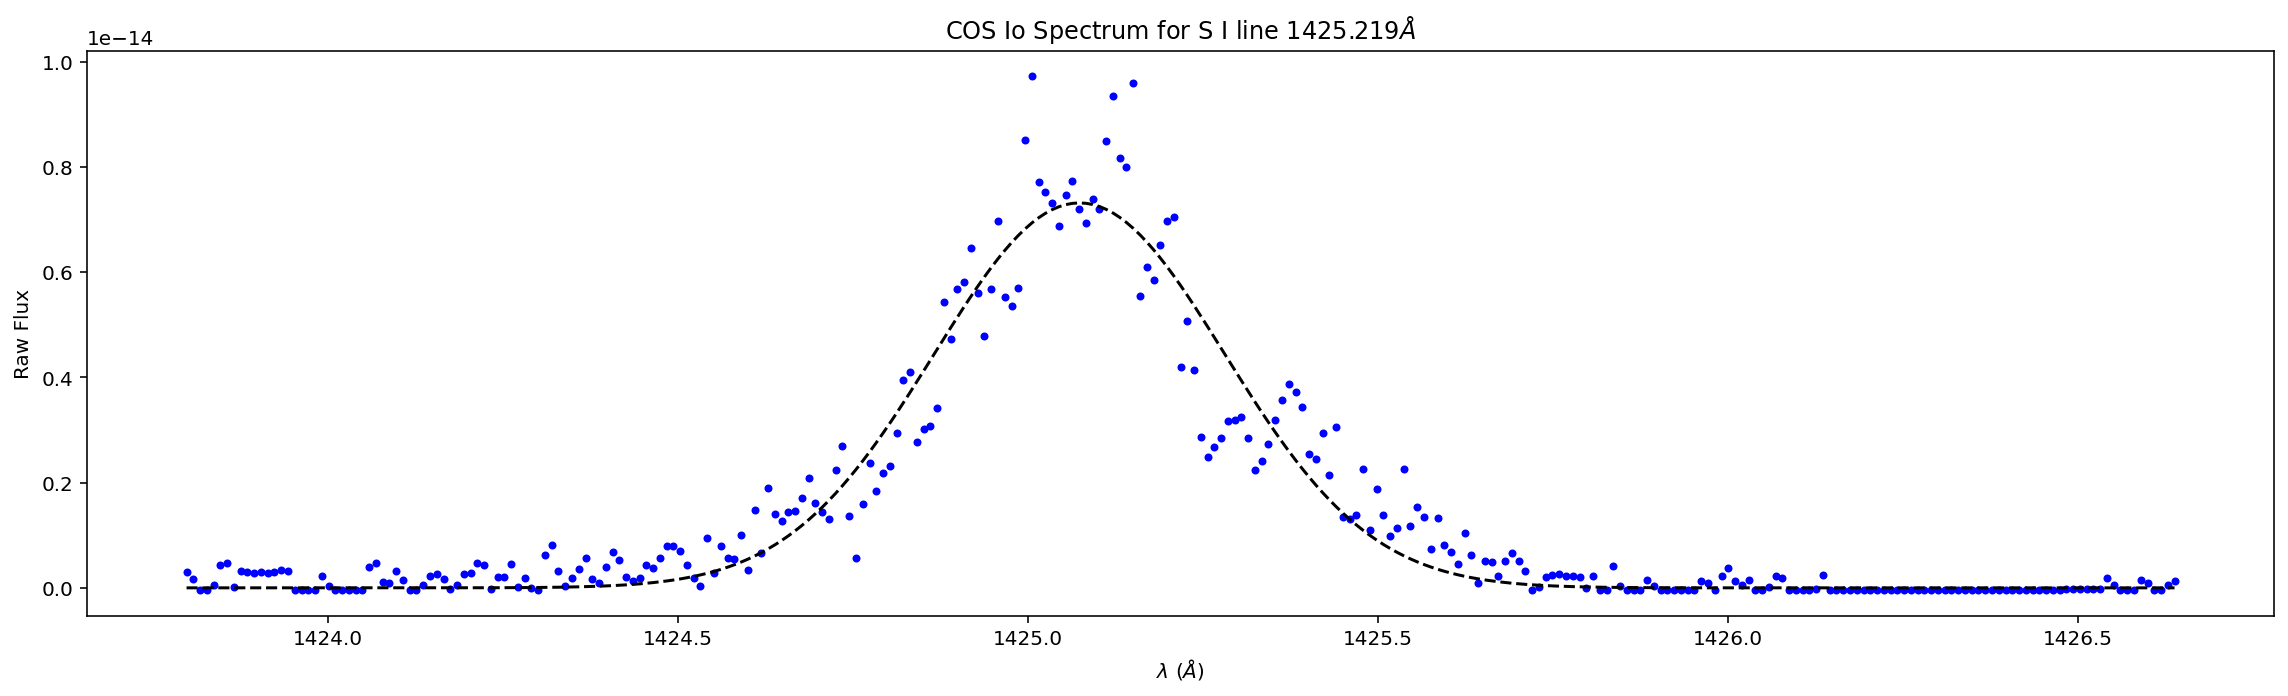

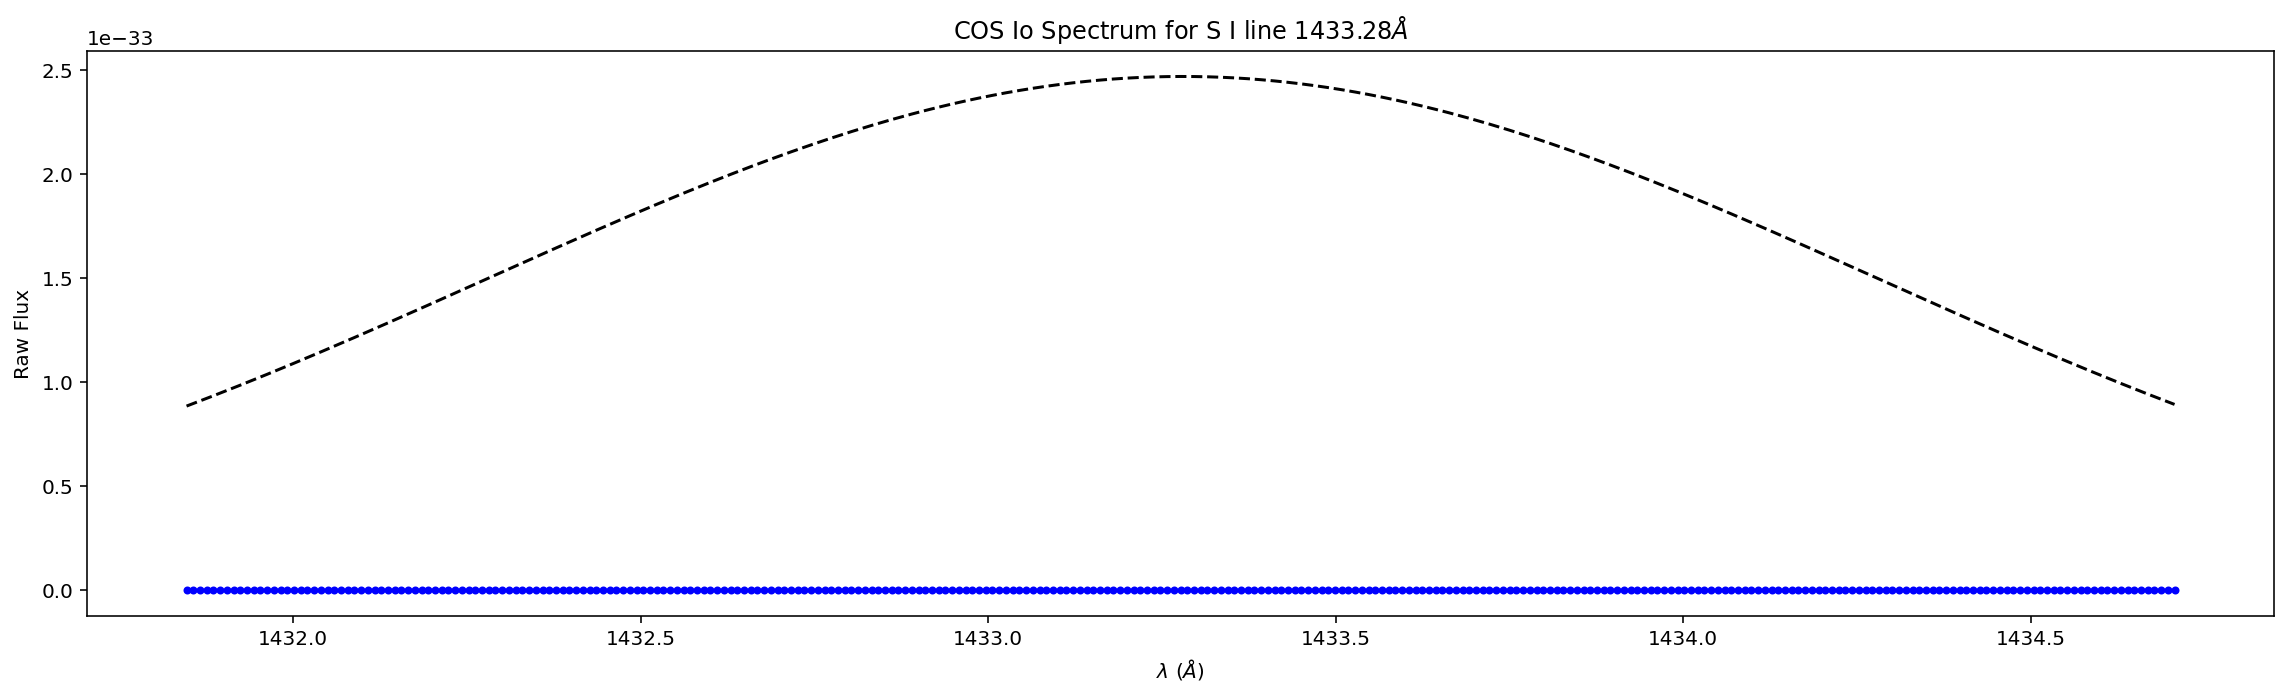

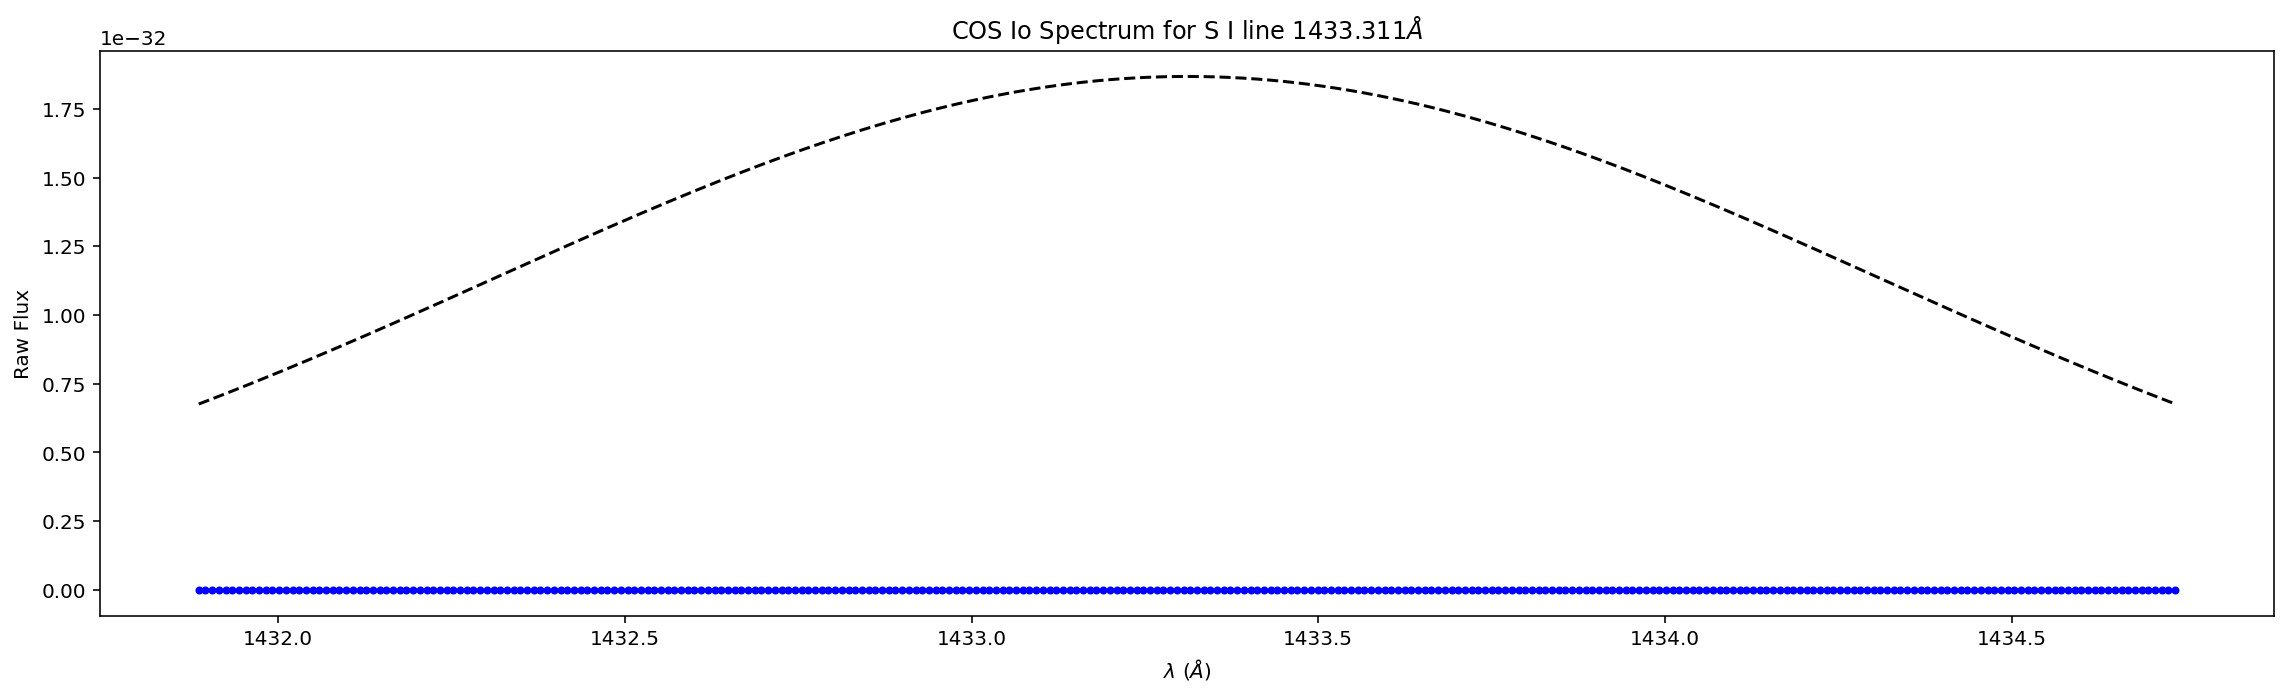

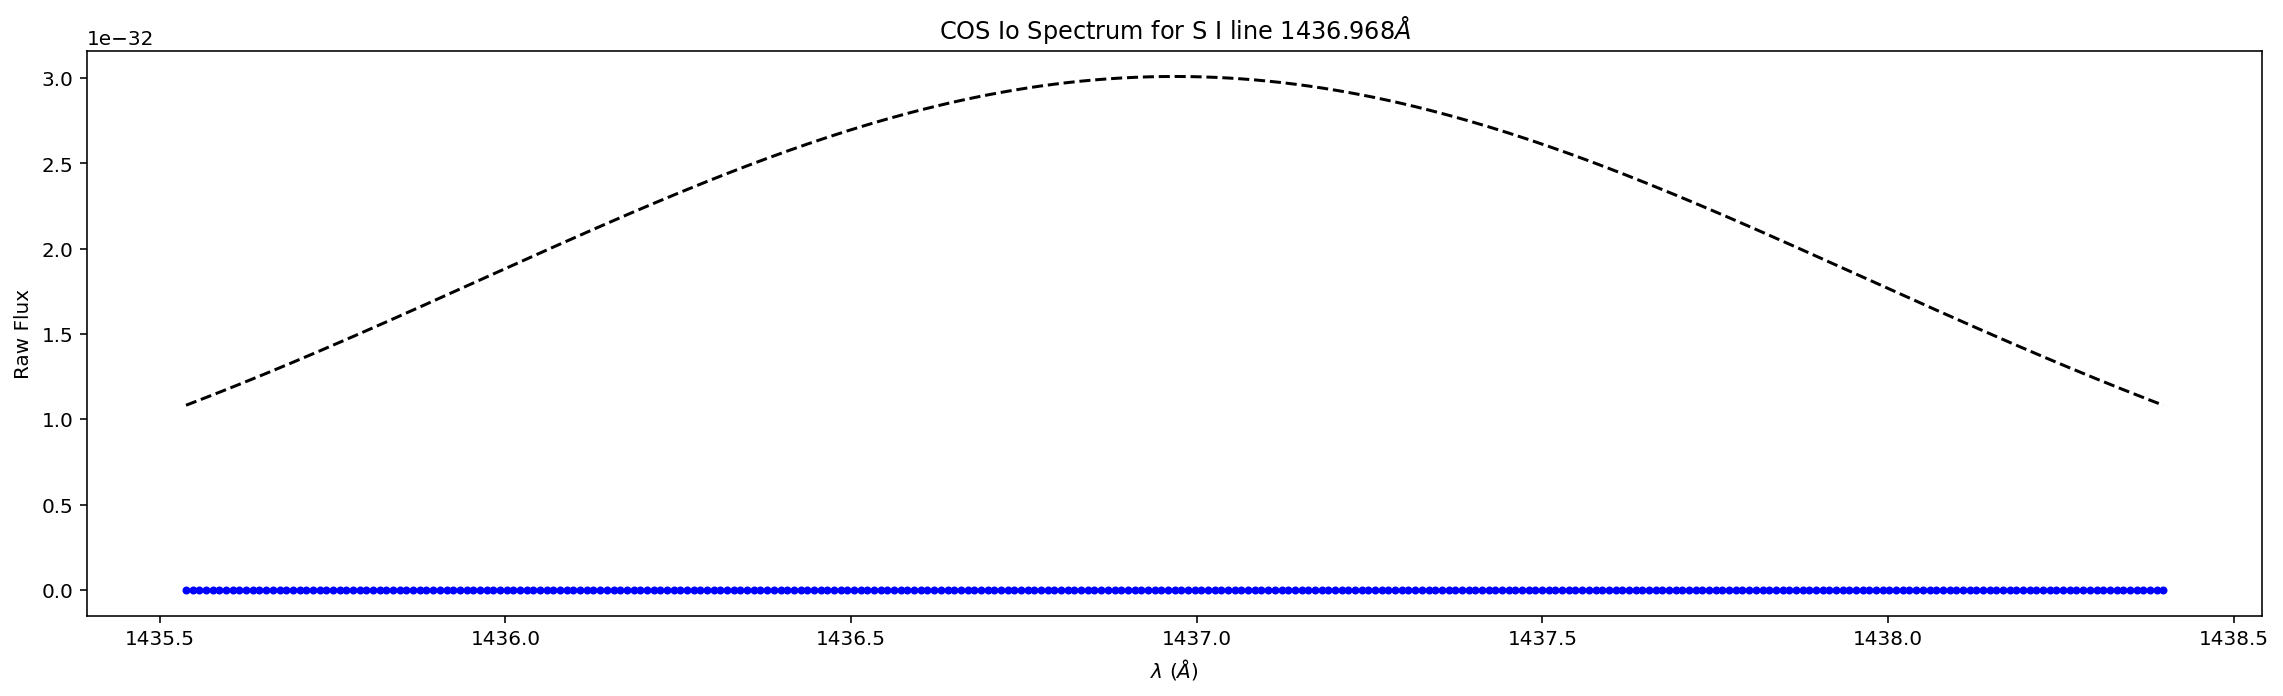

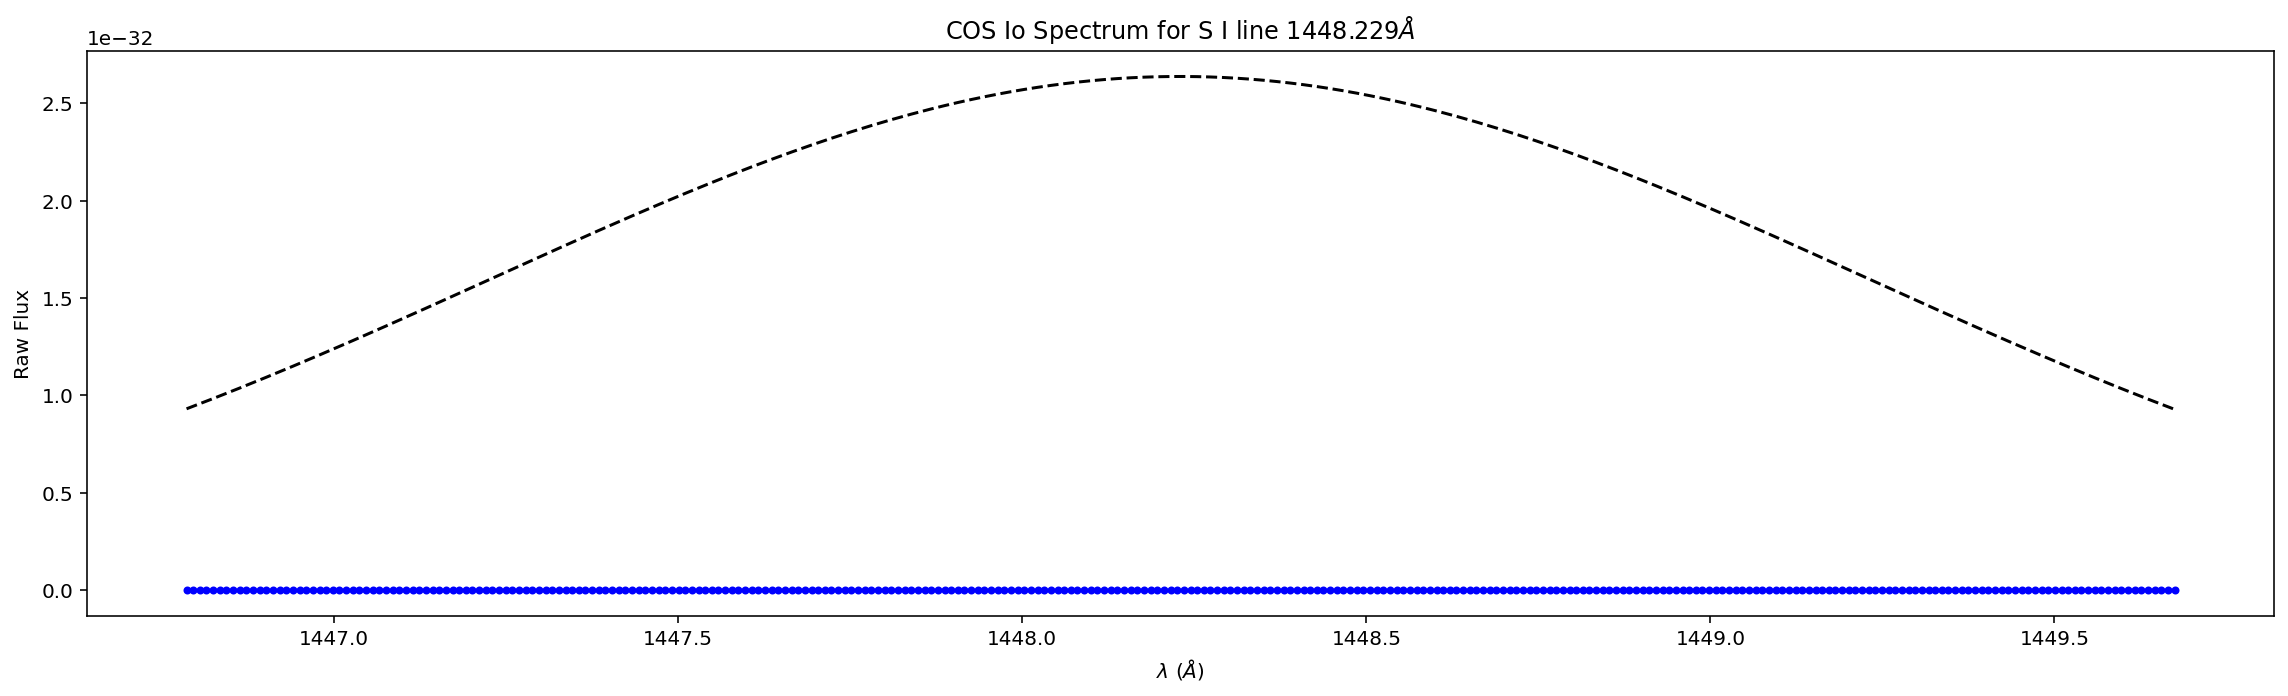

In [10]:
for index in tqdm(range(0, len(wavelength_list))):
    #len(wavelength_list) for whole list
    
    line = wavelength_list[index]
    try:
        left_bound = 0.999*line
        right_bound = 1.001*line

        sub_region = (evt_data['WAVELENGTH'] > left_bound) & (evt_data['WAVELENGTH'] < right_bound) #only take values within this area
        wl = evt_data['WAVELENGTH'][sub_region]
        flux = evt_data['FLUX'][sub_region]
        unc = 0.1*flux #placeholder uncertainty
        wl_array = wl.data
        flux_array = flux.data

        amp1 = 1*10**-14
        sigma1 = 1
        cen1 = line

        popt_gauss, pcov_gauss = scipy.optimize.curve_fit(_1gaussian, wl_array, flux_array, p0=[amp1, cen1, sigma1])

        perr_gauss = np.sqrt(np.diag(pcov_gauss))

        print("amplitude = %0.2f (+/-) %0.2f" % (popt_gauss[0], perr_gauss[0]))
        print("mu = %0.2f (+/-) %0.2f" % (popt_gauss[1], perr_gauss[1]))
        print("sigma = %0.2f (+/-) %0.2f" % (popt_gauss[2], perr_gauss[2]))

        a = popt_gauss[0]
        a_err = perr_gauss[0]
        mu = popt_gauss[1]
        mu_err = perr_gauss[1]
        w = popt_gauss[2]
        w_err = perr_gauss[2]

        plt.figure(figsize=(16, 5))
        plt.plot(wl_array,flux_array,'b.') #make it columns instead of rows bc otherwise will be a blank plot
        plt.plot(wl_array, _1gaussian(wl_array, *popt_gauss), 'k--')
        plt.xlabel('$\lambda$ ($\AA$)');
        plt.ylabel('Raw Flux')
        plt.title("COS Io Spectrum for S I line {}$\AA$".format(line))
        plt.tight_layout()
        save_place = '/Users/jojoa/GitHub/io_brightness/data/figures/'
        plt.savefig(save_place+"gauss_fit_{}.jpg".format(line), format="jpg",dpi=1000)

        brightness = ((2*np.pi)**.5)*(a*w)
        print("The brightness of S I at {} Angstrom is {}.".format(line,brightness))

        gauss_width = w
        gauss_width_unc = w_err
        obs_line_center = mu
        obs_line_center_unc = mu_err

        temp = {'brightness':brightness, 'int_wv':line, 'gaussian_width':gauss_width, 'gaussian_width_unc':gauss_width_unc,
                    'obs_line_center':obs_line_center, 'obs_line_center_unc':obs_line_center_unc}

        df_results = df_results.append(temp, ignore_index=True)
        if (index % 10) == 0:
                    #print(index, fn[-49:])
                    df_results.to_csv('../data/io_results_june_8.csv',index=False)
                    
    except:
        print("Fail:", line)
        problem_files[index] = line
        prob_data = list(problem_files.items())
        problem_array = np.array(prob_data)

Now that we have run the loop, let us save the file for later use.

In [15]:
prob_data = list(problem_files.items())
problem_array = np.array(prob_data)
problem_array